In [1]:
import datetime
import geopandas as gpd
import itertools
import numpy as np
import pandas as pd
import xarray as xr

import datacube

import sys

sys.path.insert(1, "../Tools/")
import dea_tools.bandindices
import dea_tools.datahandling
from dea_tools.spatial import xr_rasterize
from dea_tools.dask import create_local_dask_cluster
import dea_tools.wetlands

# Create local dask cluster to improve data load time
client = create_local_dask_cluster(return_client=True)

dc = datacube.Datacube(app="DEA_Wetlands_Insight_Tool")

<Client: 'tcp://127.0.0.1:43145' processes=1 threads=2, memory=12.21 GiB>

In [2]:
# some things I might change
time = ("2018-01-01", "2024-02-26")
# time = ('1985-01-01', '2024-01-01')

# Define which spectral bands are being used in the analysis
bands = [
    f"nbart_{band}" for band in ("blue", "green", "red", "nir", "swir_1", "swir_2")#, "panchromatic")
]

In [3]:
poly = gpd.read_file("site_metadata_sf/site_metadata_sf.shp")
poly.geometry[0] #
poly

Site                                           geometry
0       Barmah Creek BI_AM1  POLYGON ((1165942.265 -3992589.549, 1165942.12...
1       Barmah Creek BI_AM2  POLYGON ((1166002.189 -3992470.981, 1166002.05...
2   Barmah Creek Corrys_AM1  POLYGON ((1165869.694 -3990615.923, 1165869.55...
3   Barmah Creek Corrys_AM2  POLYGON ((1165848.215 -3990413.783, 1165848.07...
4               Big Bog_AM1  POLYGON ((1198312.993 -3980949.334, 1198312.85...
..                      ...                                                ...
67          Warri Yards_AM2  POLYGON ((1173125.574 -3971451.935, 1173125.43...
68      Wathours Lagoon_AM1  POLYGON ((1172879.868 -3975217.036, 1172879.73...
69      Wathours Lagoon_AM2  POLYGON ((1172782.518 -3975263.544, 1172782.38...
70         Whores Creek_AM1  POLYGON ((1184201.376 -3978131.750, 1184201.23...
71         Whores Creek_AM2  POLYGON ((1184160.766 -3978208.420, 1184160.62...

[72 rows x 2 columns]

In [4]:
for index, wetland in poly.iterrows():
    index

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


/env/lib/python3.10/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


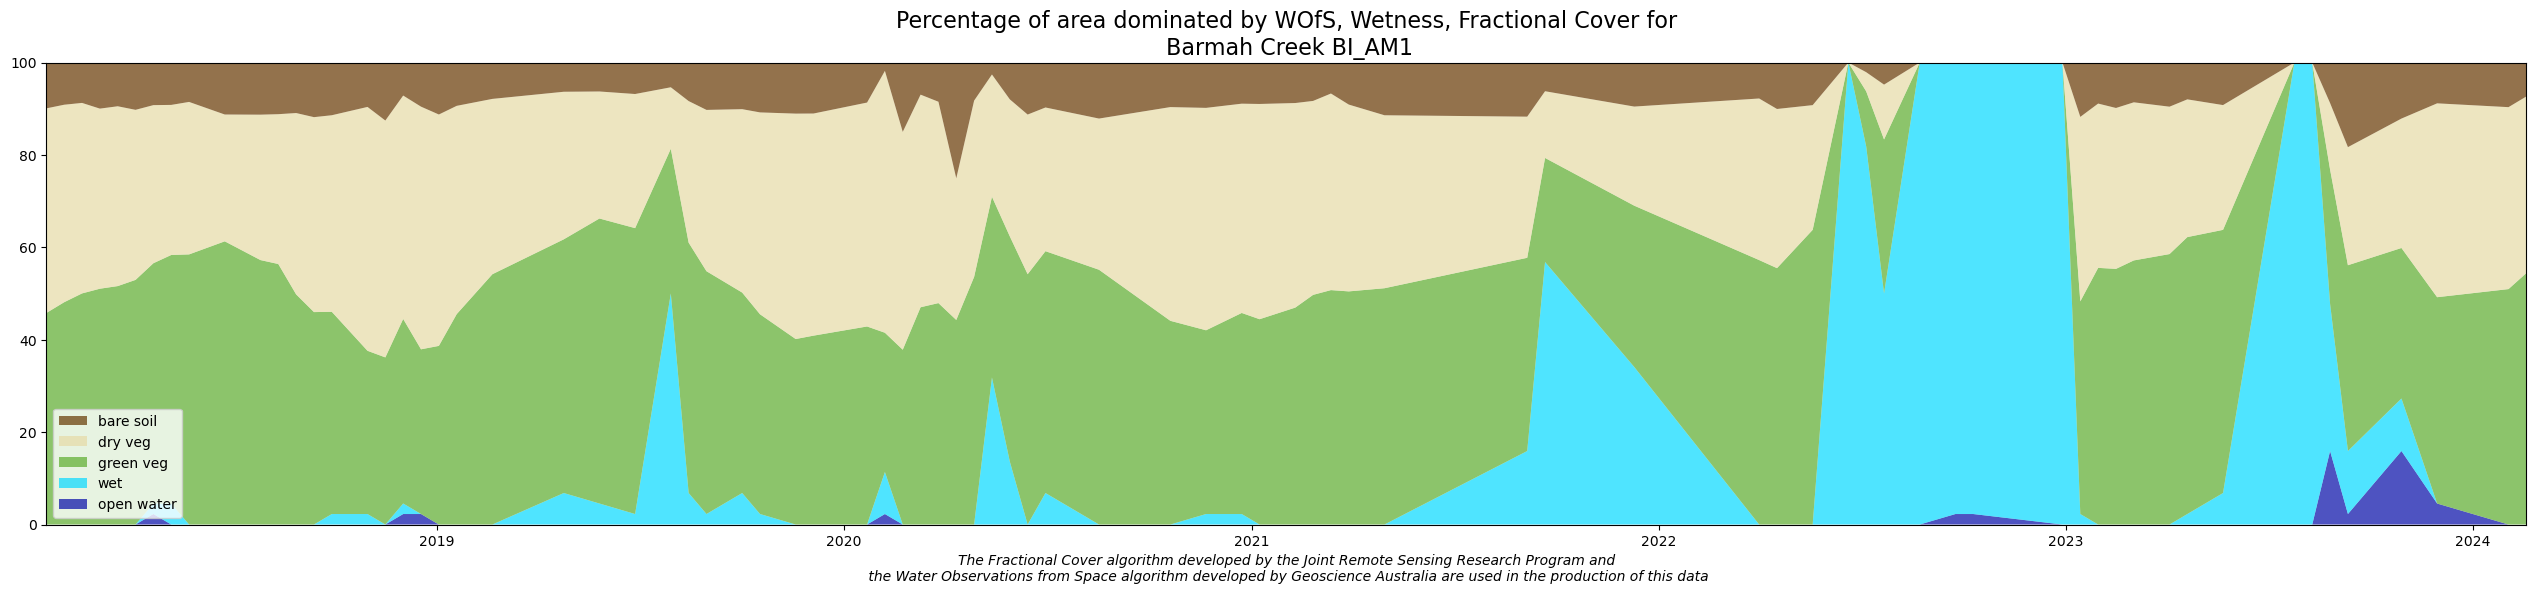

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array
Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


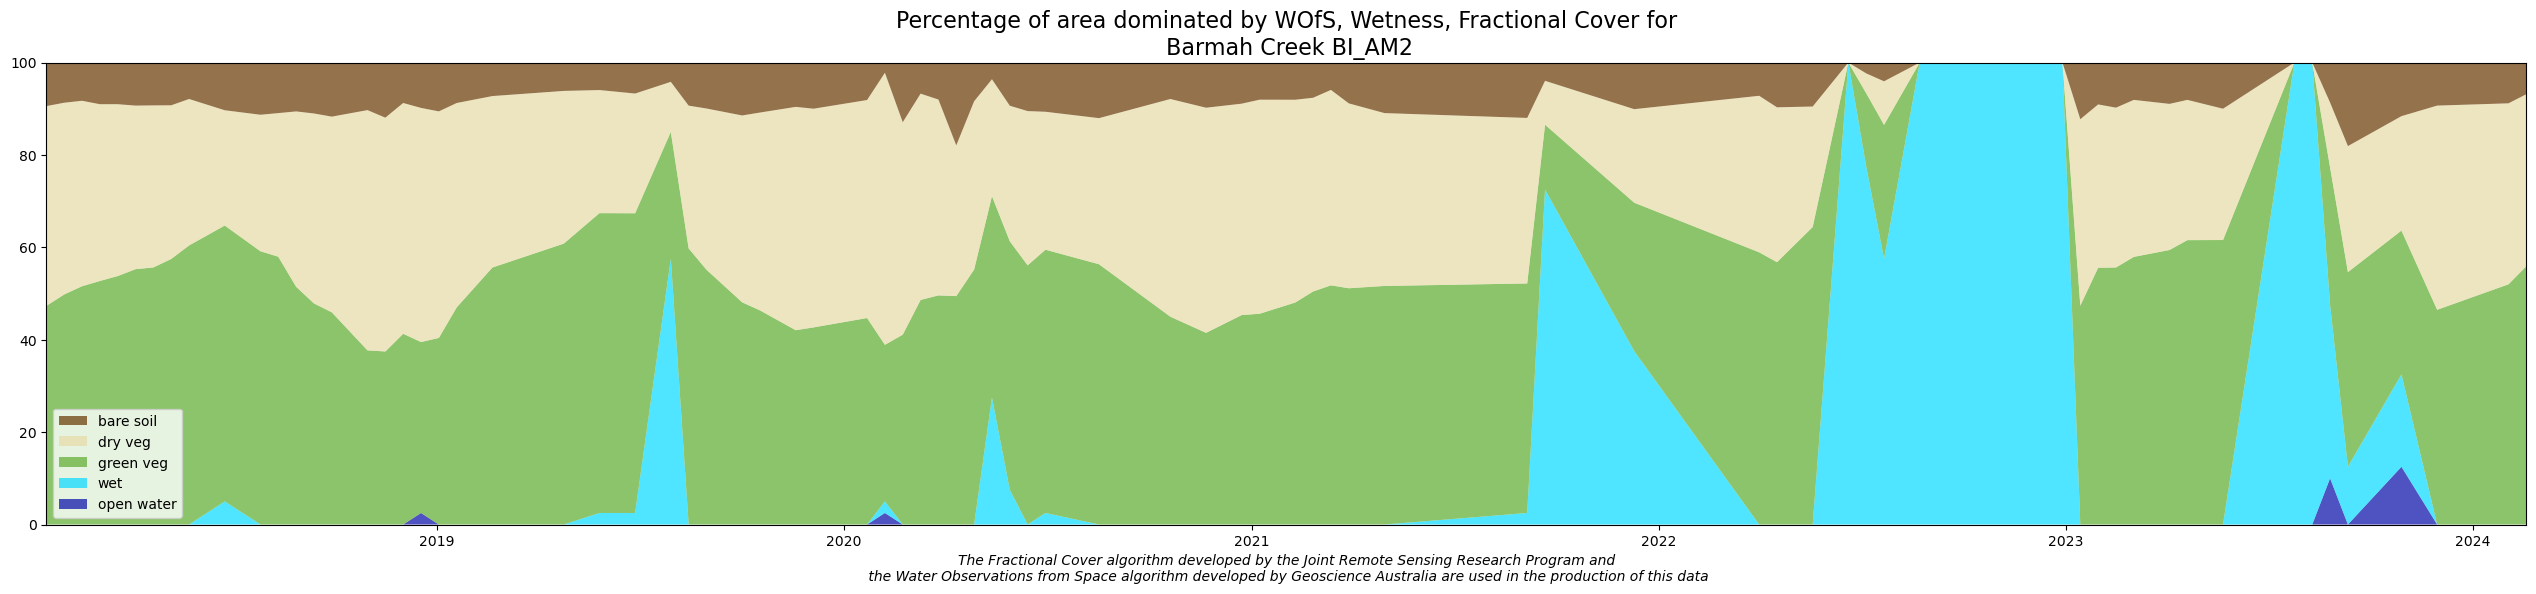

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array
Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


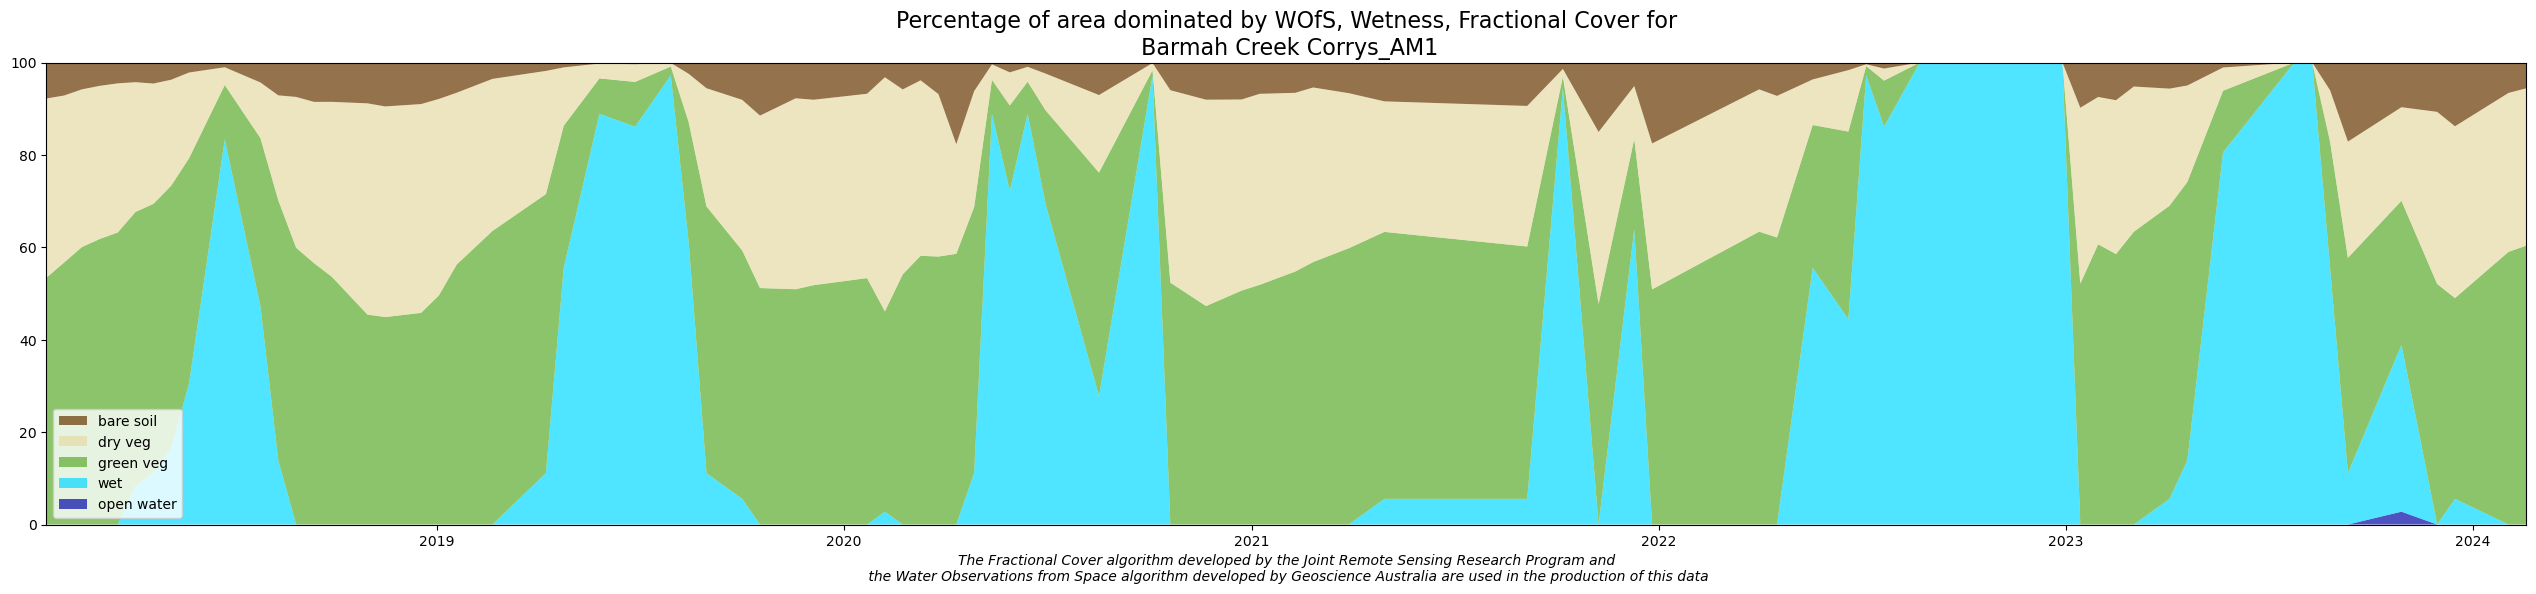

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 00:44:35,297 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2024-05-15 00:45:11,974 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


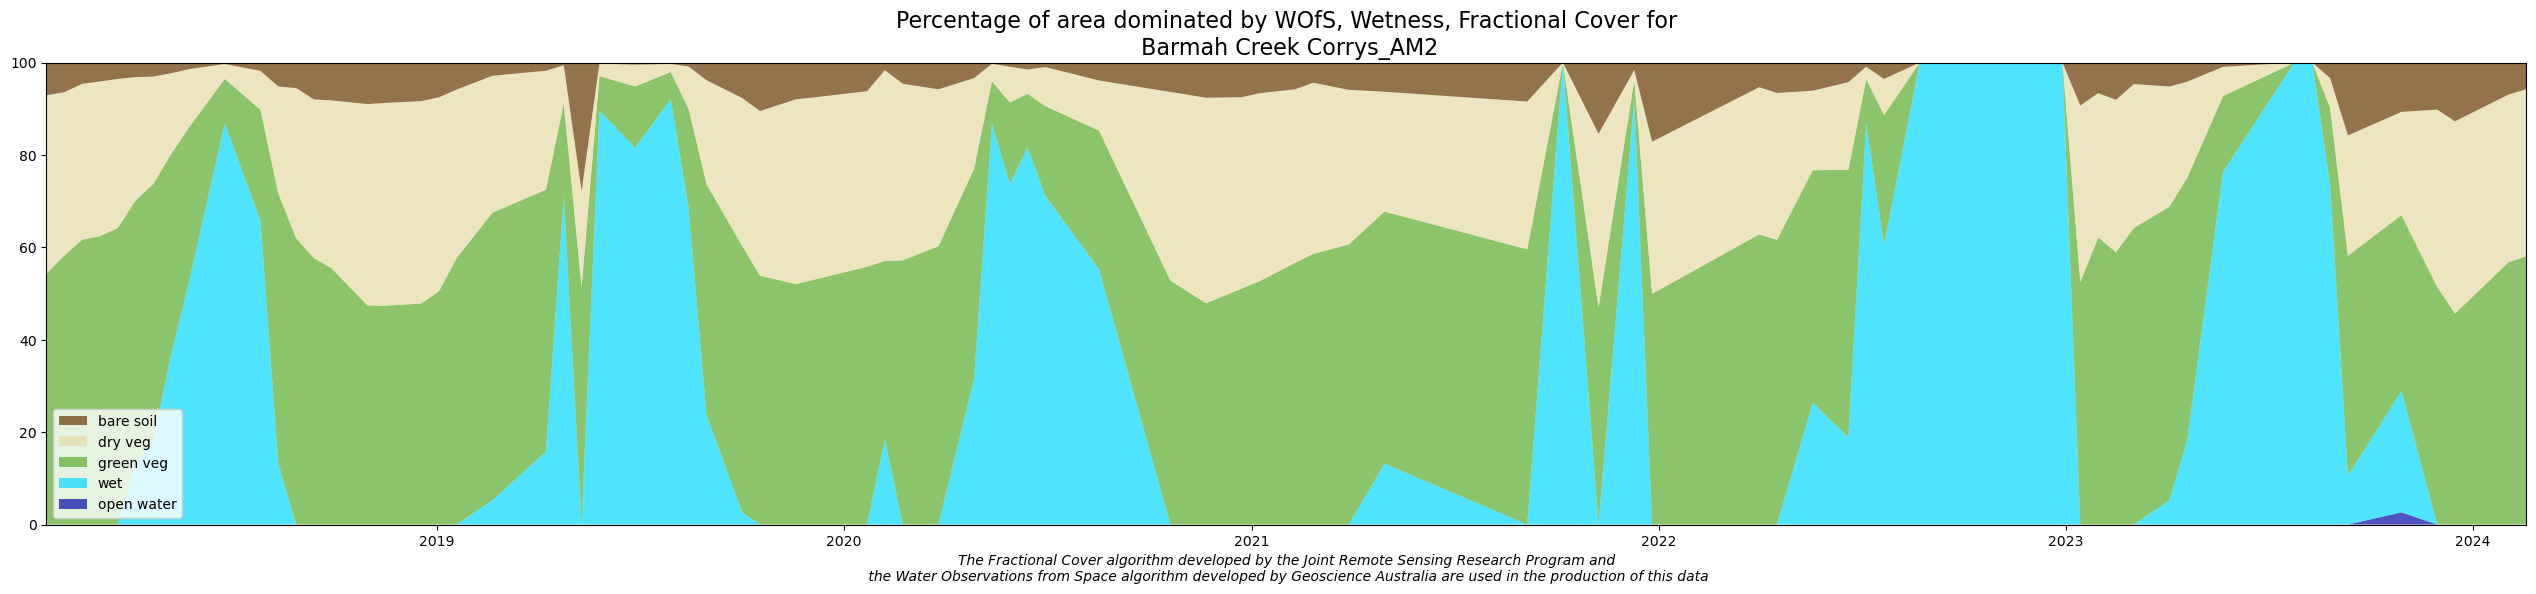

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 227 time steps as a dask array


2024-05-15 00:46:19,265 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2024-05-15 00:47:12,578 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2024-05-15 00:48:17,064 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-05-15 00:49:10,868 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-05-15 00:49:17,465 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-05-15 00:49:25,536 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-05-15 00:49:47,290 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-05-15 00:50:21,939 - distributed.utils_perf - WARNING - full garbage collections took

Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


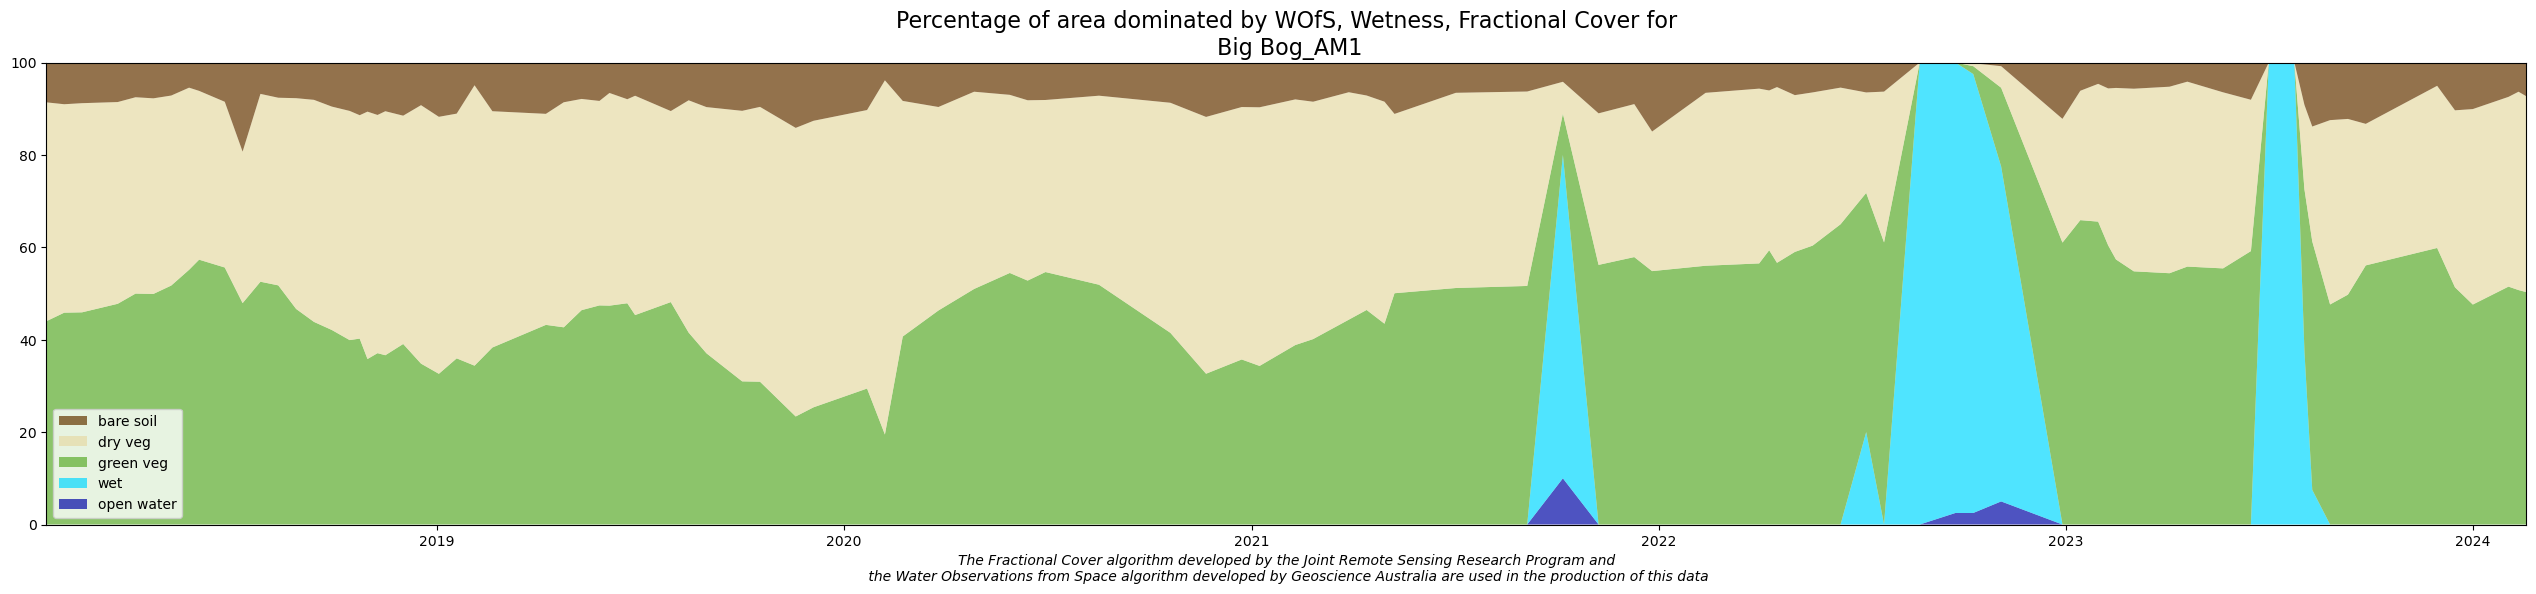

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 224 time steps as a dask array


2024-05-15 00:53:11,155 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-05-15 00:54:04,416 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-05-15 00:55:16,032 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-05-15 00:55:32,788 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-05-15 00:55:39,673 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 00:55:52,077 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 00:56:21,571 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 00:56:57,407 - distributed.utils_perf - WARNING - full garbage collections took

Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


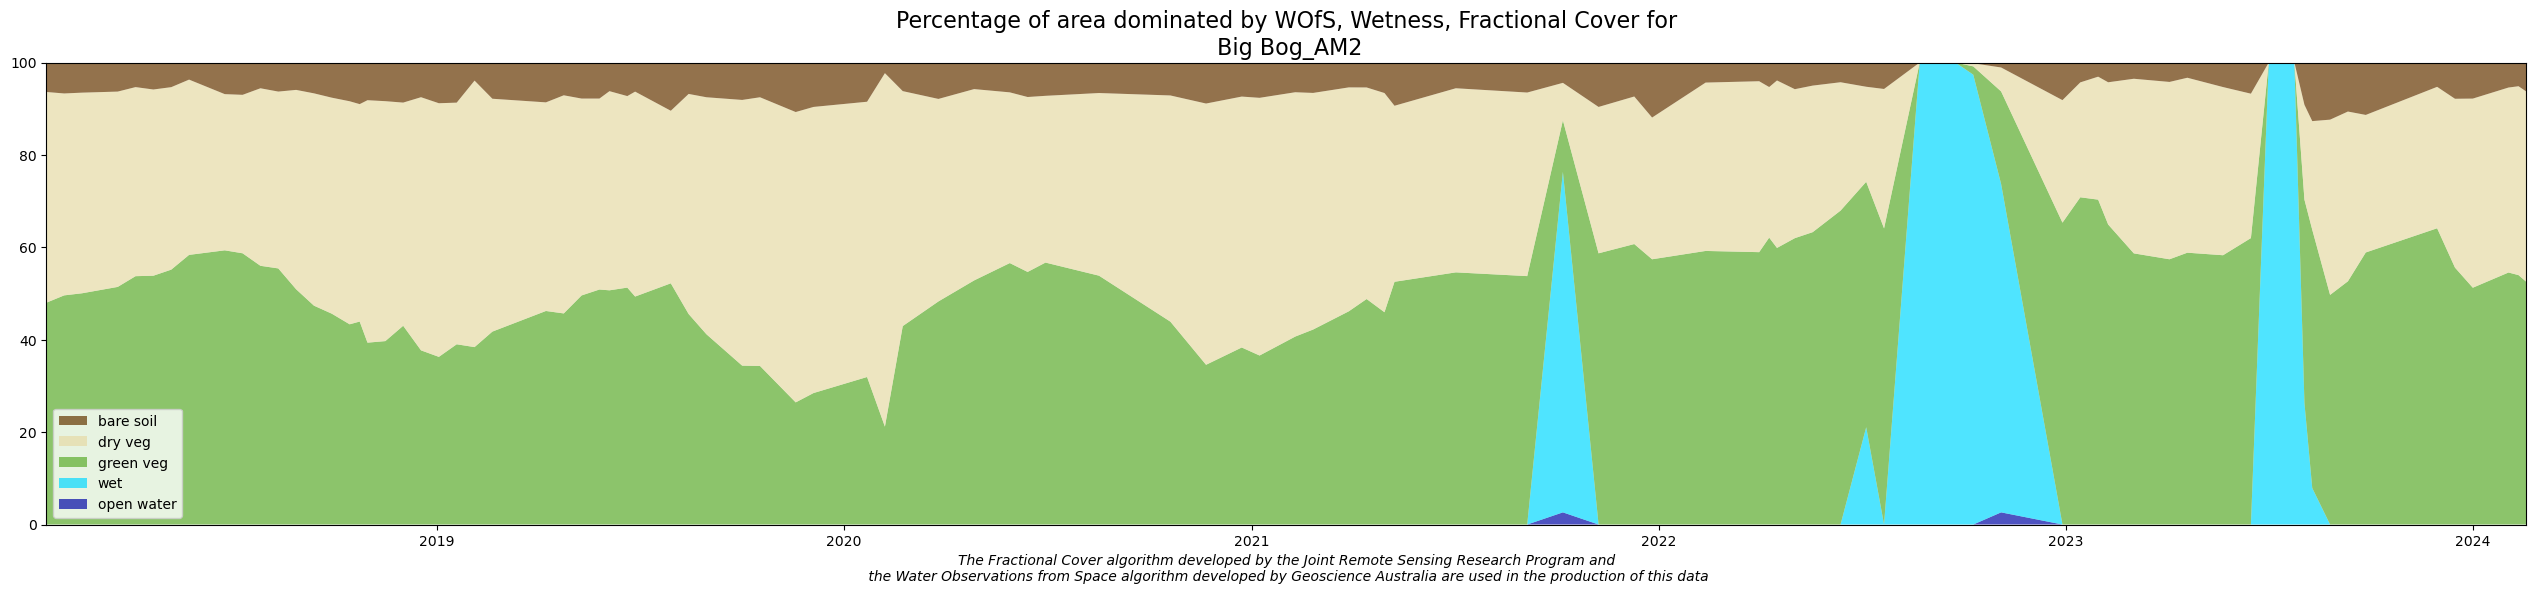

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 00:58:52,035 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 00:59:41,699 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:00:18,957 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:00:23,452 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:00:43,793 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:01:14,224 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


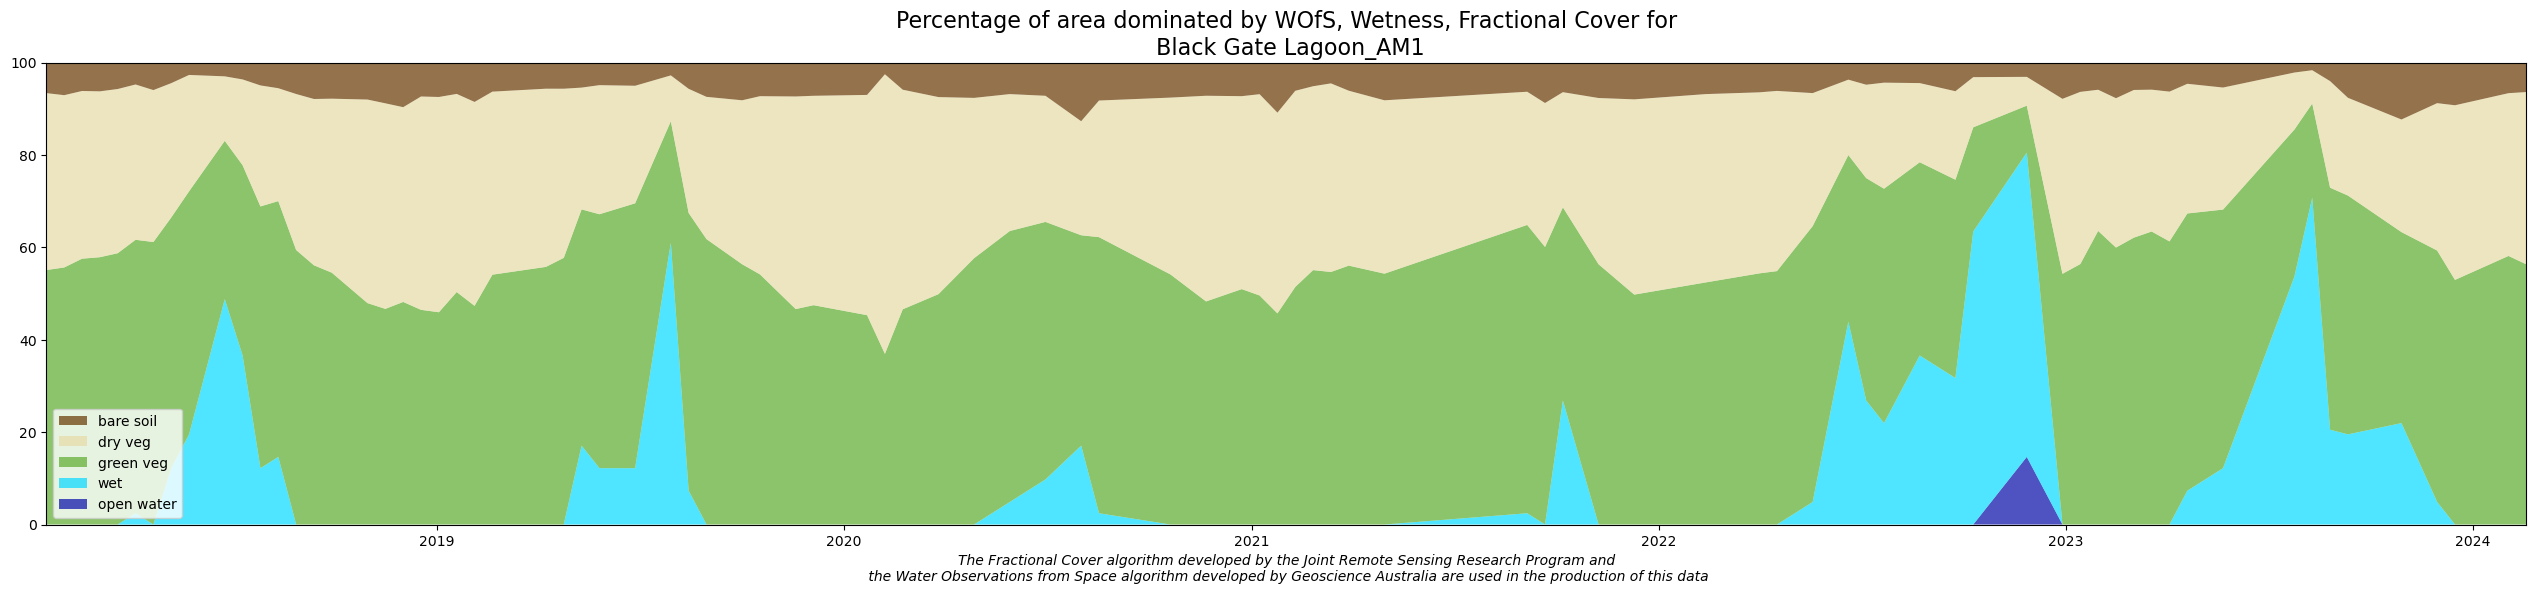

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:01:58,484 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:02:44,890 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:03:40,000 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:04:11,368 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:04:15,664 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:04:39,280 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:05:13,307 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


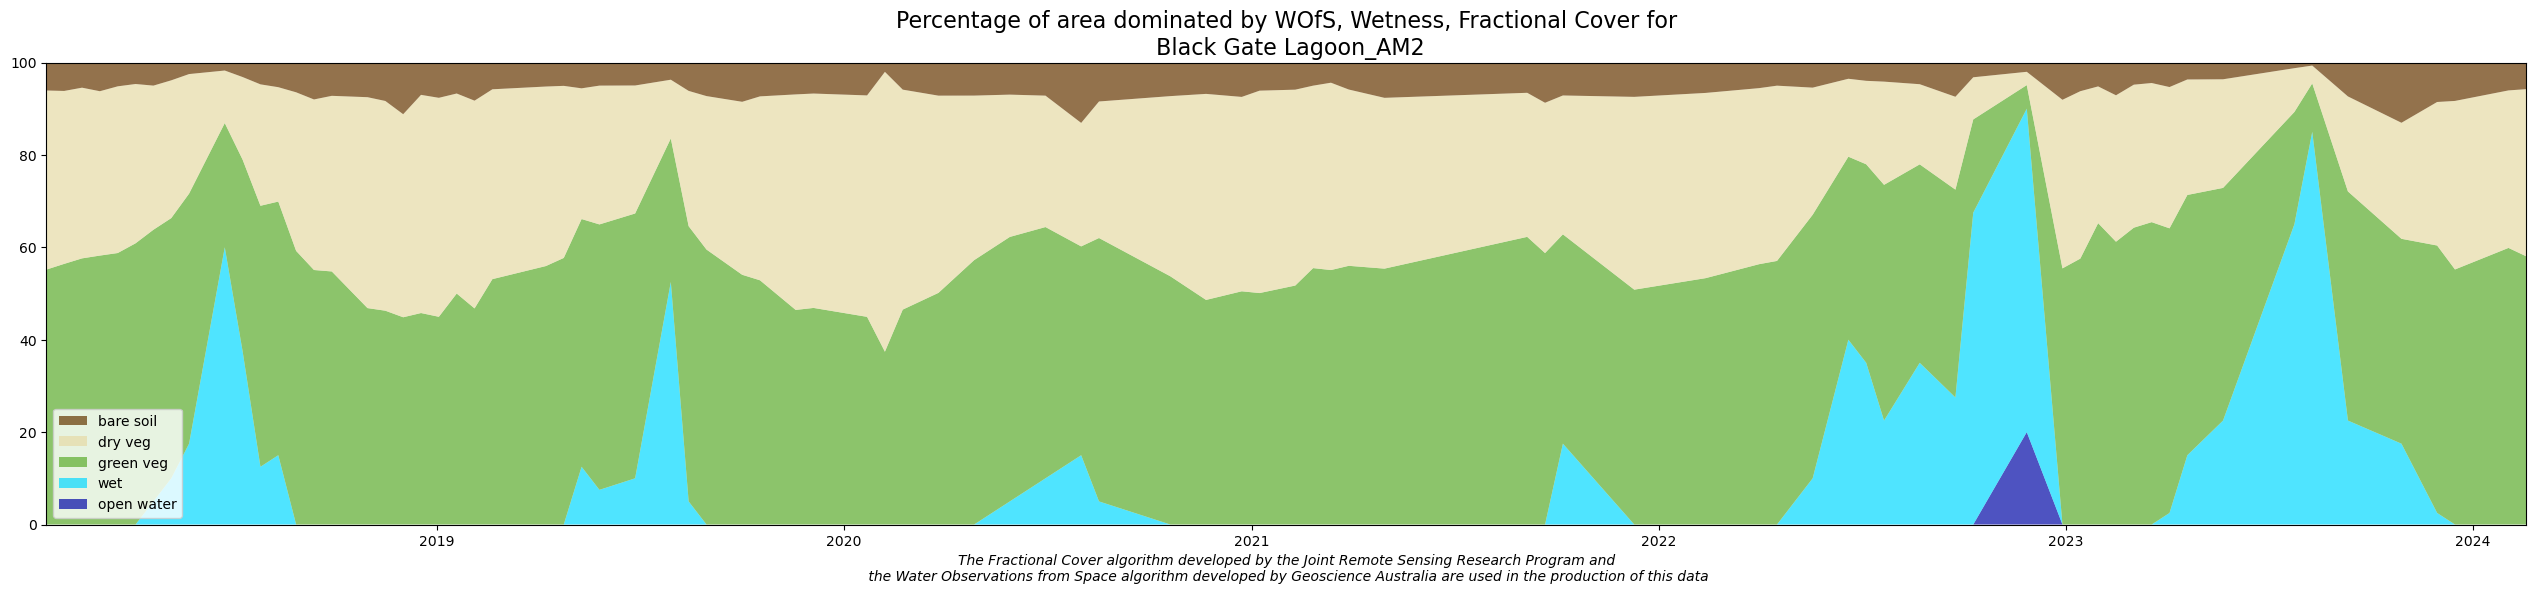

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:05:59,452 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:06:47,299 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:07:43,064 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:07:46,956 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:07:51,557 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:08:31,165 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:09:07,258 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


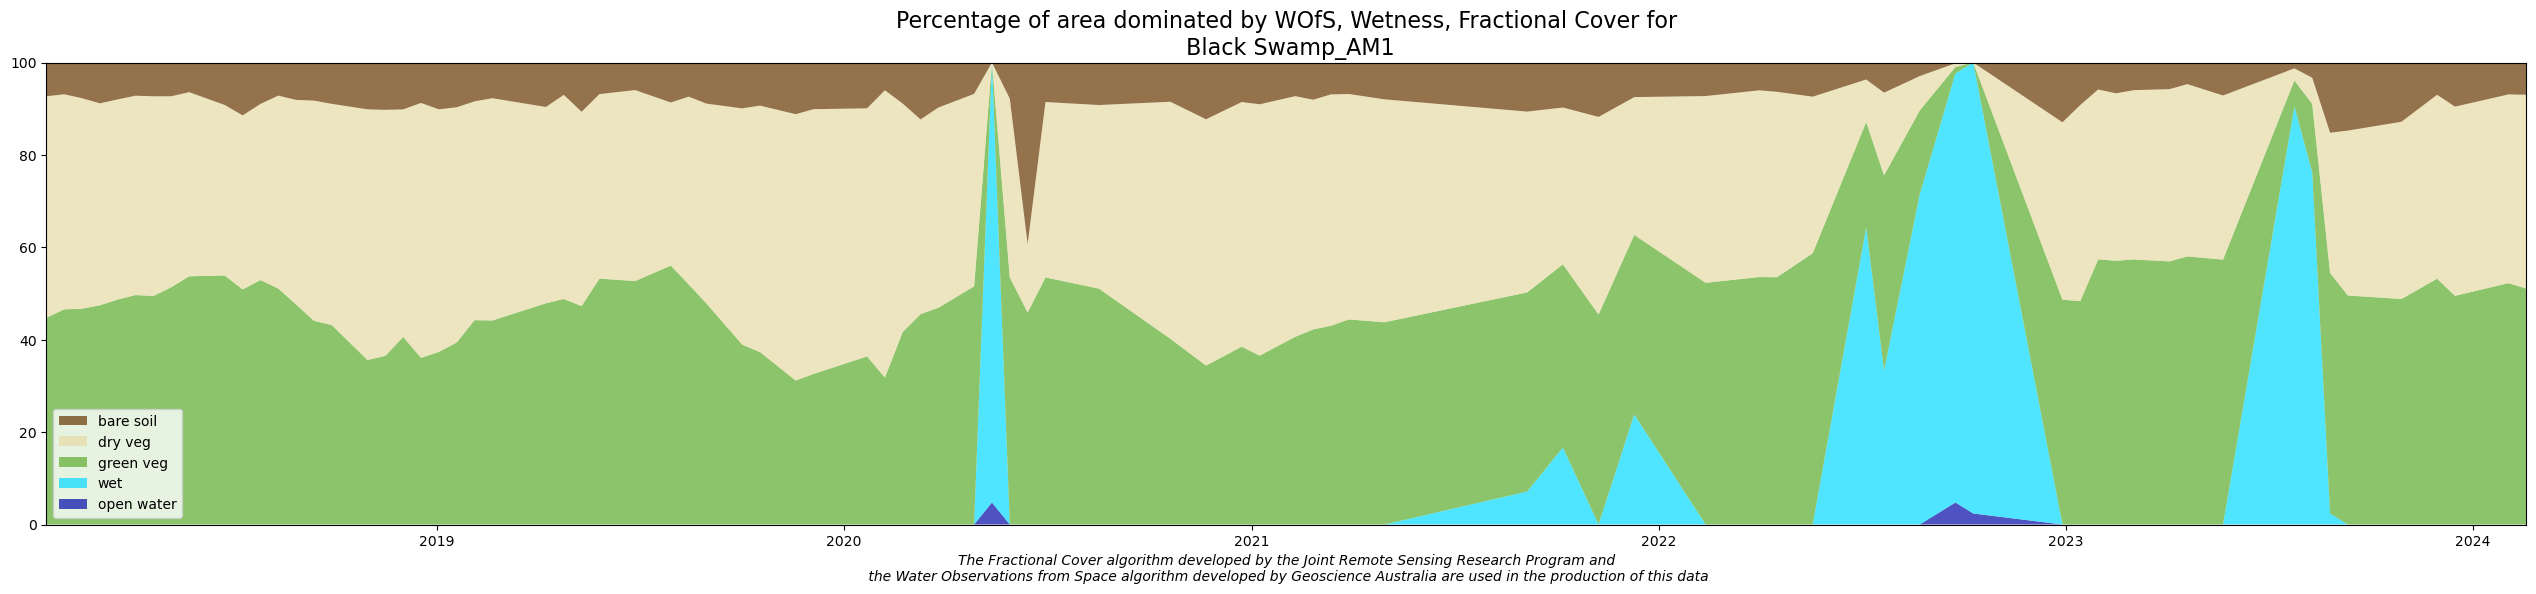

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:10:10,157 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:11:05,572 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:11:16,466 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:11:27,766 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:11:57,345 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:12:34,875 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


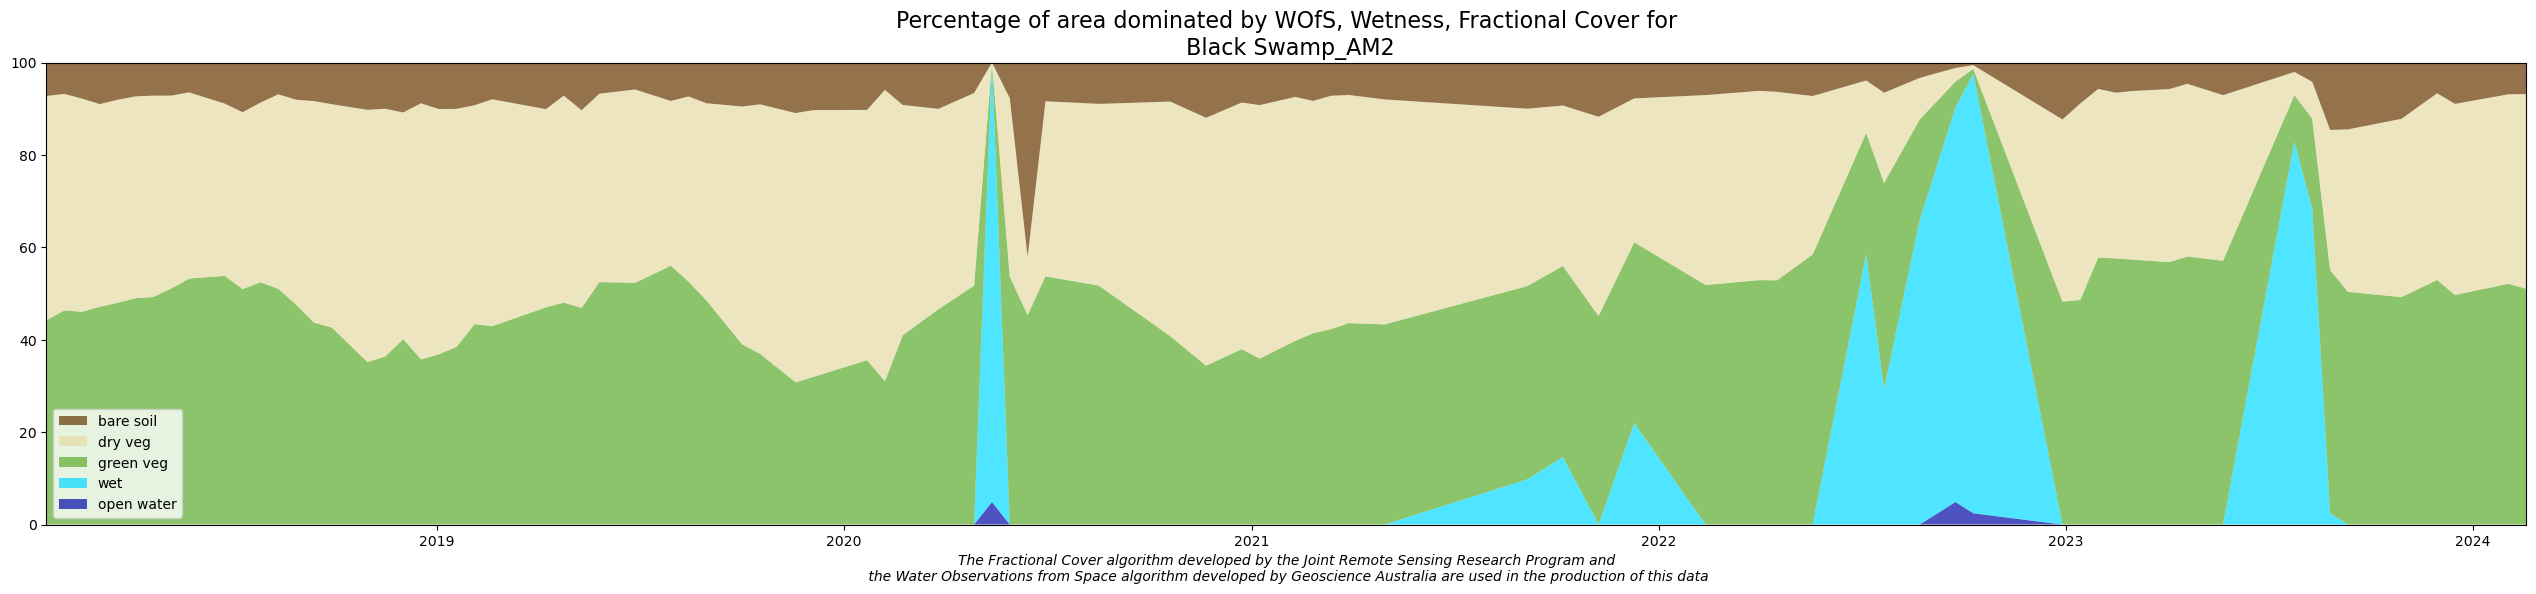

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:13:32,859 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:14:19,473 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:14:27,163 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:14:38,613 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:15:04,688 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:15:36,259 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


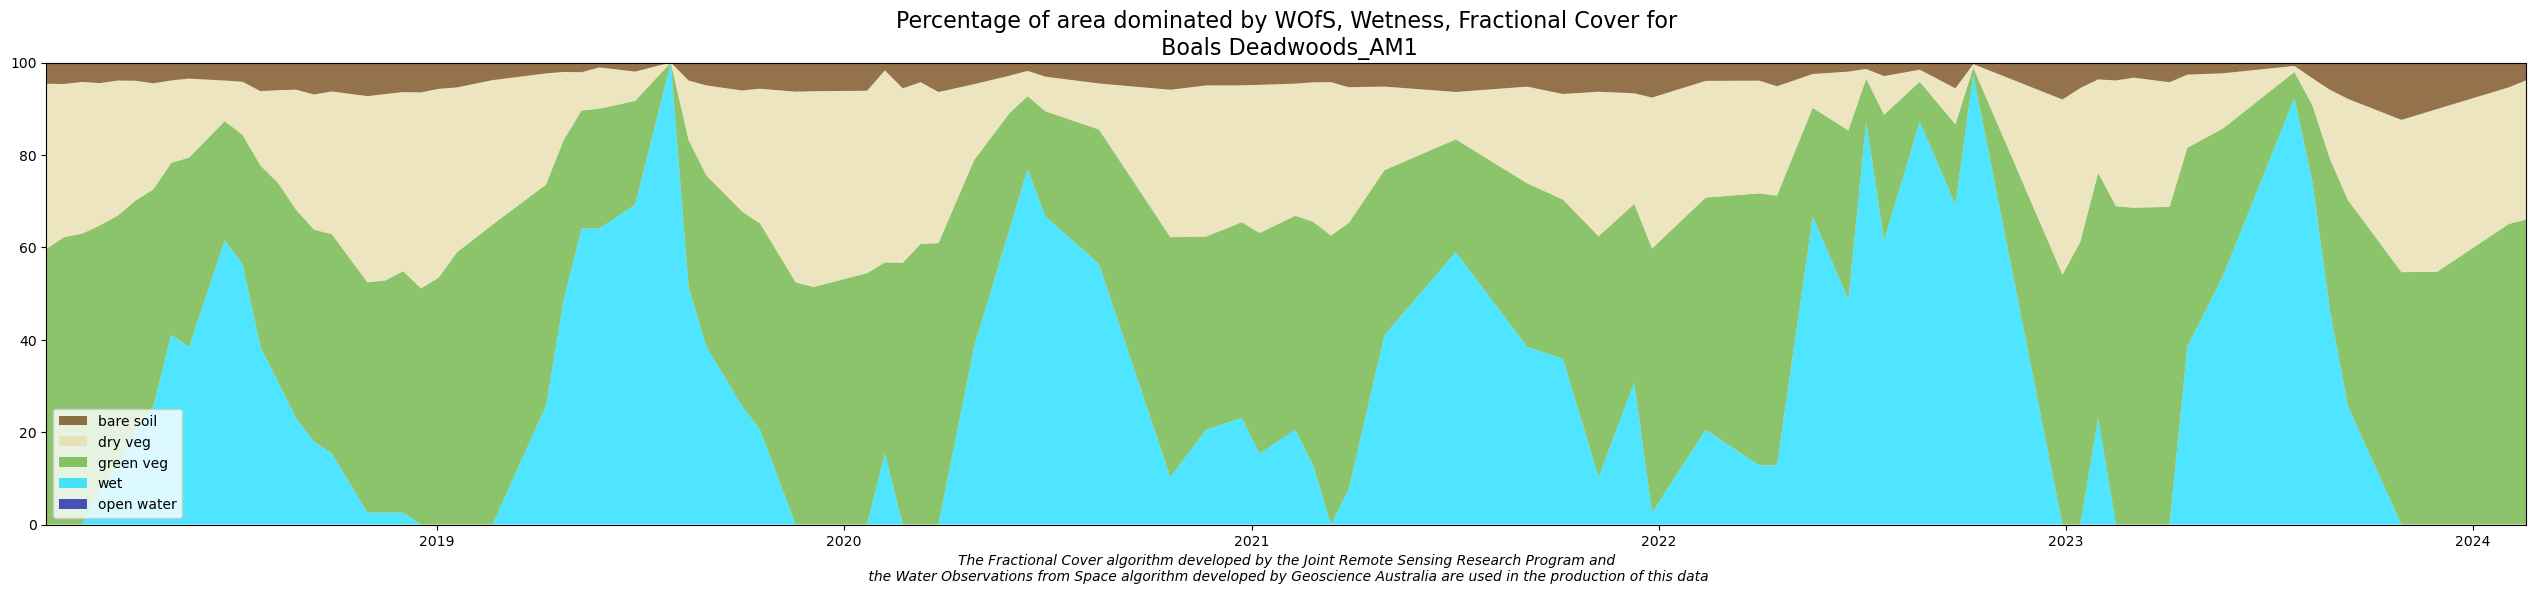

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:16:32,078 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:17:08,579 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-05-15 01:17:12,417 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:17:21,168 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:17:44,353 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:18:12,180 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


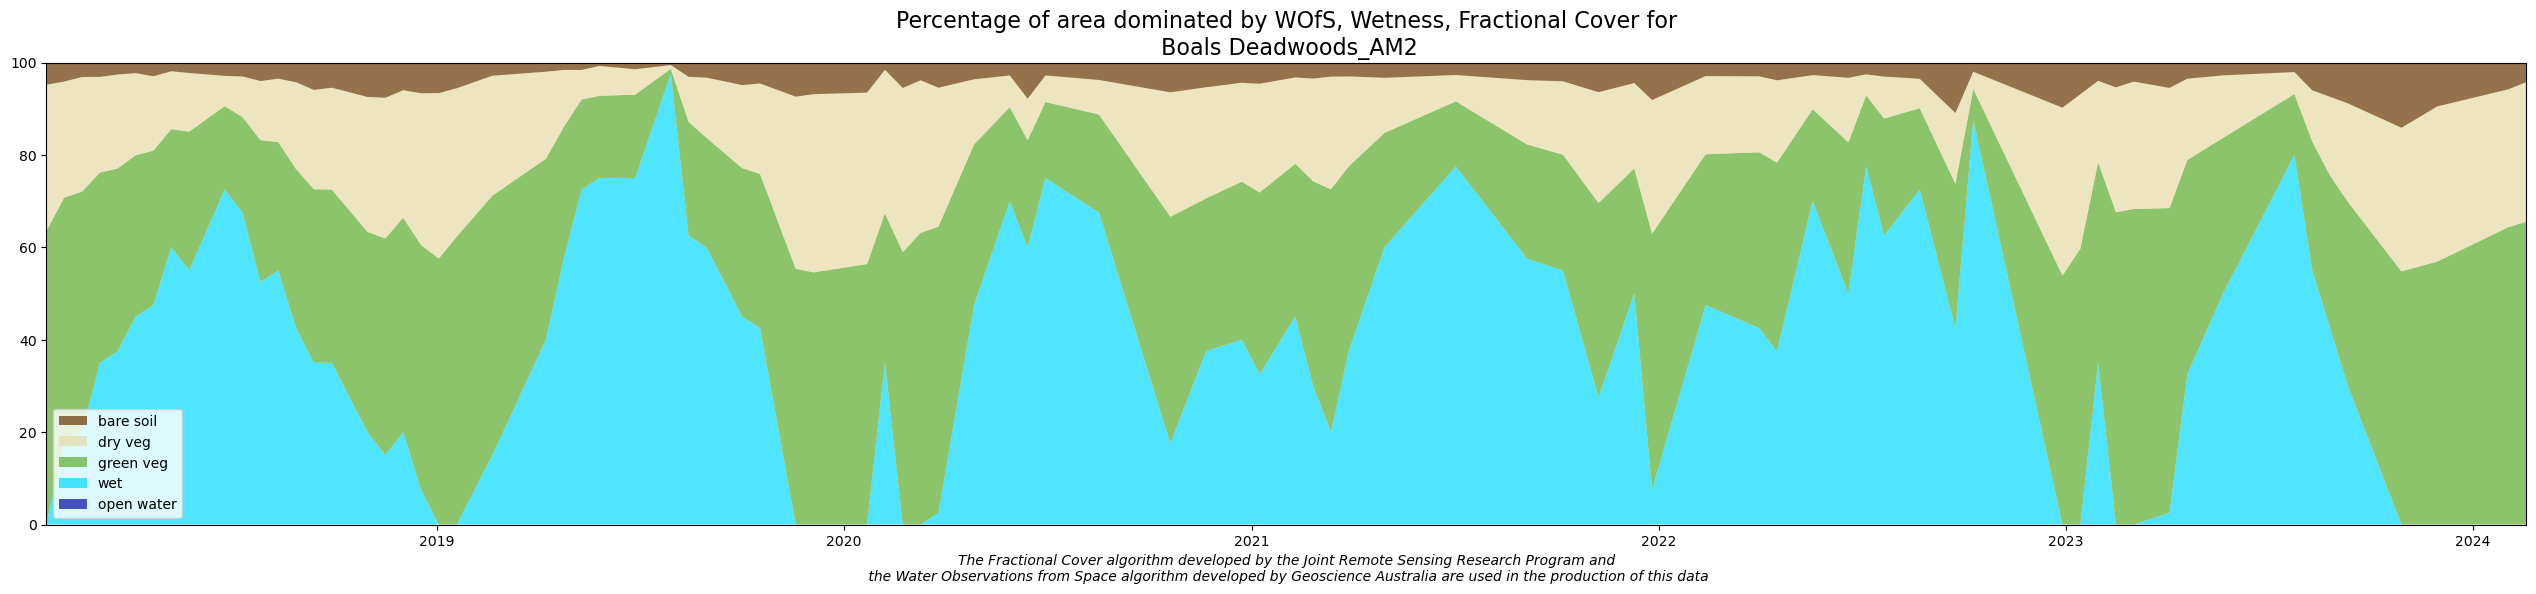

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:19:01,878 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:19:41,555 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:19:45,346 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
2024-05-15 01:19:51,312 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:20:11,072 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:20:36,241 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


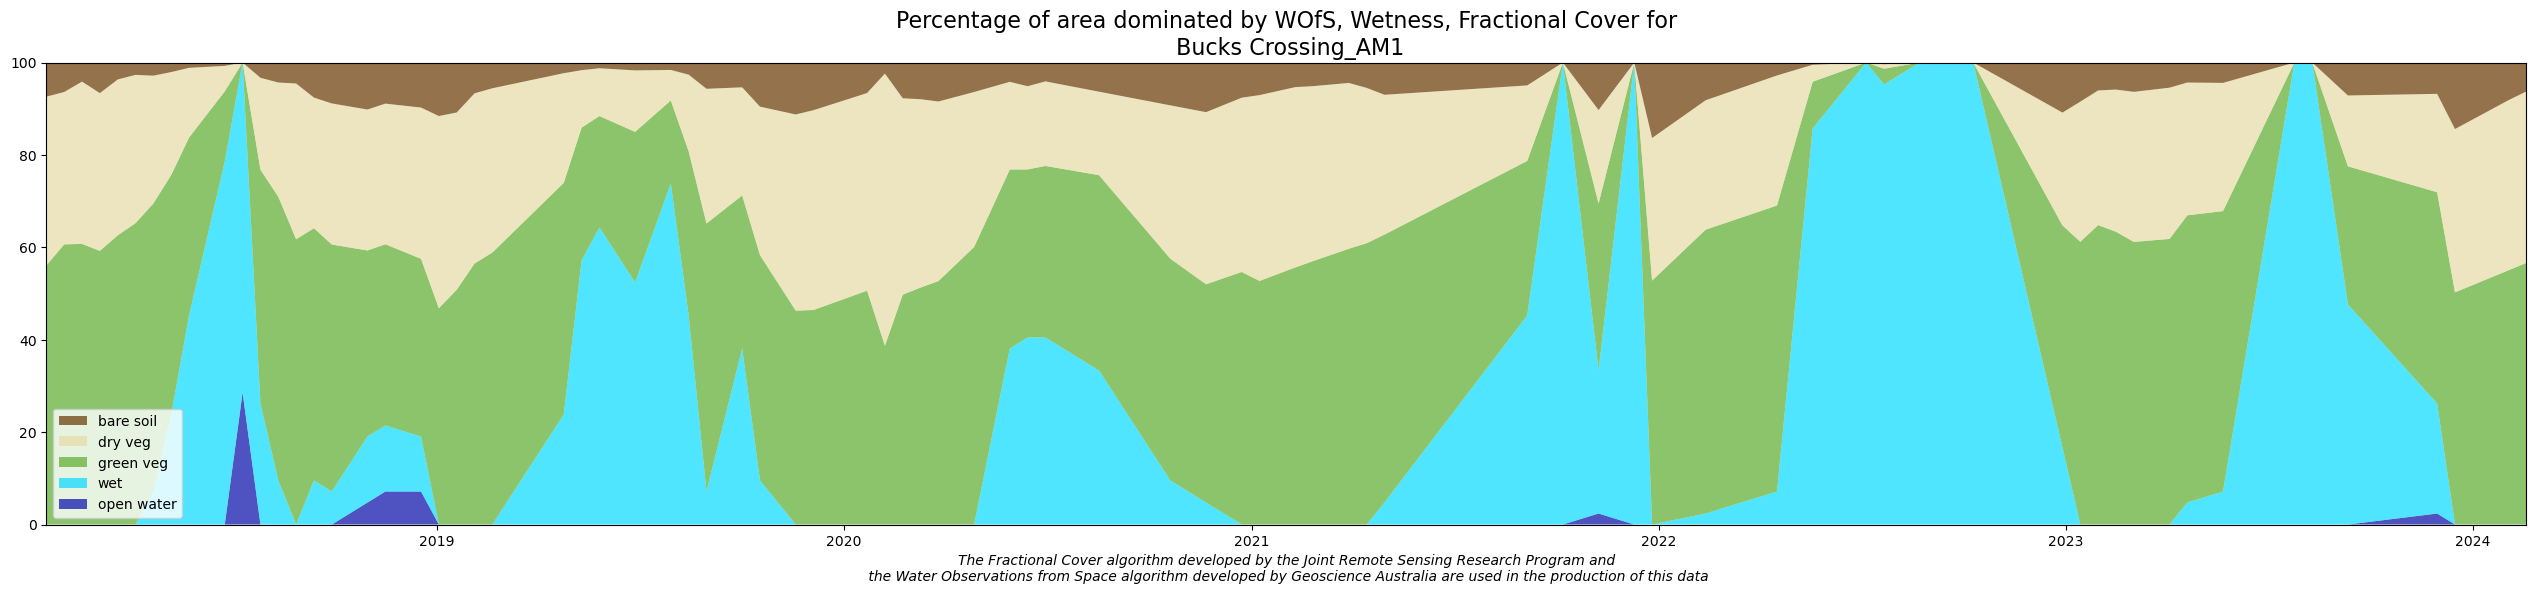

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:21:19,558 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:21:58,027 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:22:08,197 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
2024-05-15 01:22:17,319 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-05-15 01:22:37,014 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(
2024-05-15 01:23:01,780 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)


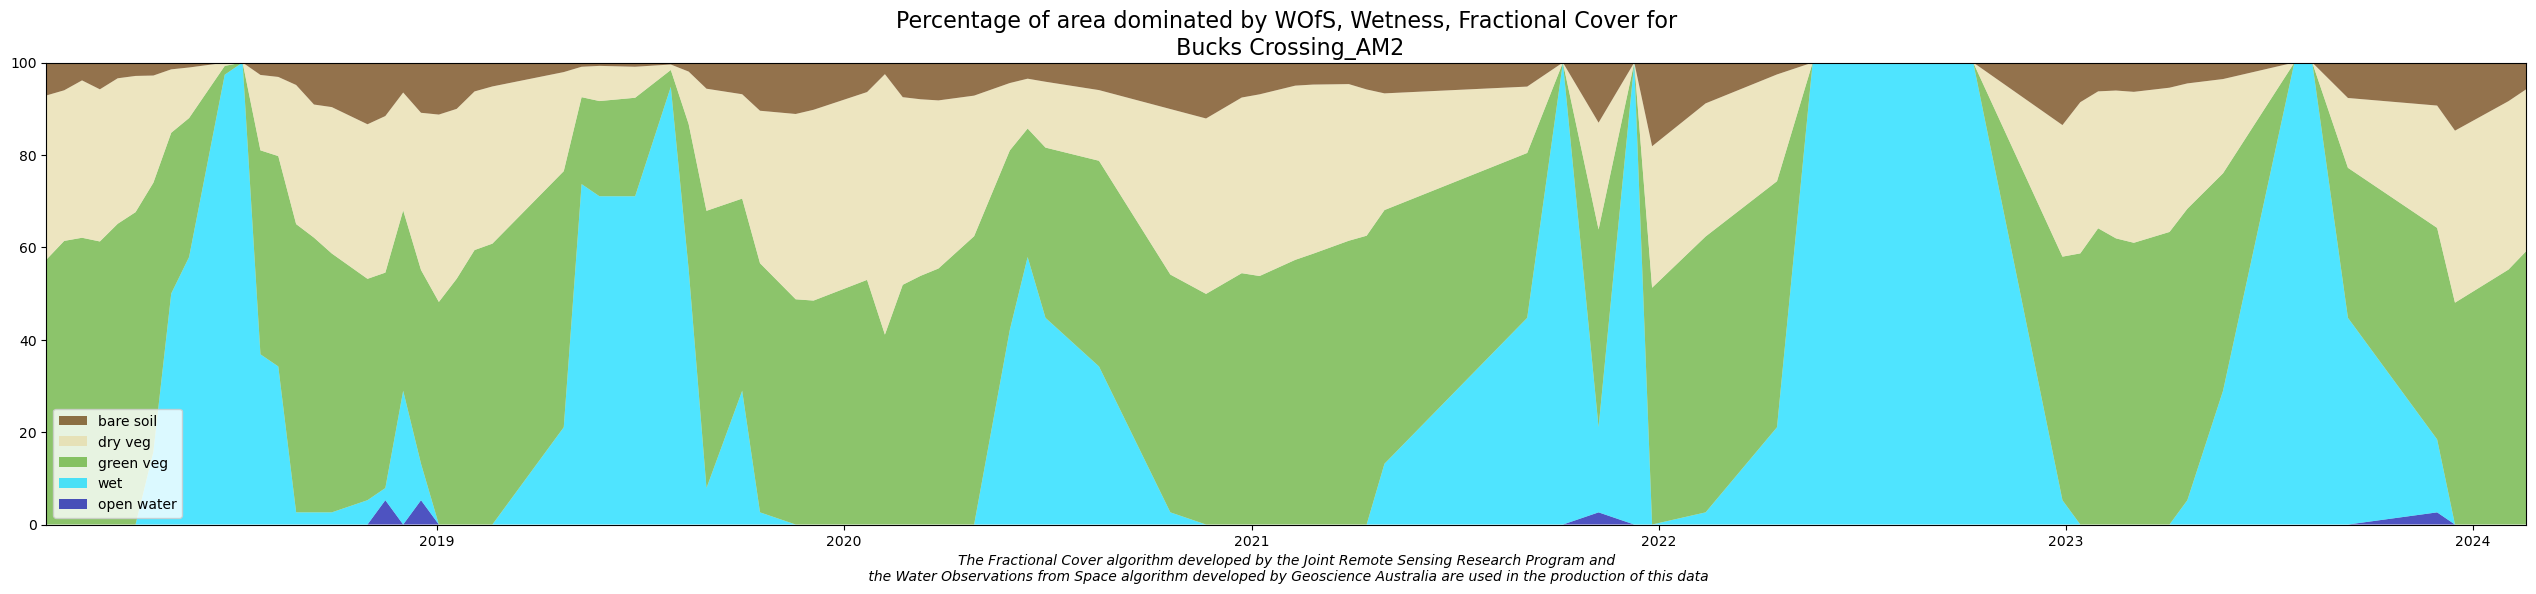

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:23:41,462 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-05-15 01:24:09,793 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-05-15 01:24:13,819 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2024-05-15 01:24:28,274 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2024-05-15 01:24:50,364 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


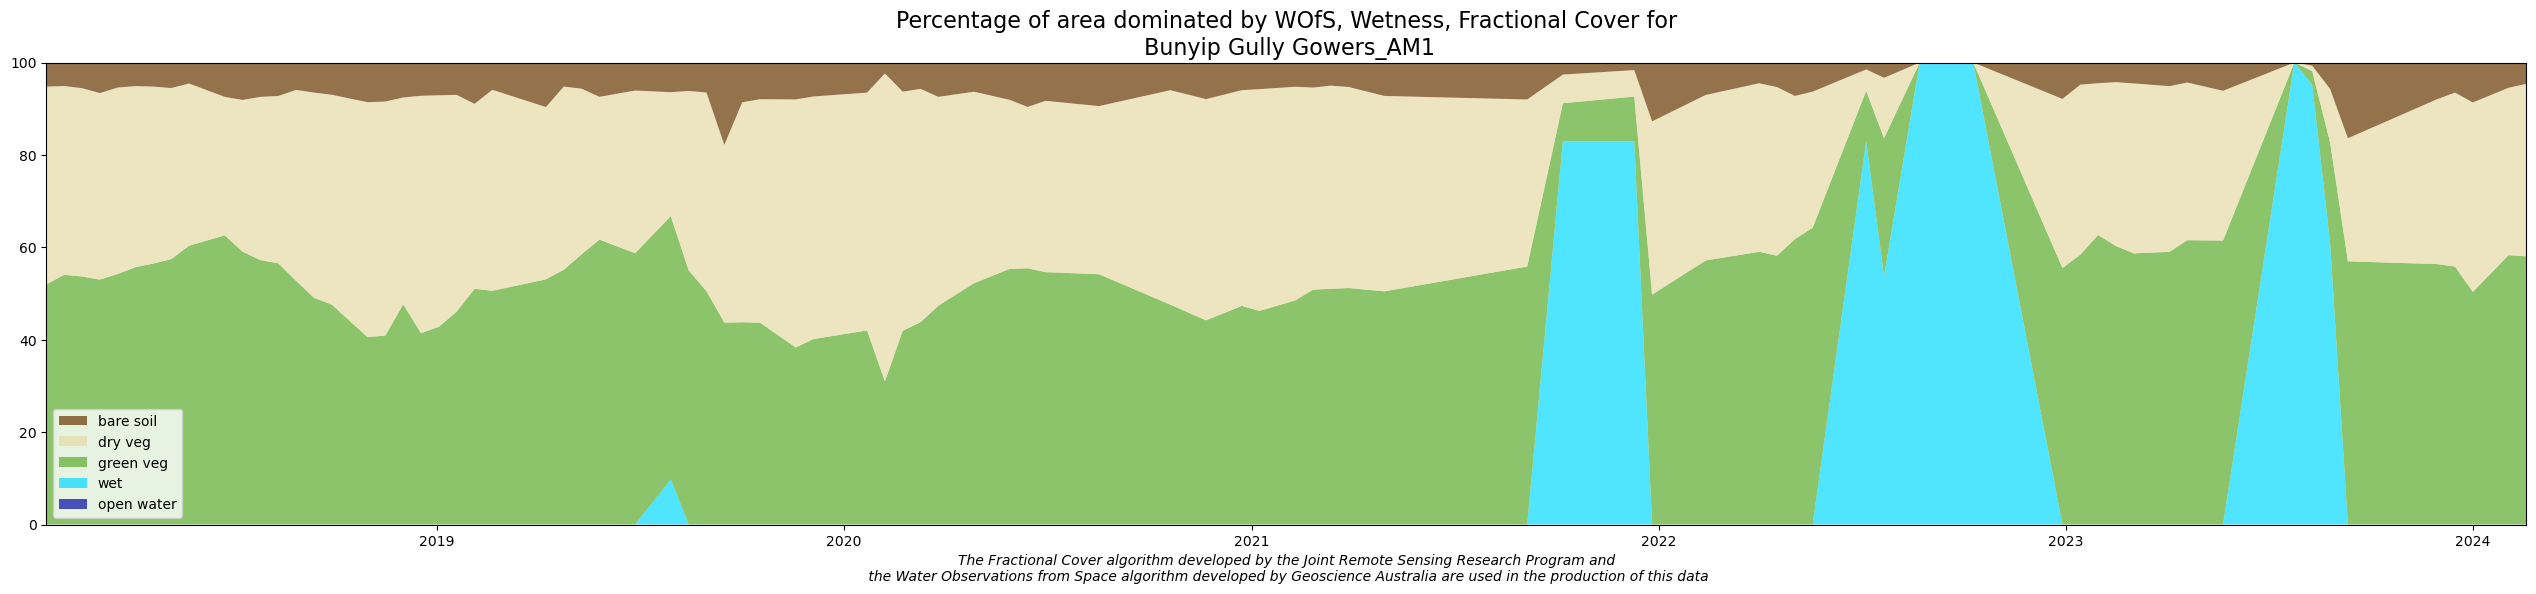

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:25:19,682 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2024-05-15 01:25:46,460 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-05-15 01:26:14,393 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-05-15 01:26:18,514 - distributed.utils_perf - WARNING - full garbage collections took 18% CPU time recently (threshold: 10%)
2024-05-15 01:26:30,495 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2024-05-15 01:26:51,079 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


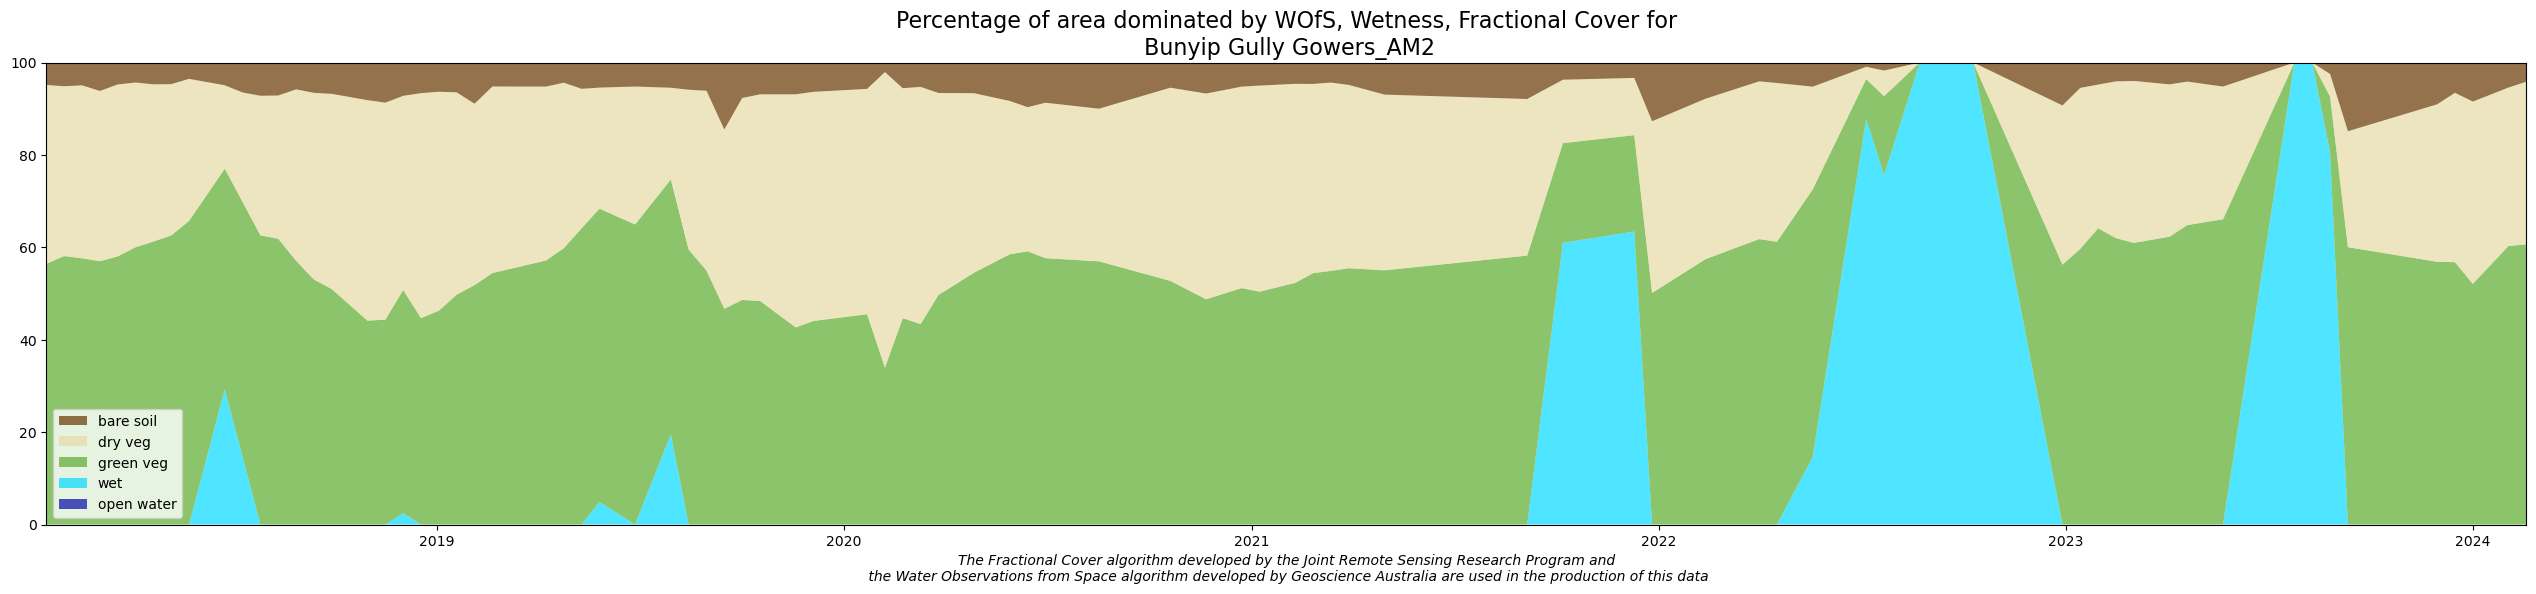

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:27:16,714 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2024-05-15 01:27:40,707 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2024-05-15 01:28:01,402 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2024-05-15 01:28:05,157 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2024-05-15 01:28:19,712 - distributed.utils_perf - WARNING - full garbage collections took 19% CPU time recently (threshold: 10%)
2024-05-15 01:28:36,847 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


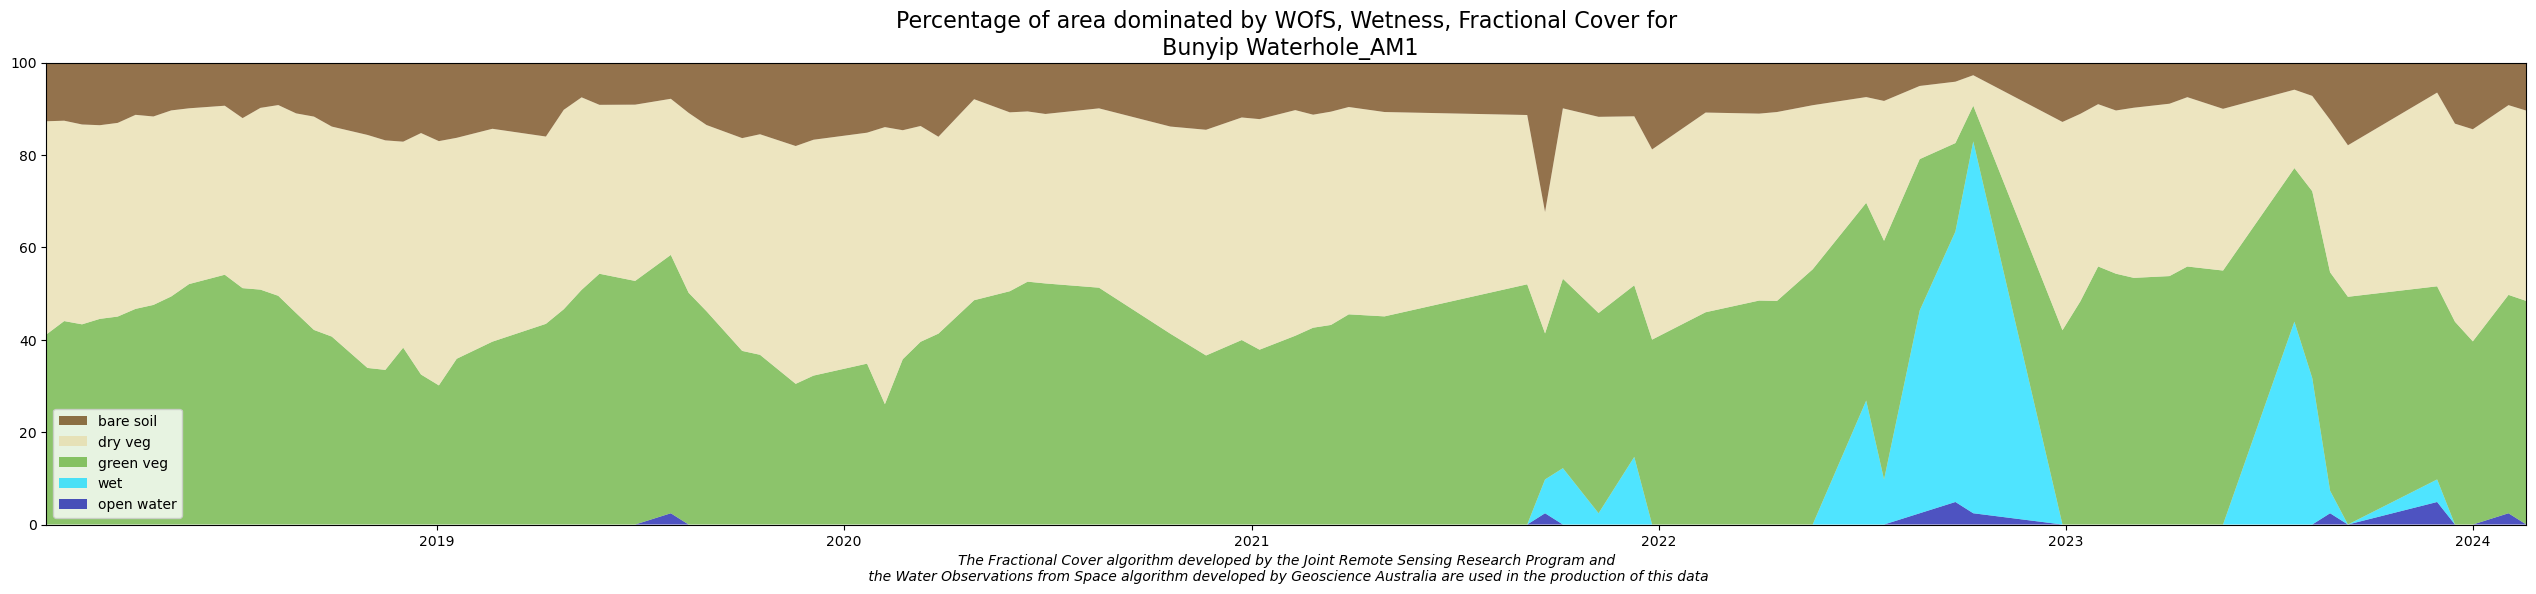

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:29:01,038 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:29:23,004 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:29:36,170 - distributed.utils_perf - WARNING - full garbage collections took 20% CPU time recently (threshold: 10%)
2024-05-15 01:29:39,996 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:29:59,786 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


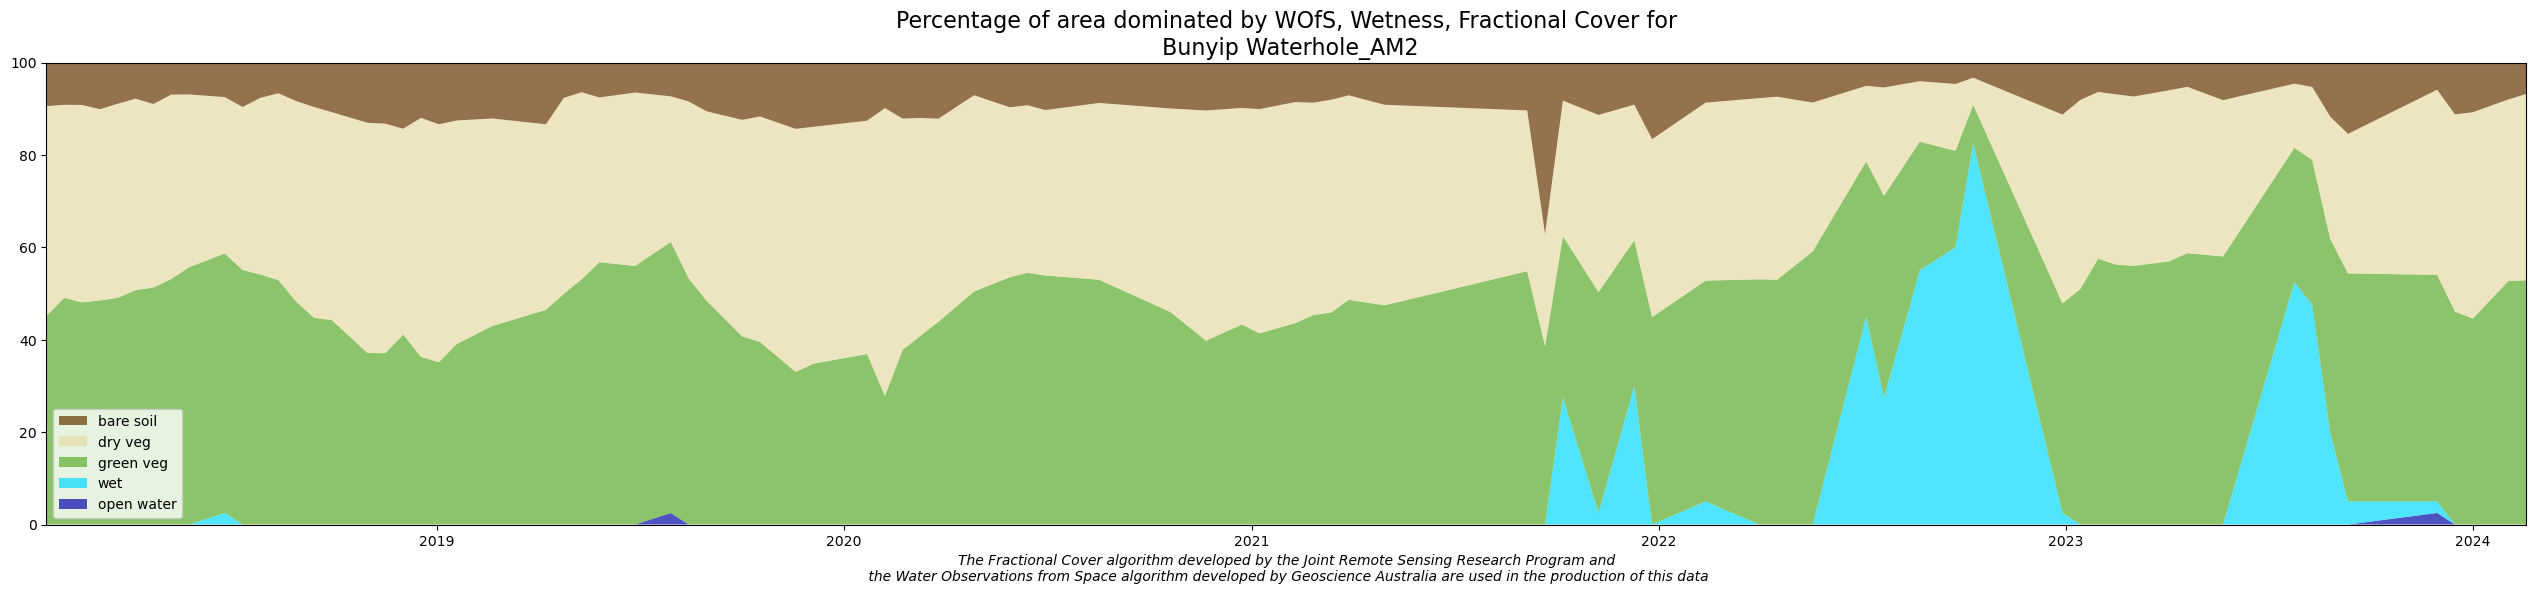

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:30:22,778 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-05-15 01:31:10,426 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:31:59,663 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:32:02,908 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:32:09,066 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:32:28,015 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-05-15 01:32:50,302 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


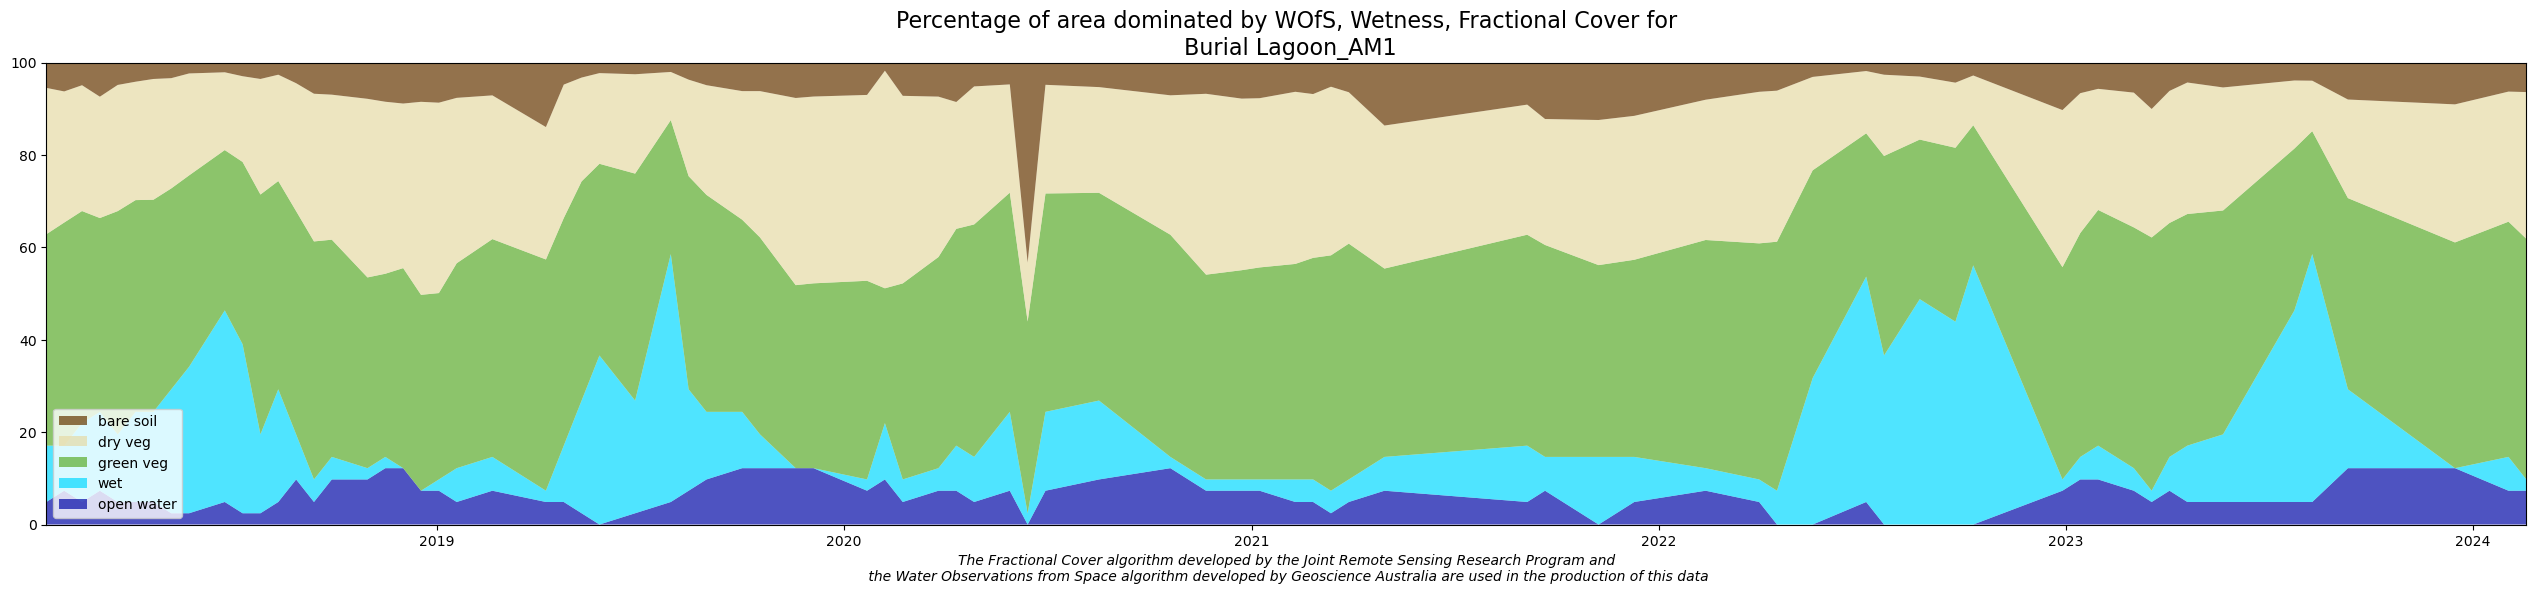

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:33:51,360 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-05-15 01:34:30,880 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:34:34,203 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:34:45,207 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:35:06,098 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


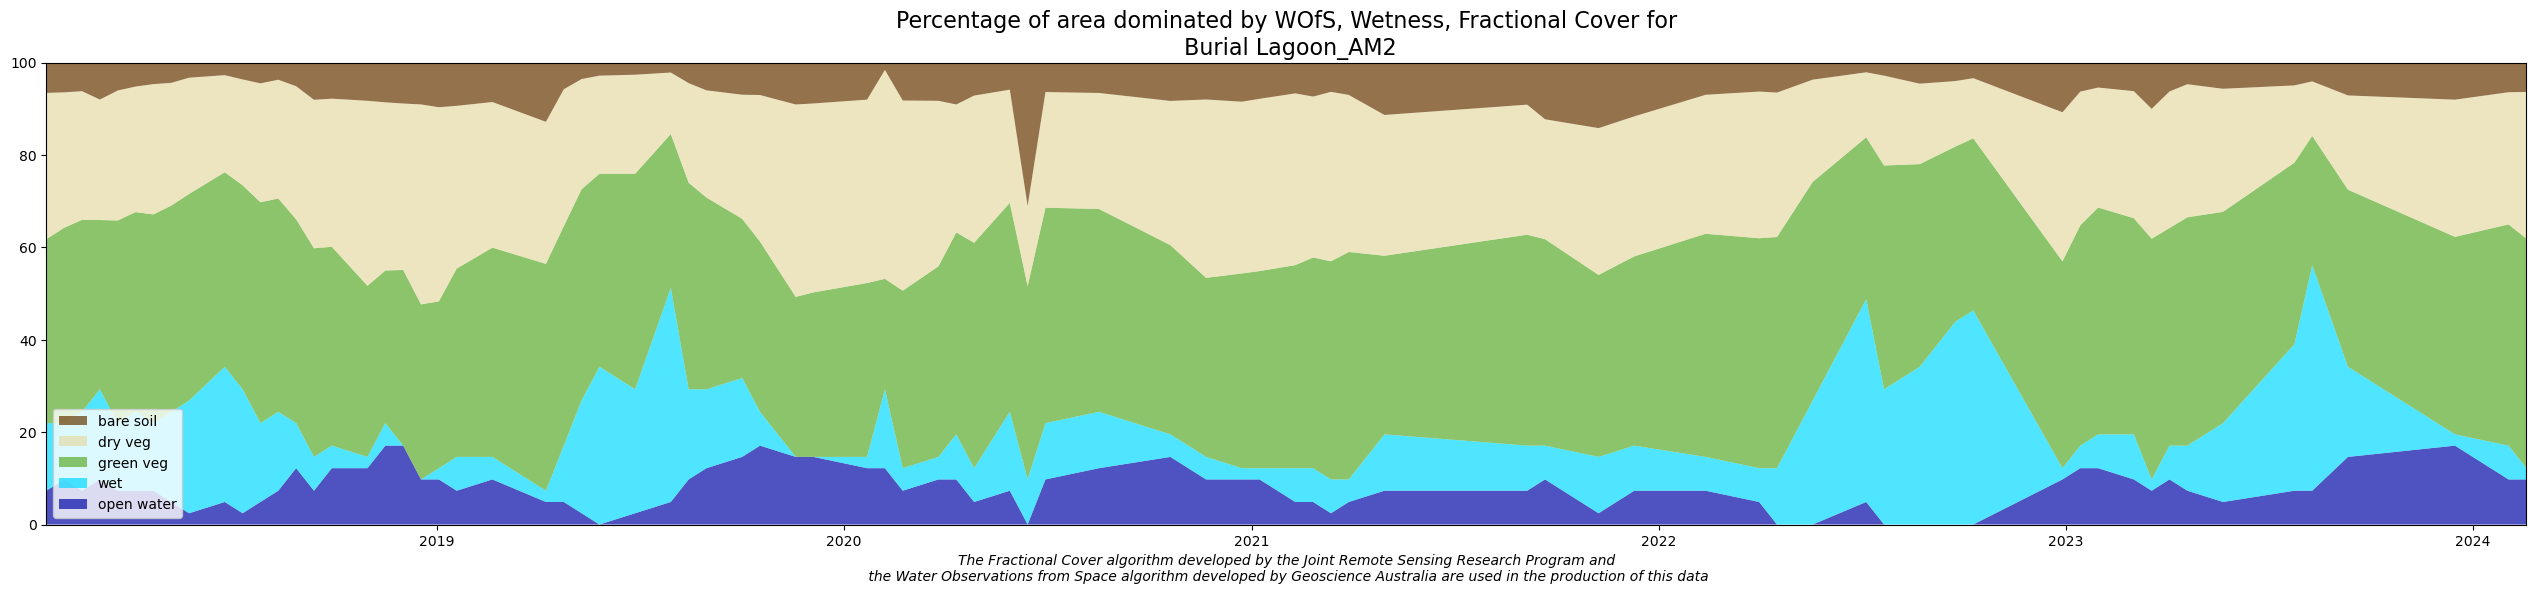

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:35:33,111 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-05-15 01:35:59,767 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-05-15 01:36:23,971 - distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)
2024-05-15 01:36:27,489 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-05-15 01:36:40,713 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:36:58,741 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


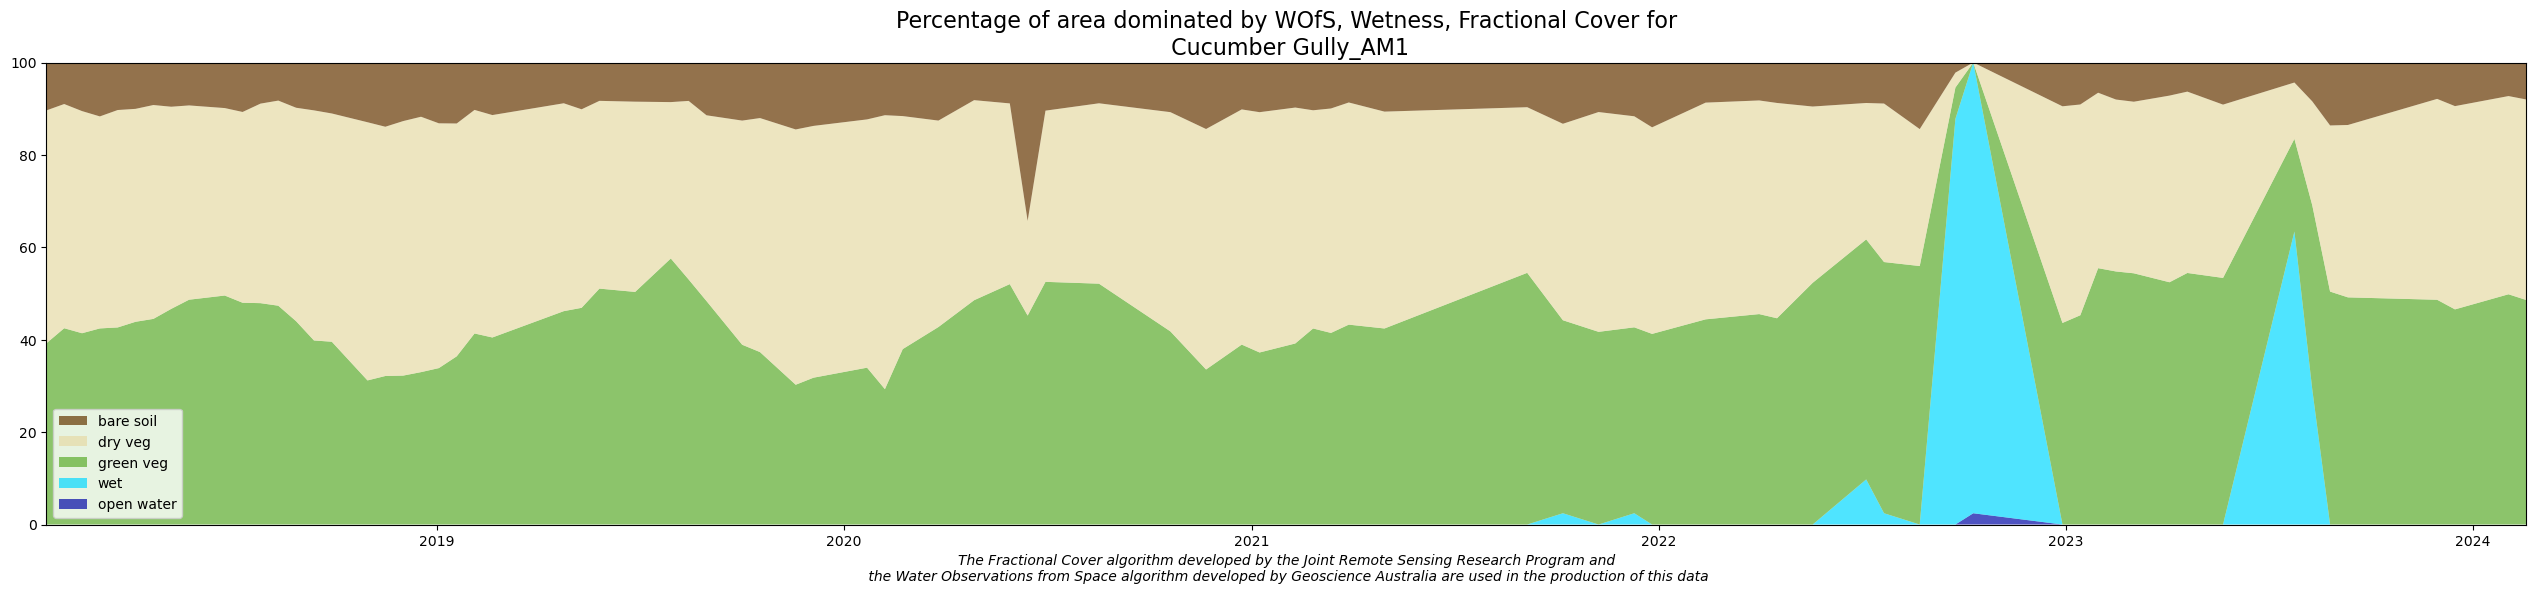

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:37:24,650 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:37:51,193 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:38:12,449 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:38:16,010 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:38:30,695 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:38:48,699 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


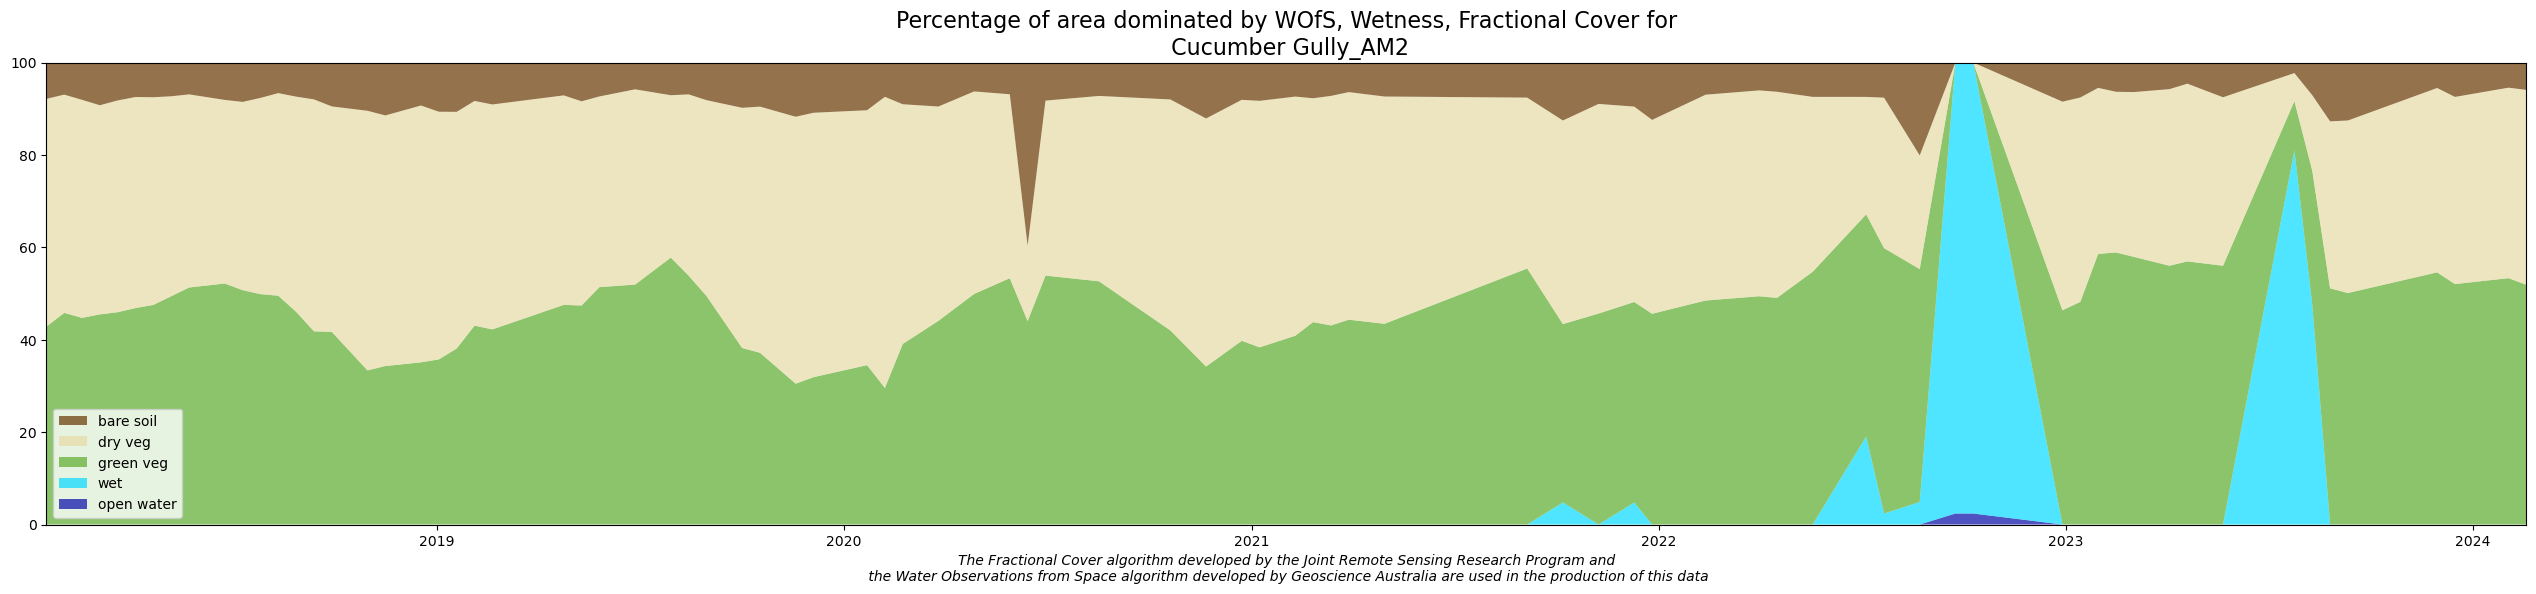

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:39:19,311 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:39:47,579 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:40:02,347 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:40:06,298 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:40:27,244 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


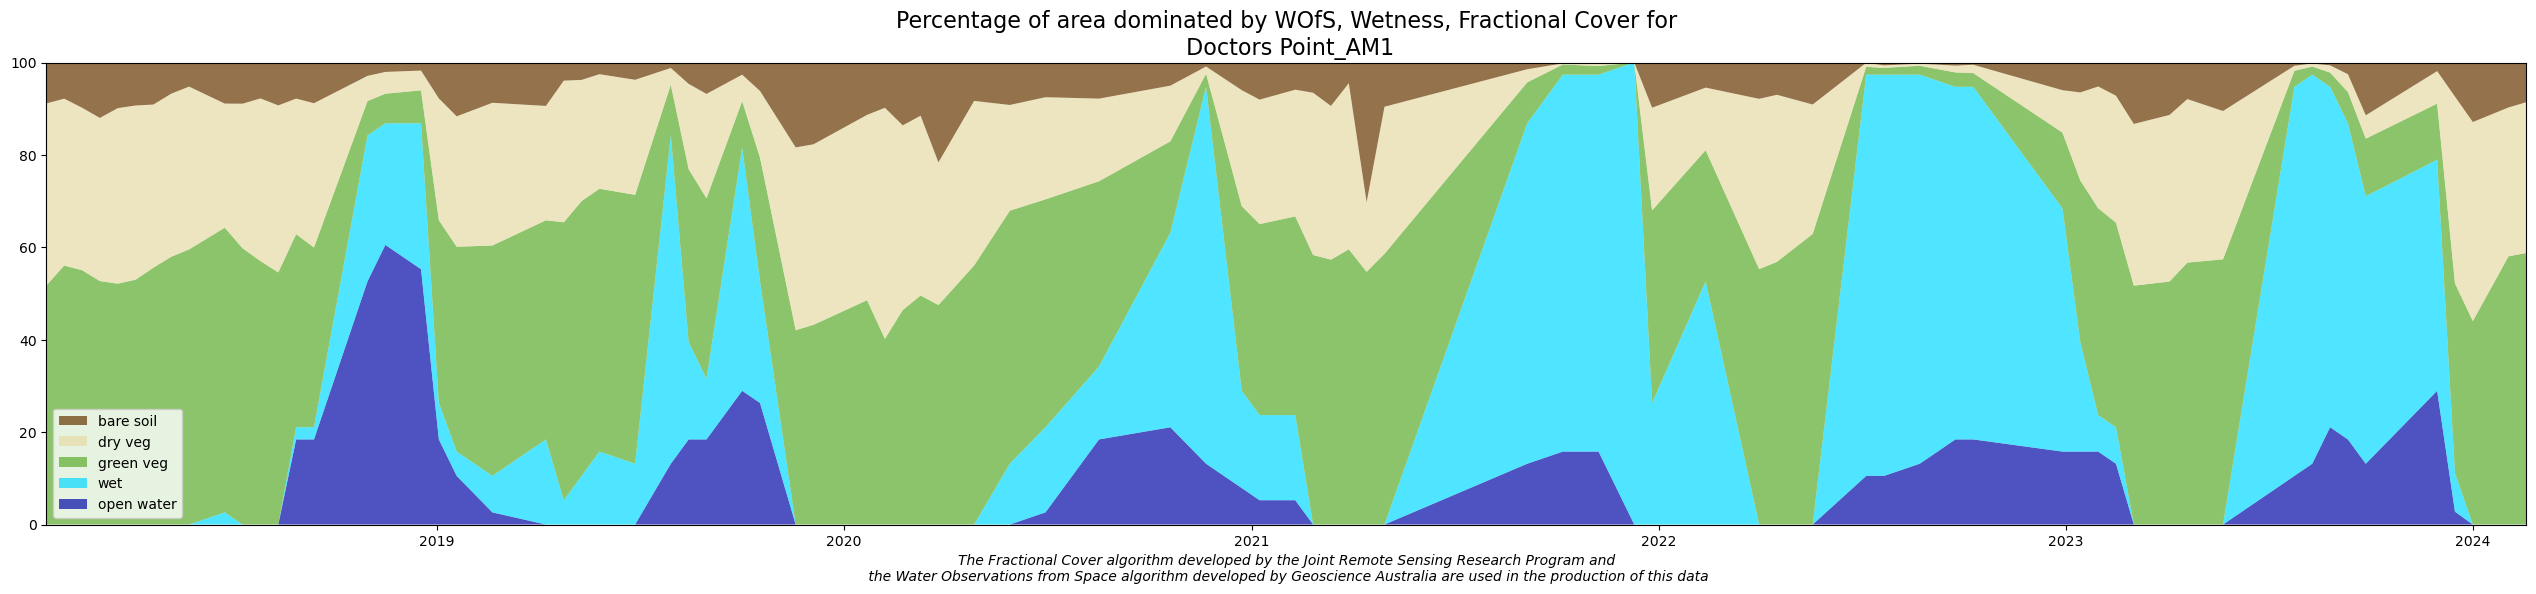

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:40:48,336 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:41:09,702 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:41:37,296 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:41:40,486 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:41:44,338 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:42:02,673 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


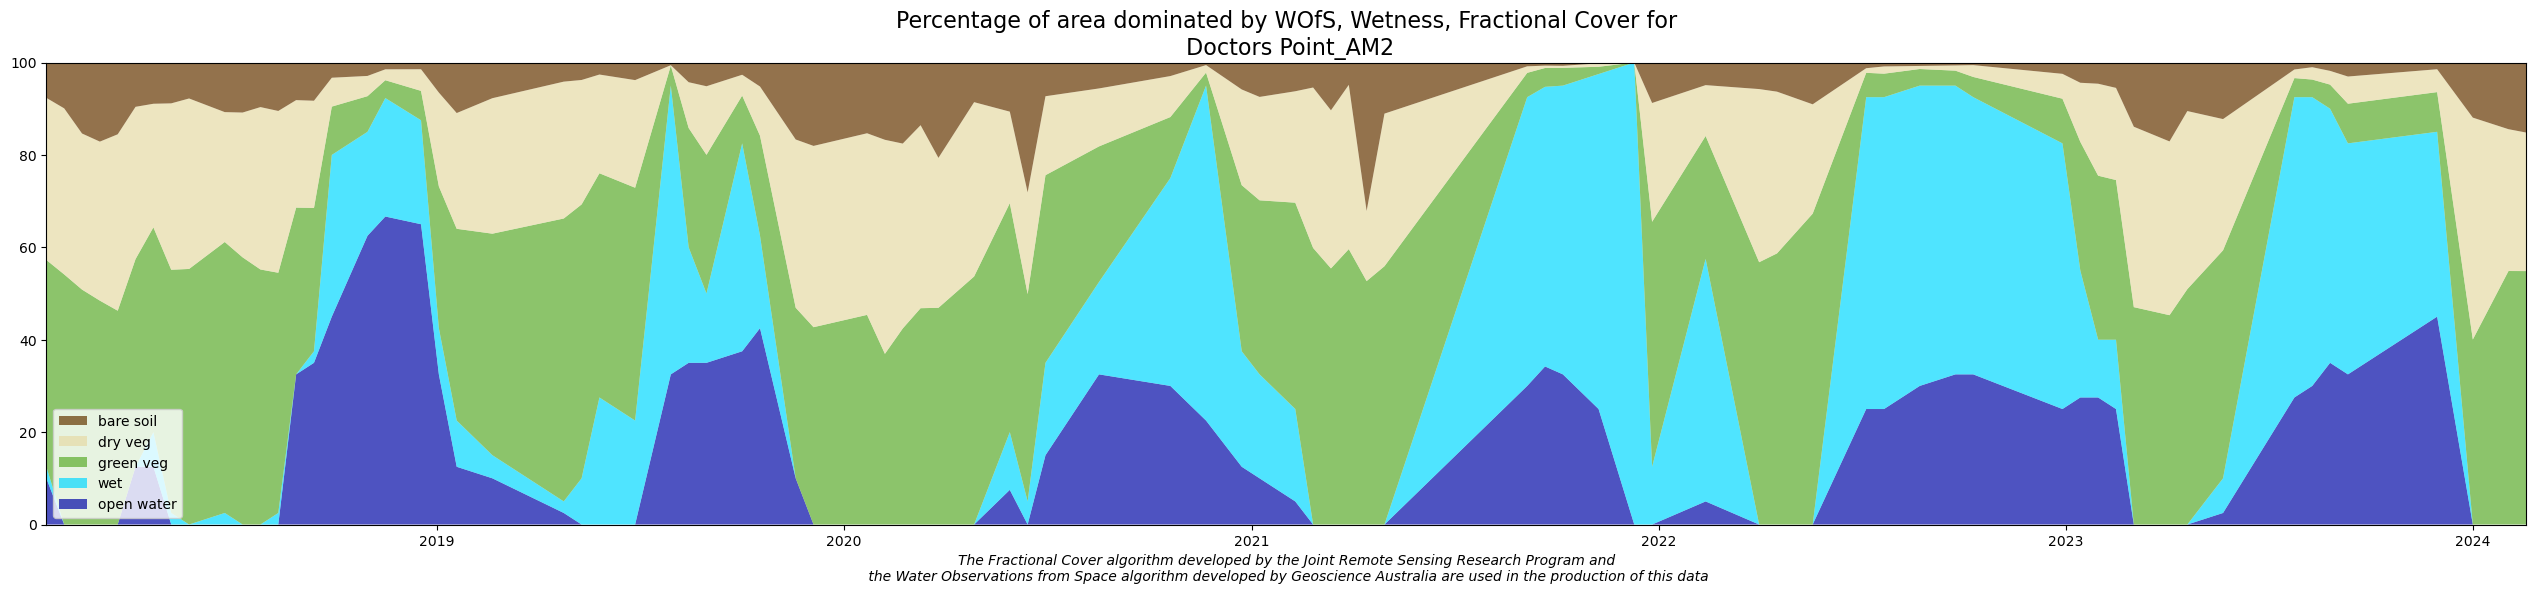

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:42:22,844 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:42:40,749 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:43:02,519 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:43:05,896 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:43:10,529 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:43:21,904 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:43:36,433 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


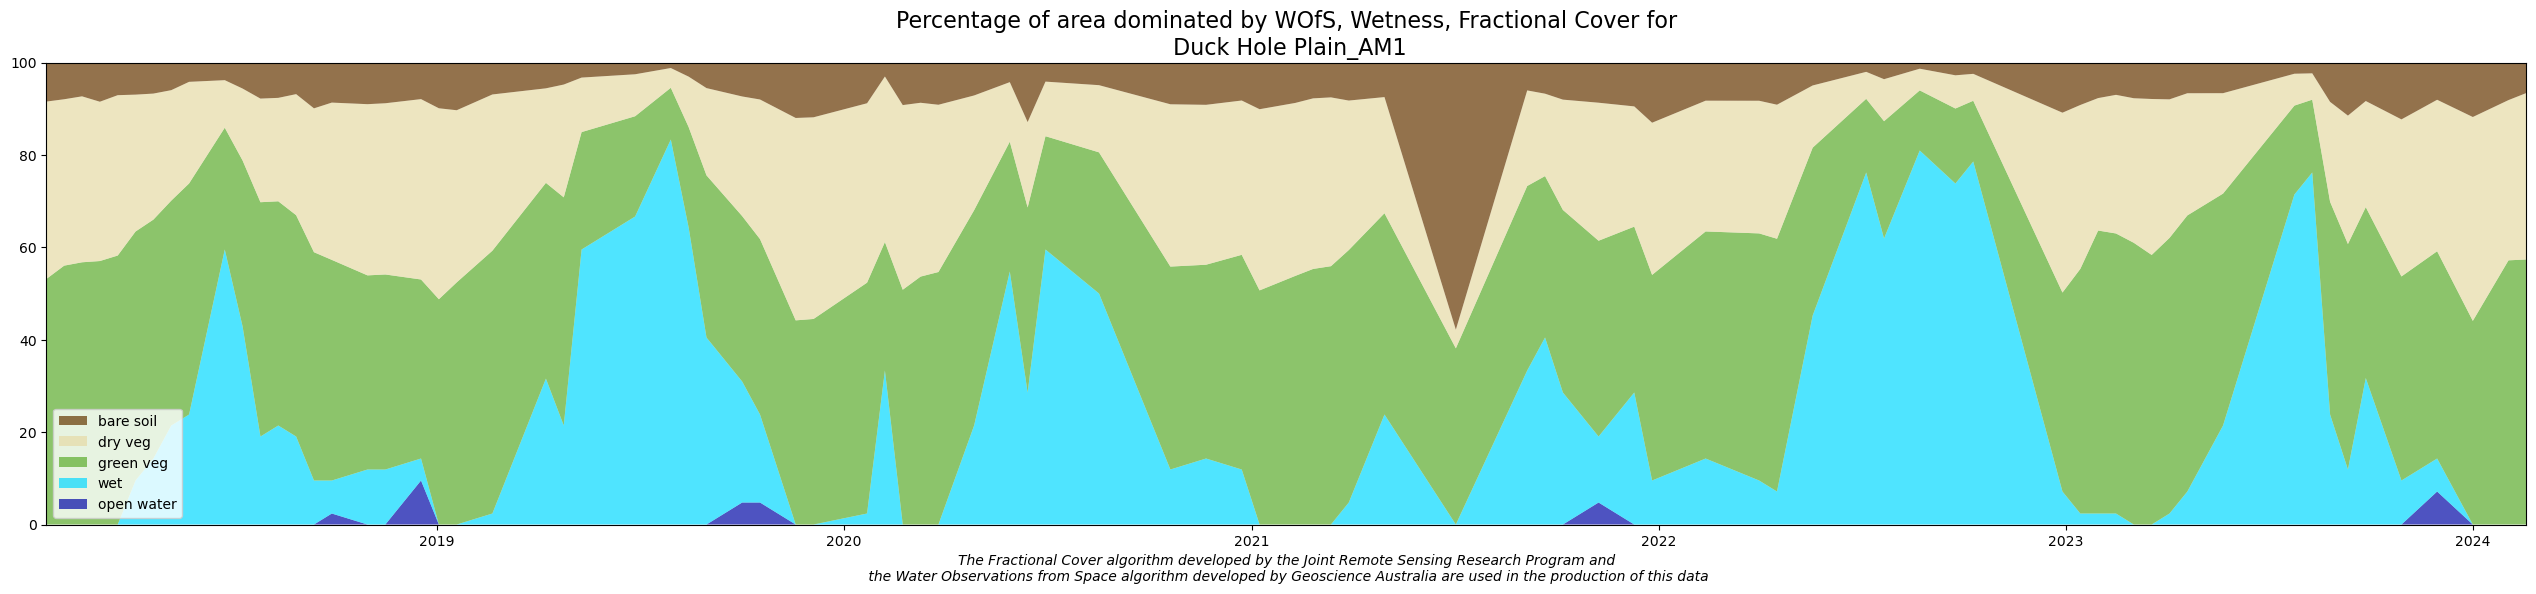

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:44:00,286 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:44:21,101 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:44:24,217 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:44:28,016 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:44:44,015 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


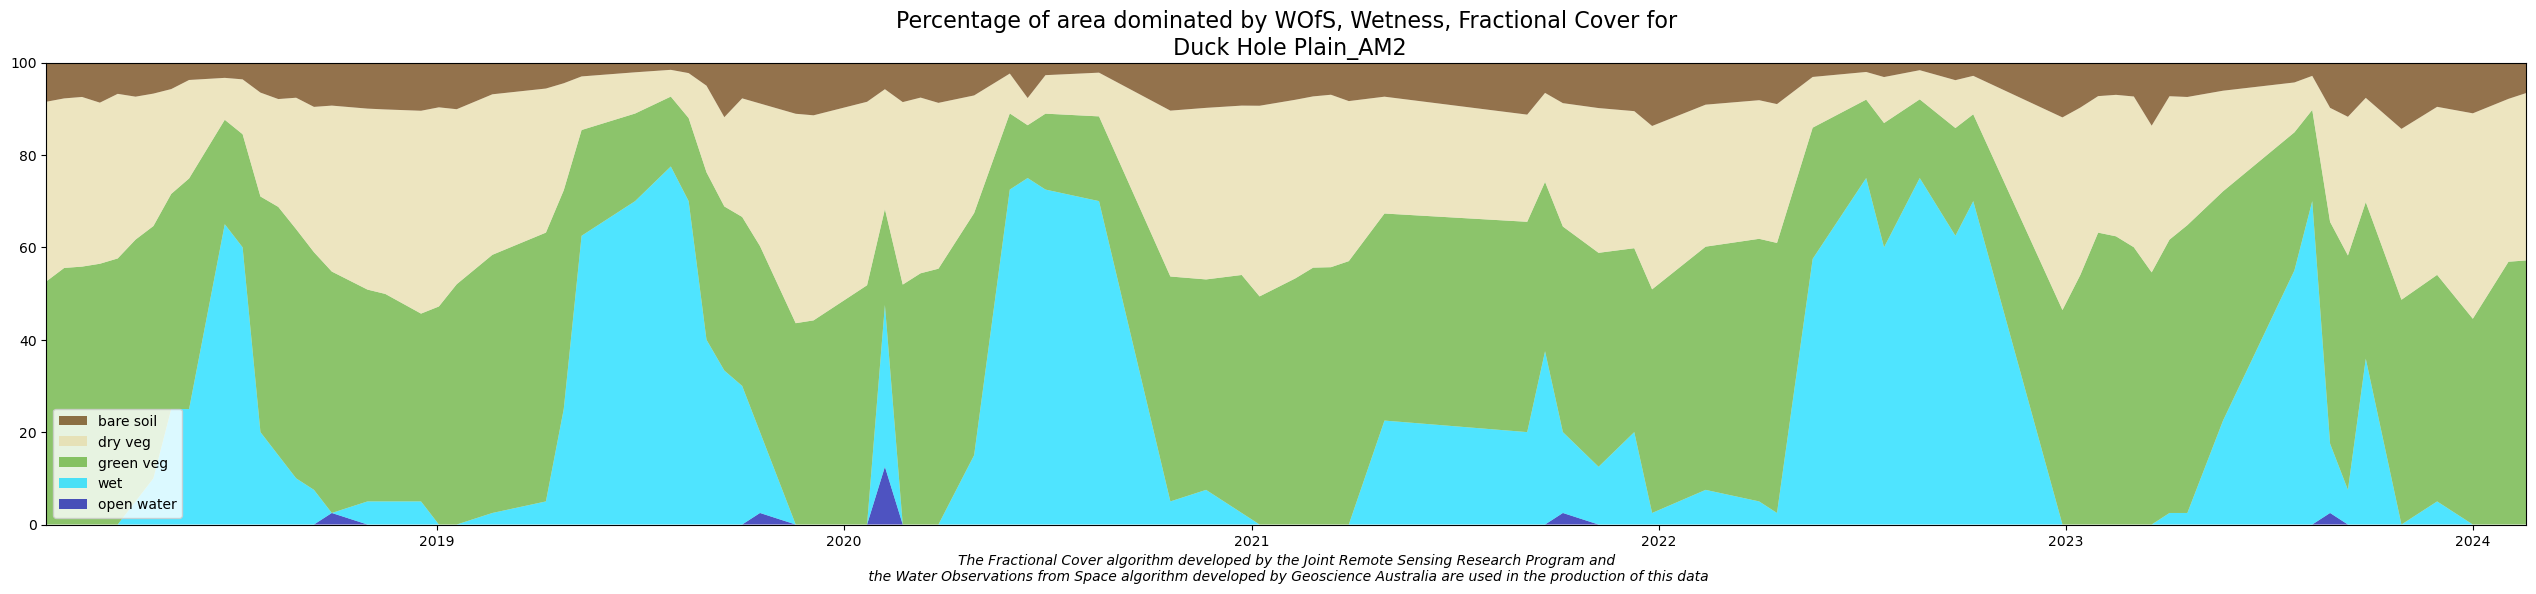

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:45:00,655 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:45:16,687 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:45:34,678 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:45:37,923 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:45:43,904 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:45:54,595 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:46:06,422 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


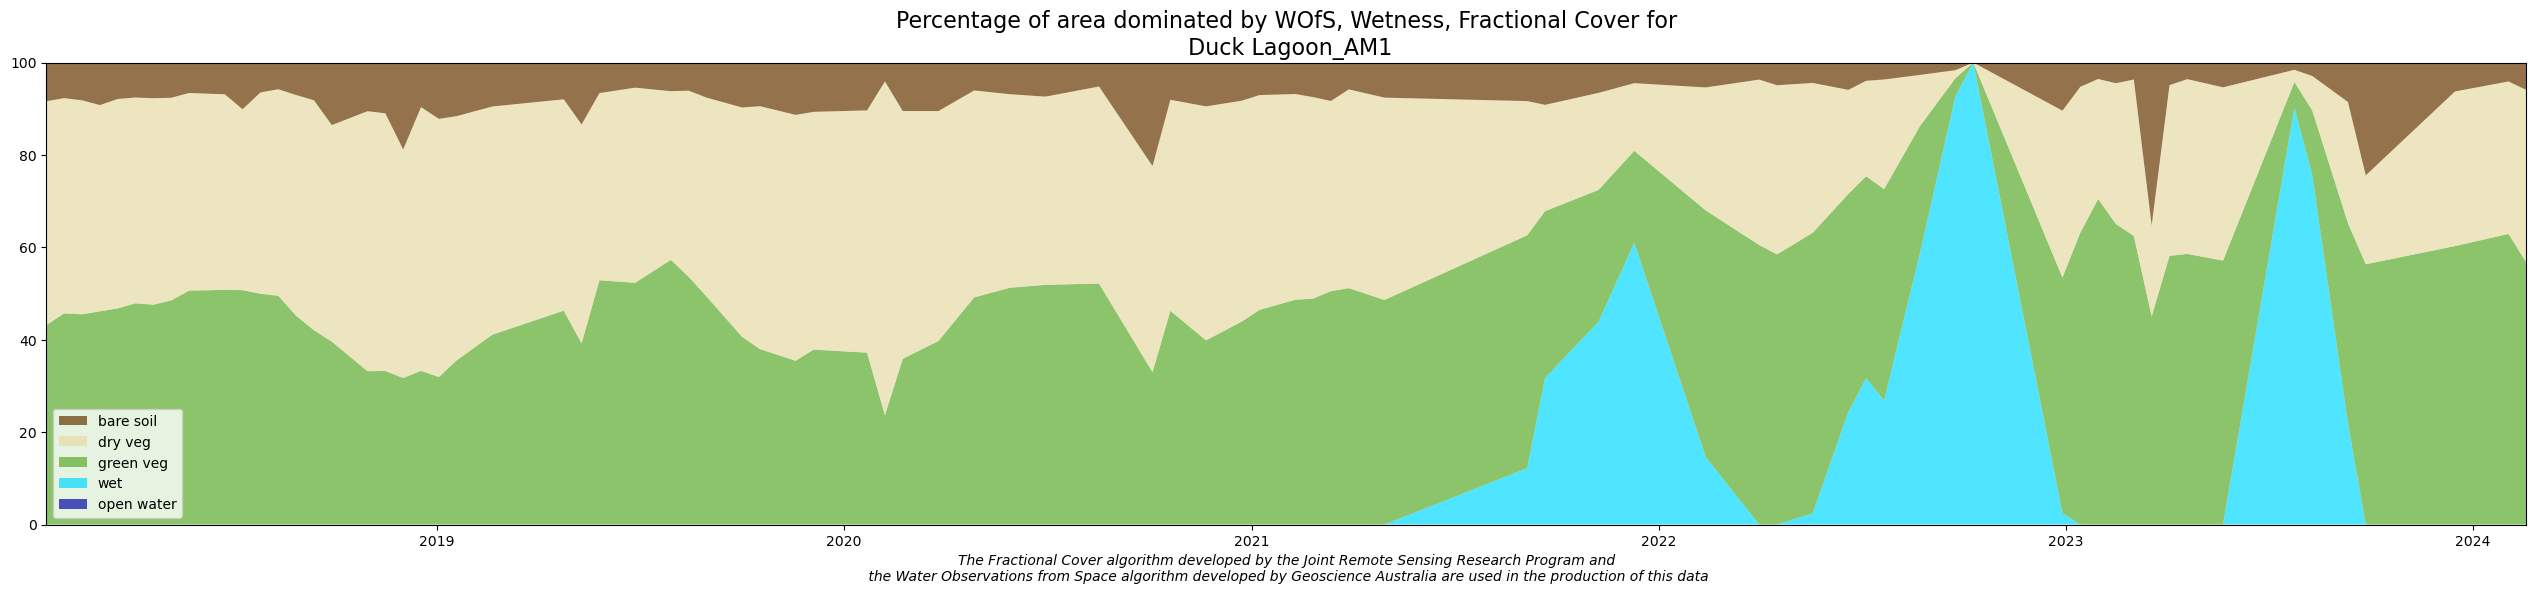

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:46:29,647 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:46:44,319 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:46:47,643 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:46:55,977 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:47:07,070 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


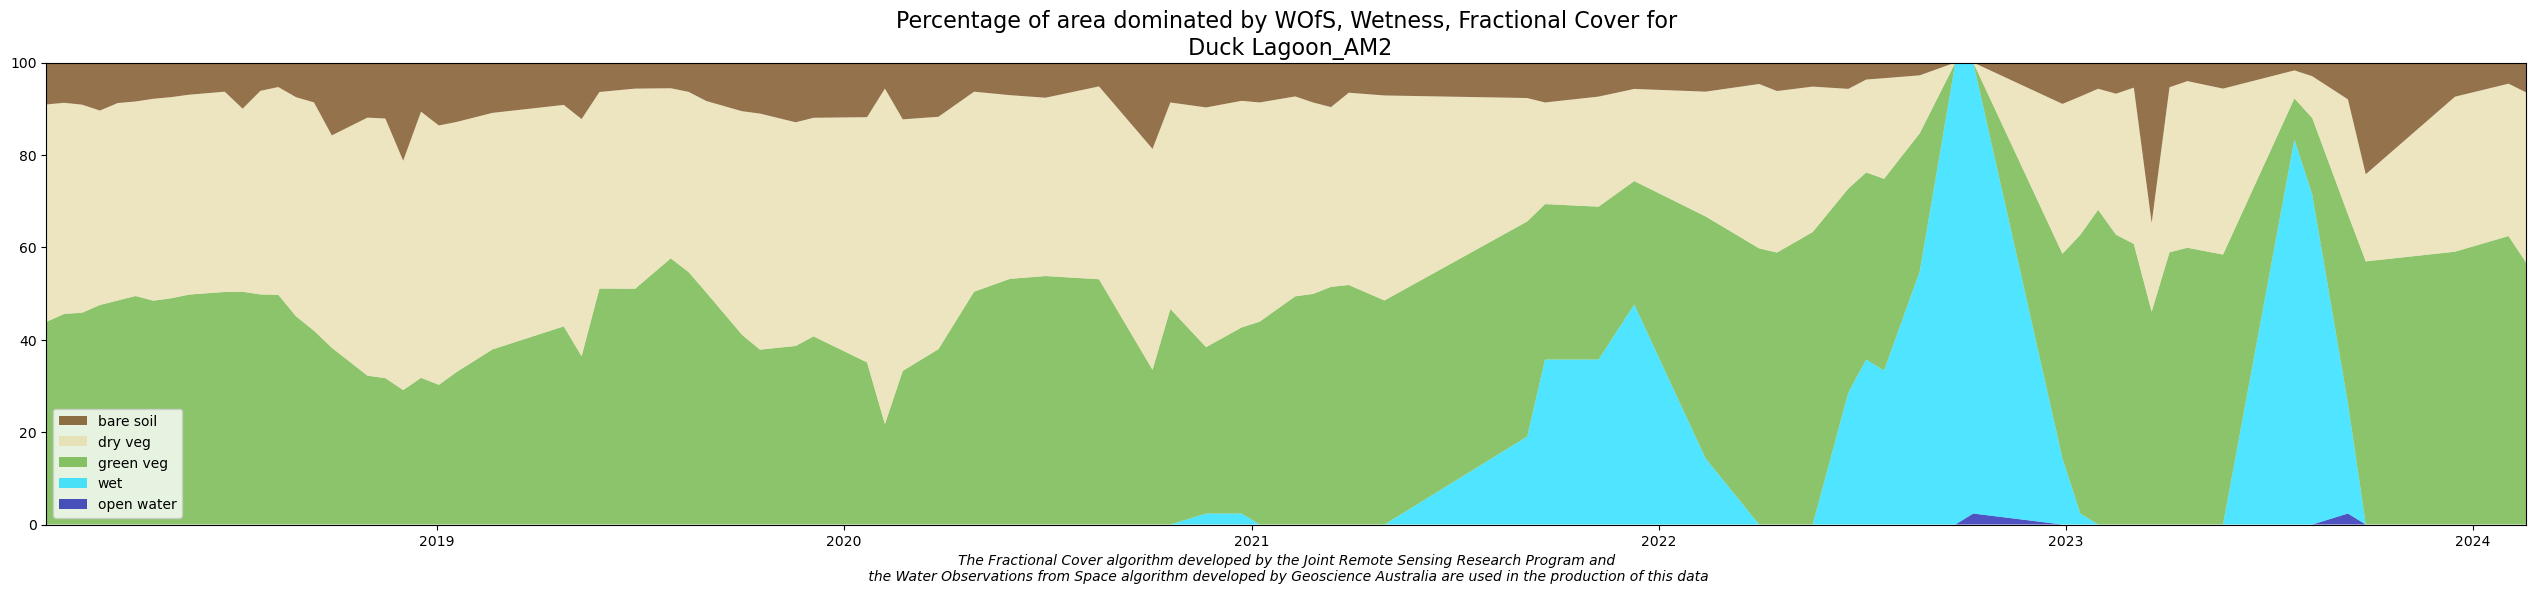

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:47:24,812 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2024-05-15 01:47:40,070 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:47:53,631 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:47:57,077 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2024-05-15 01:48:09,626 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2024-05-15 01:48:23,437 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


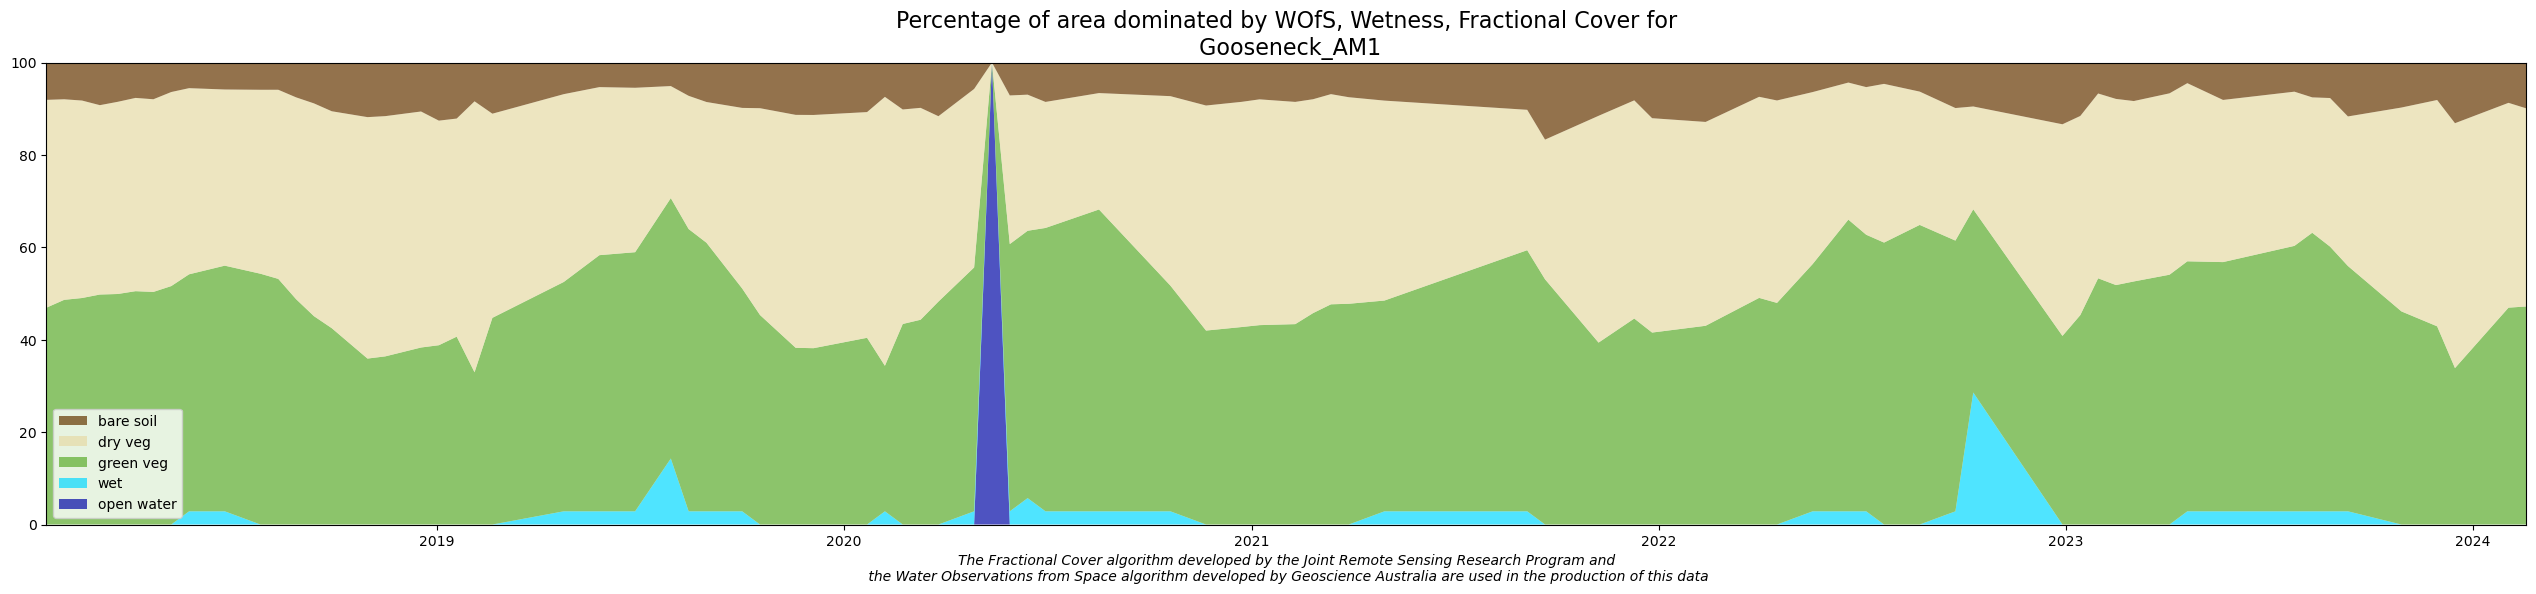

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:48:43,326 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2024-05-15 01:48:58,022 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2024-05-15 01:49:07,859 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:49:11,655 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:49:27,783 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


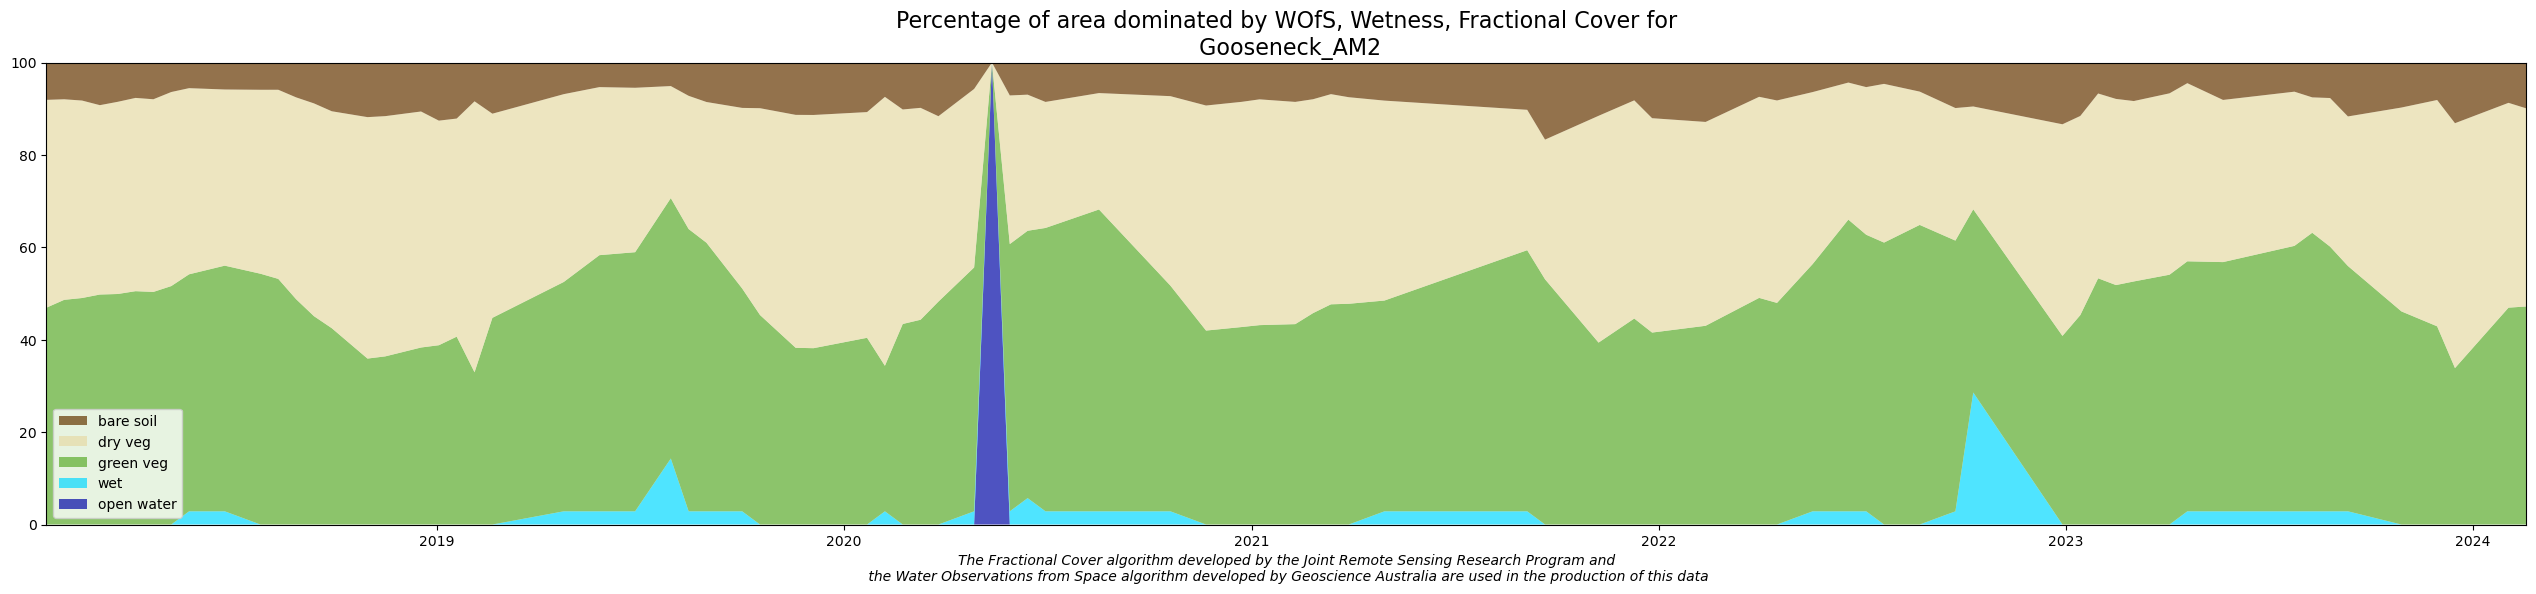

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:49:48,352 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:50:22,833 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 01:51:05,864 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:51:09,242 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:51:13,118 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:51:41,436 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


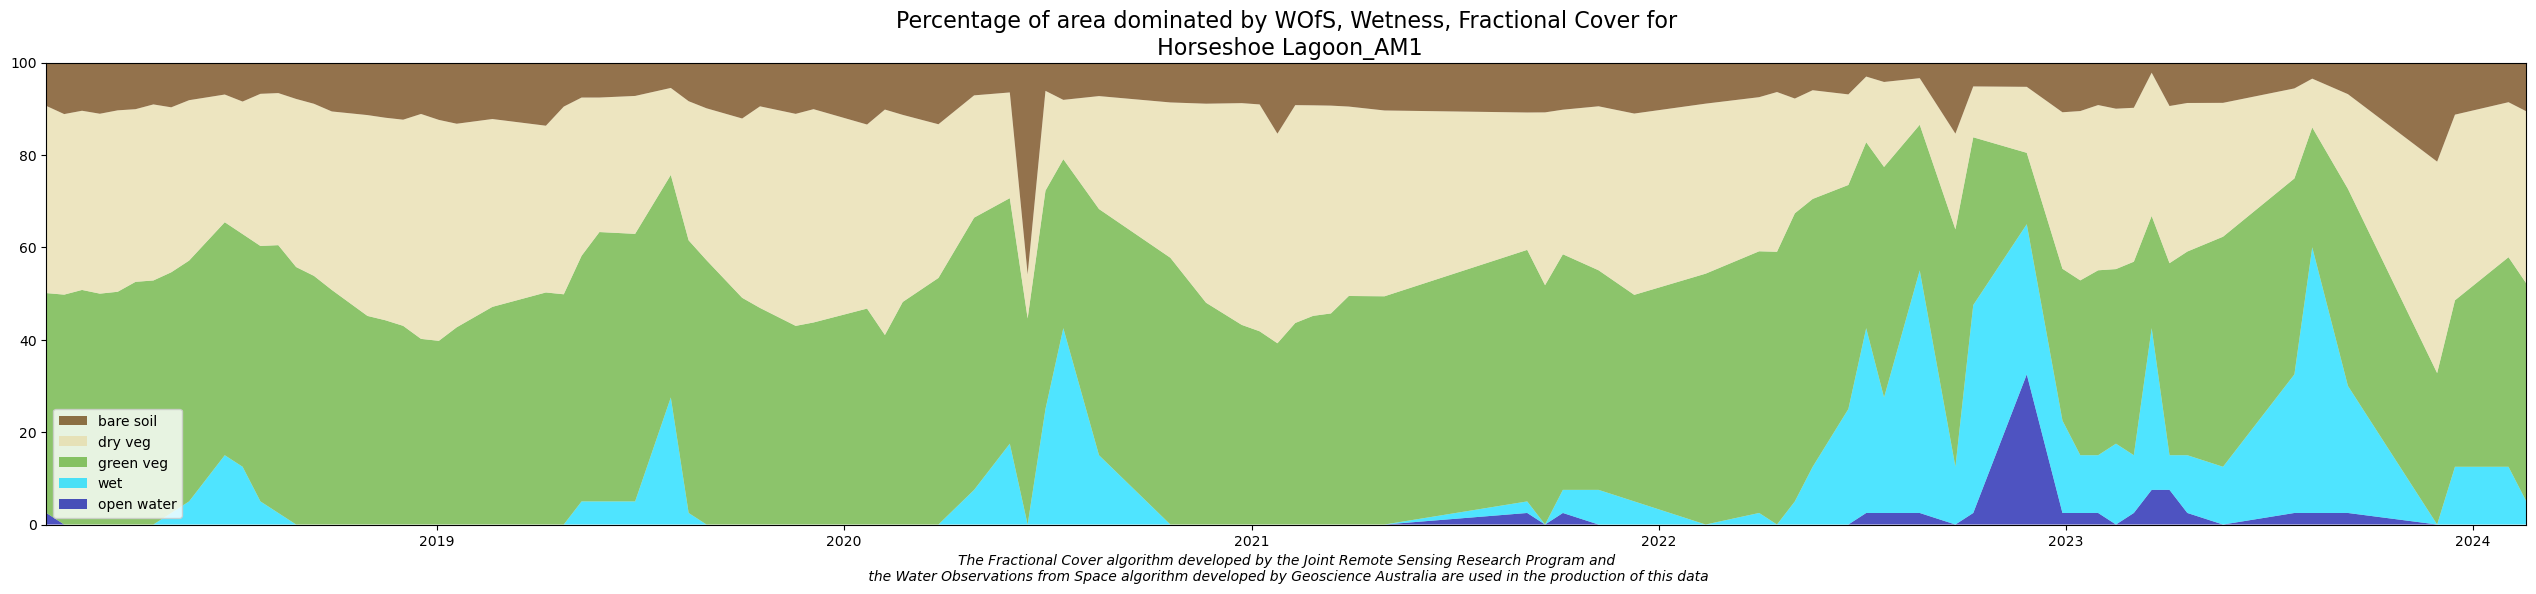

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:52:13,099 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:52:48,788 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:53:26,381 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:53:29,603 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:53:36,999 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:53:57,051 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


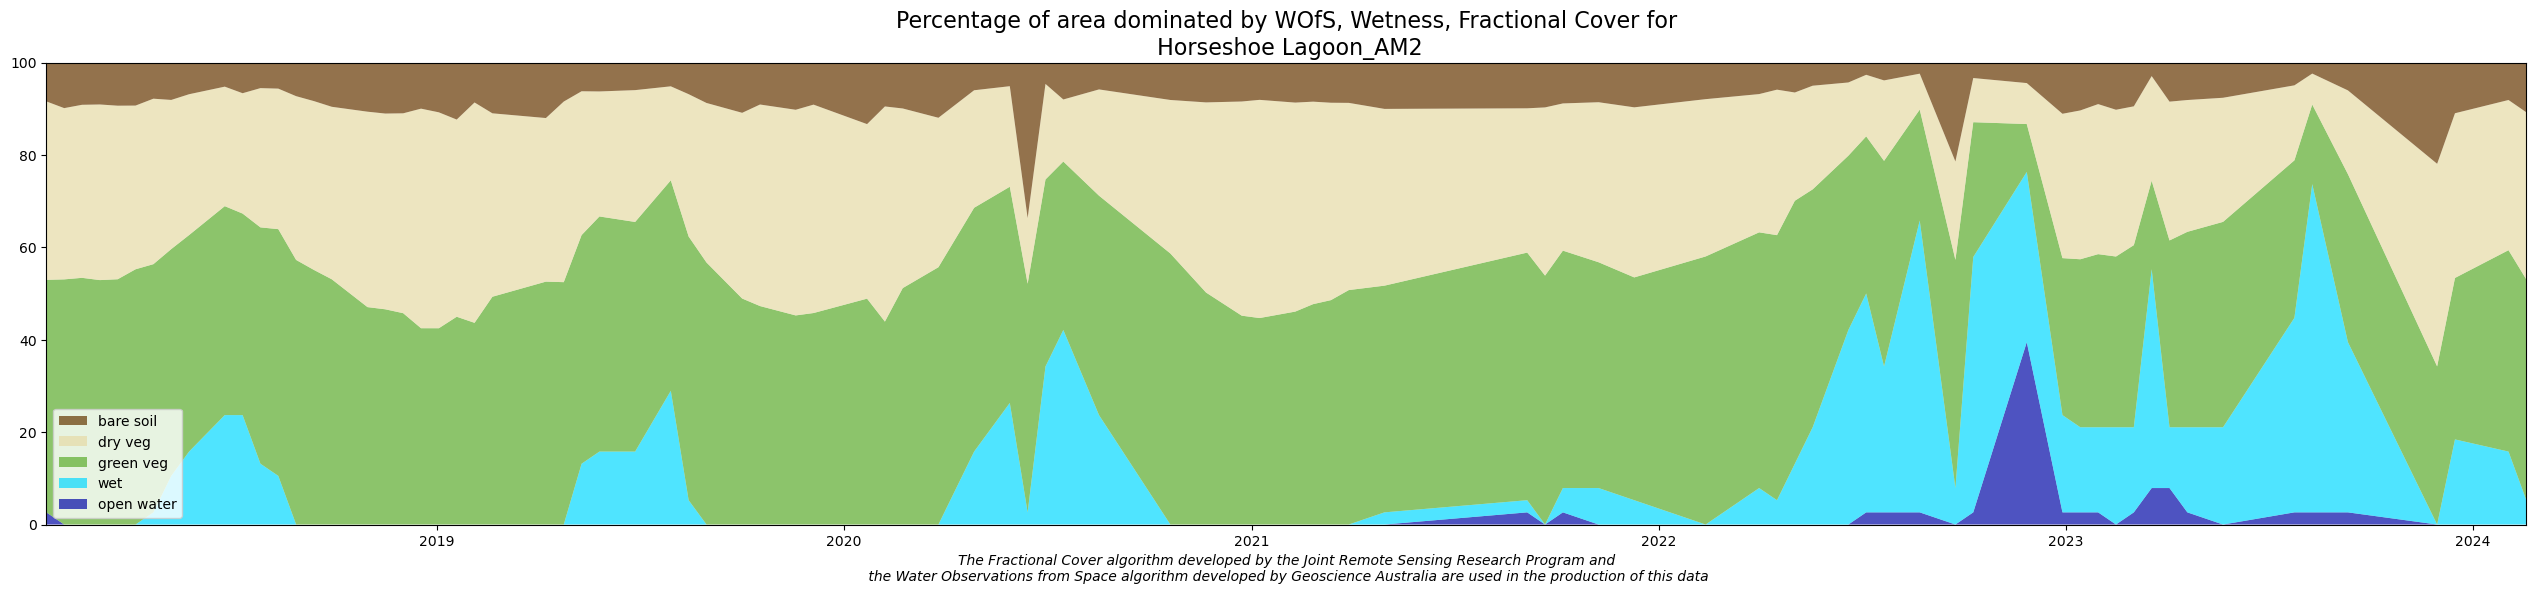

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:54:22,354 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:54:41,324 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:55:04,237 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:55:12,003 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:55:19,197 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:55:32,229 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


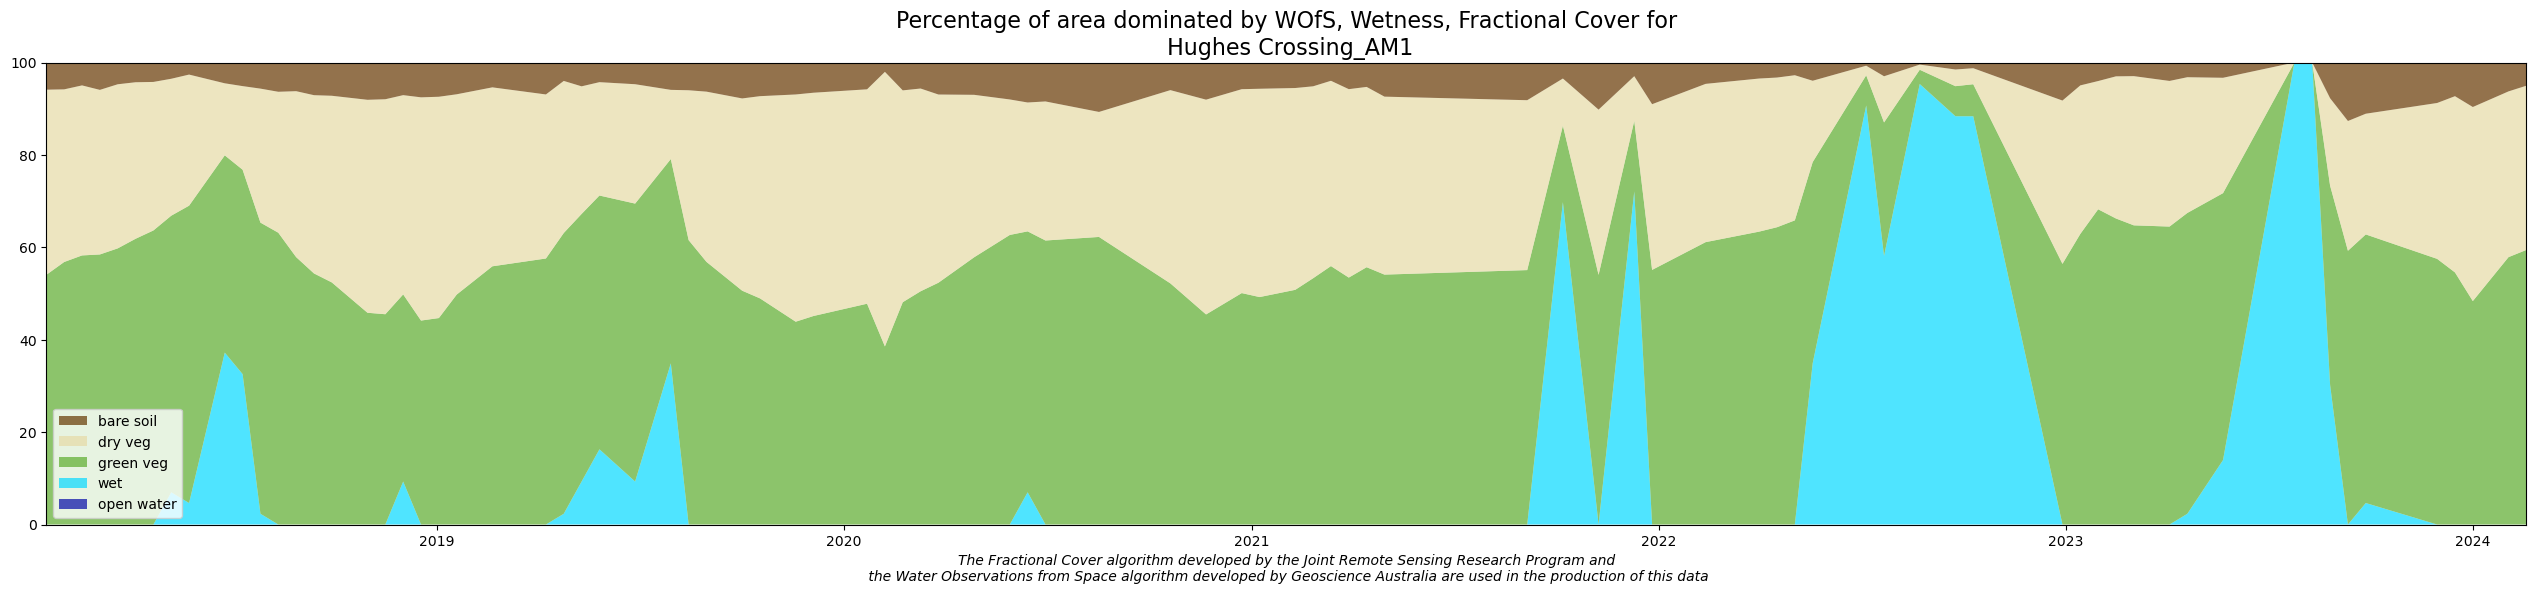

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:55:52,208 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:56:10,362 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:56:33,304 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:56:36,744 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:56:41,628 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:56:54,559 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:57:10,311 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


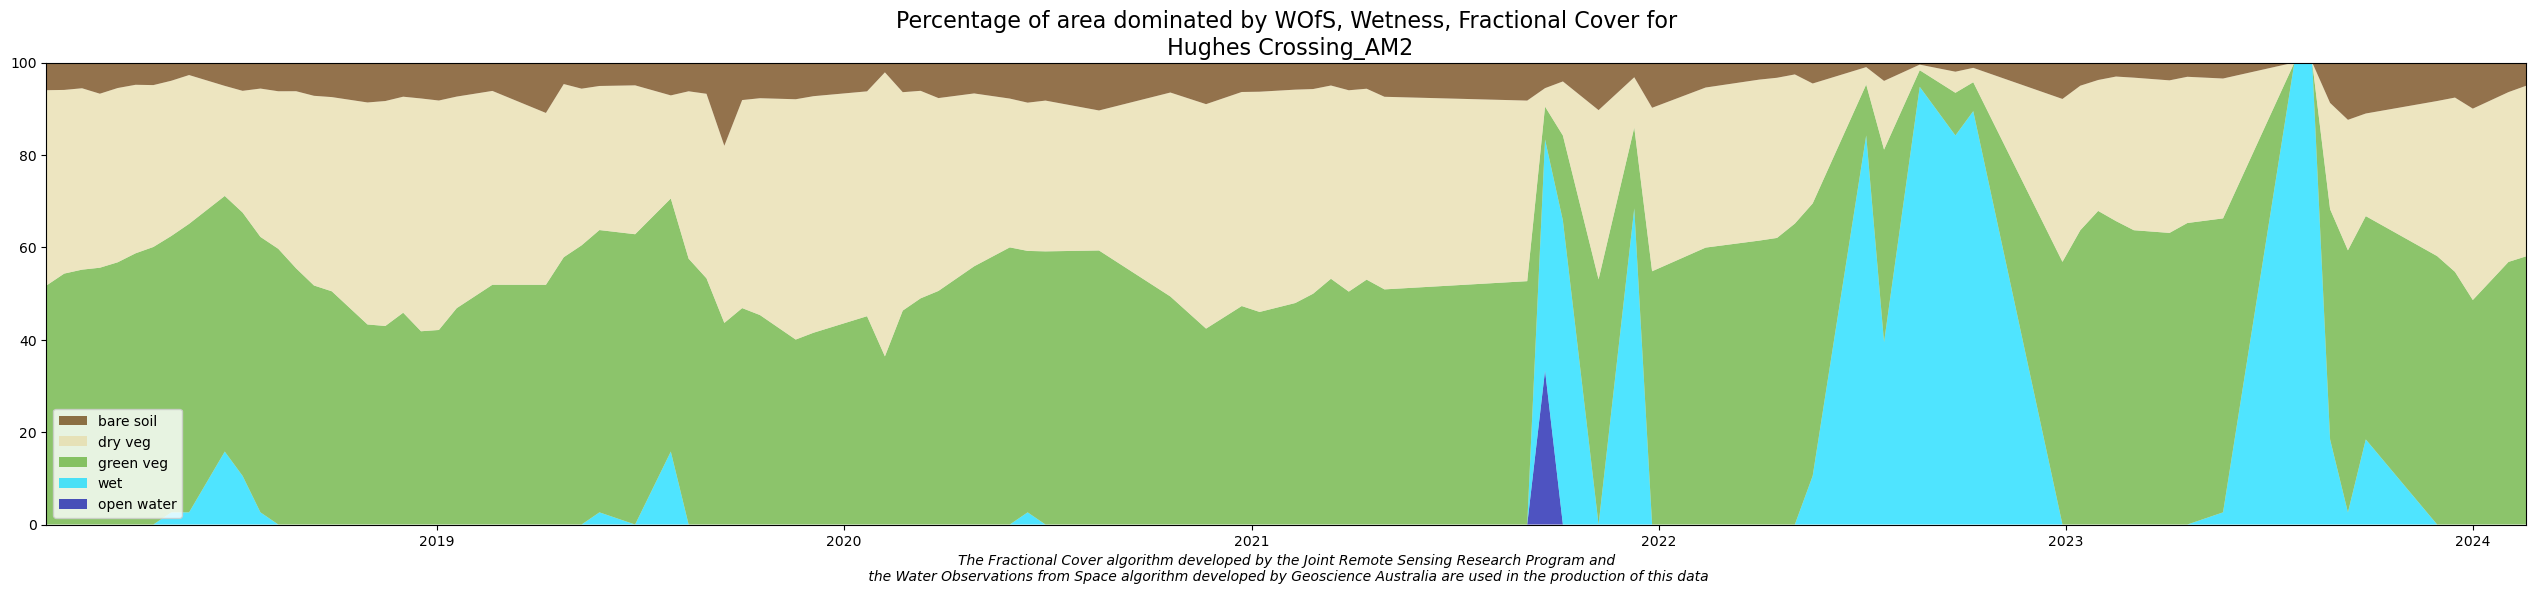

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:57:36,013 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:57:55,650 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:57:59,127 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:58:07,540 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:58:19,903 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


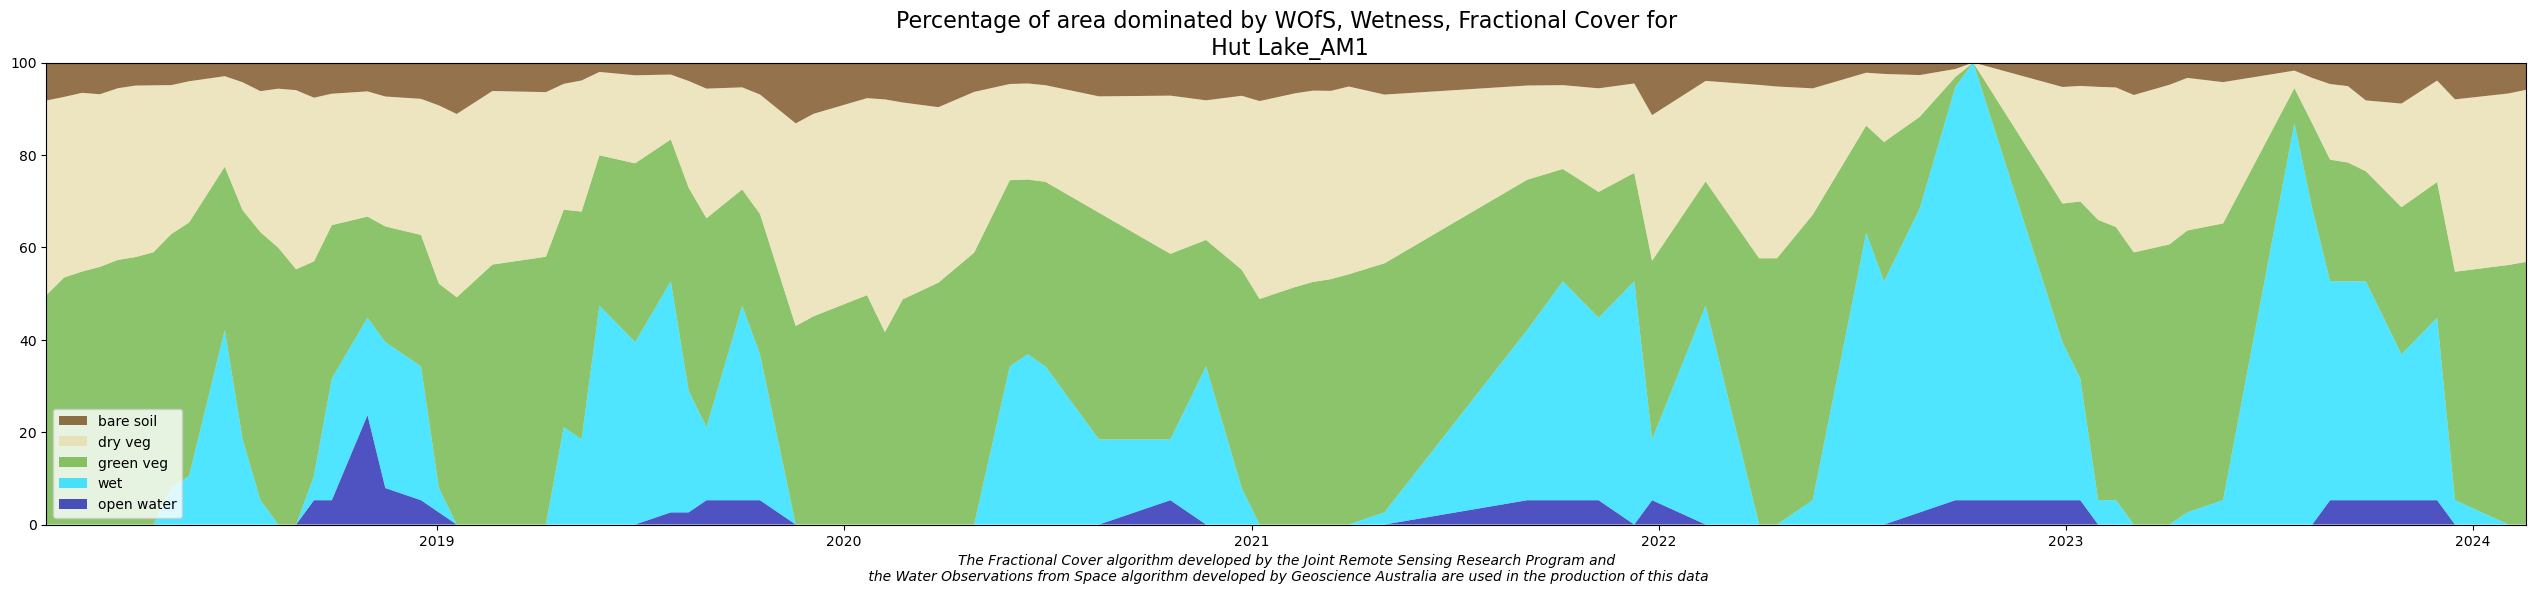

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:58:39,427 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:58:55,483 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:59:11,169 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:59:14,551 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 01:59:23,655 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 01:59:35,012 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


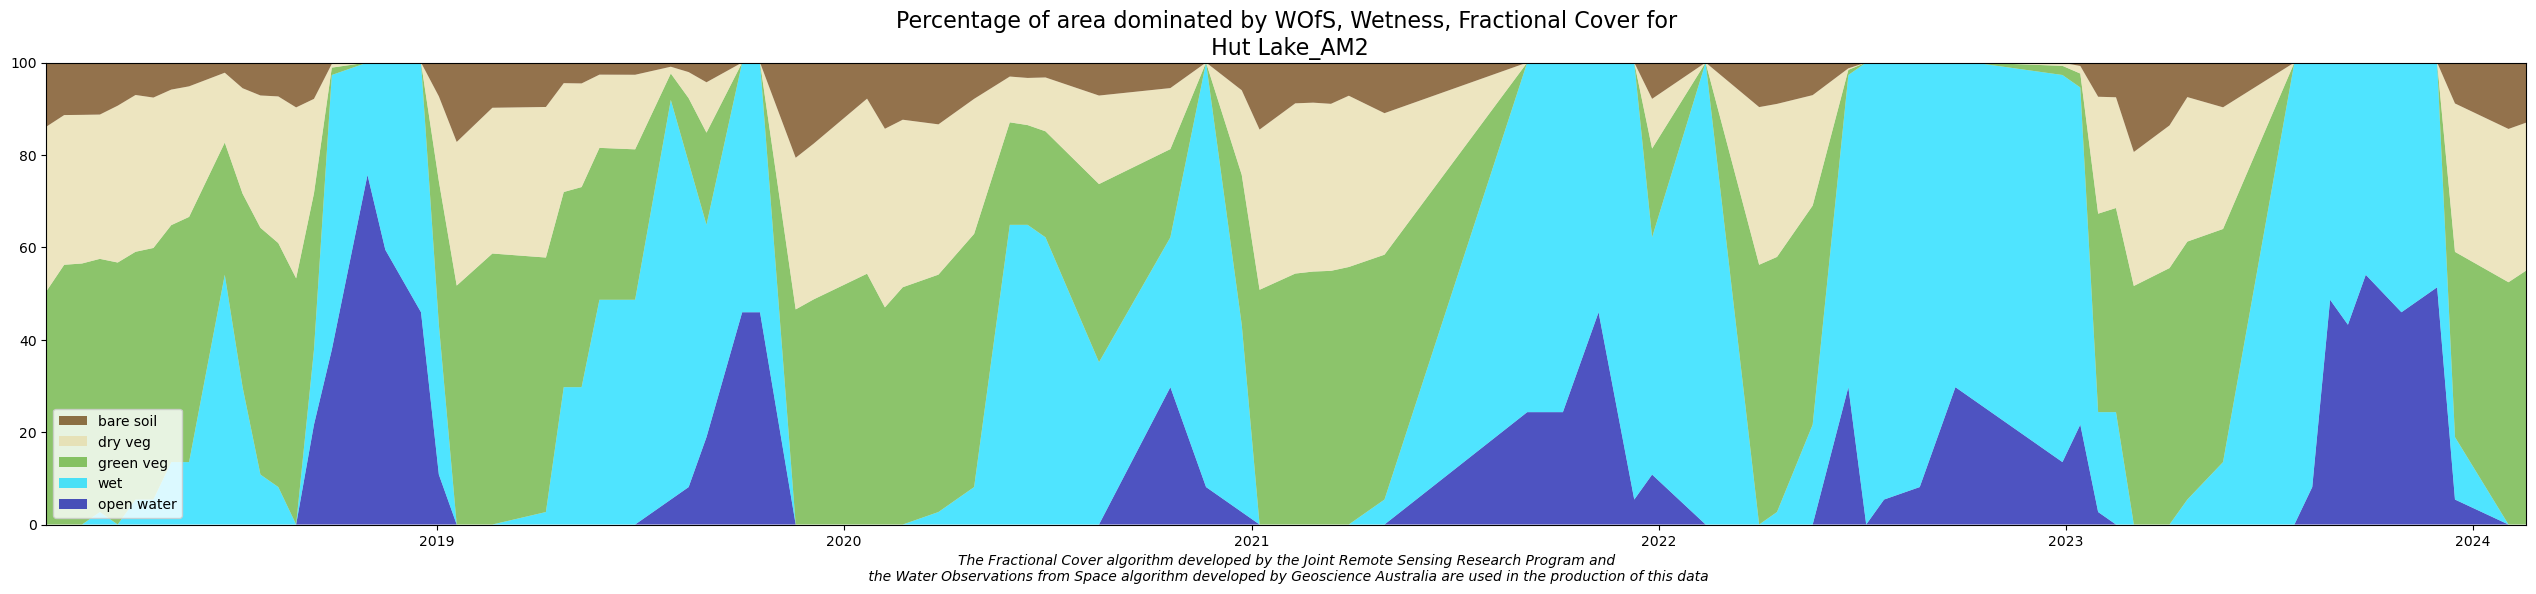

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 01:59:55,227 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:00:13,384 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:00:25,692 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:00:29,688 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:00:44,537 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


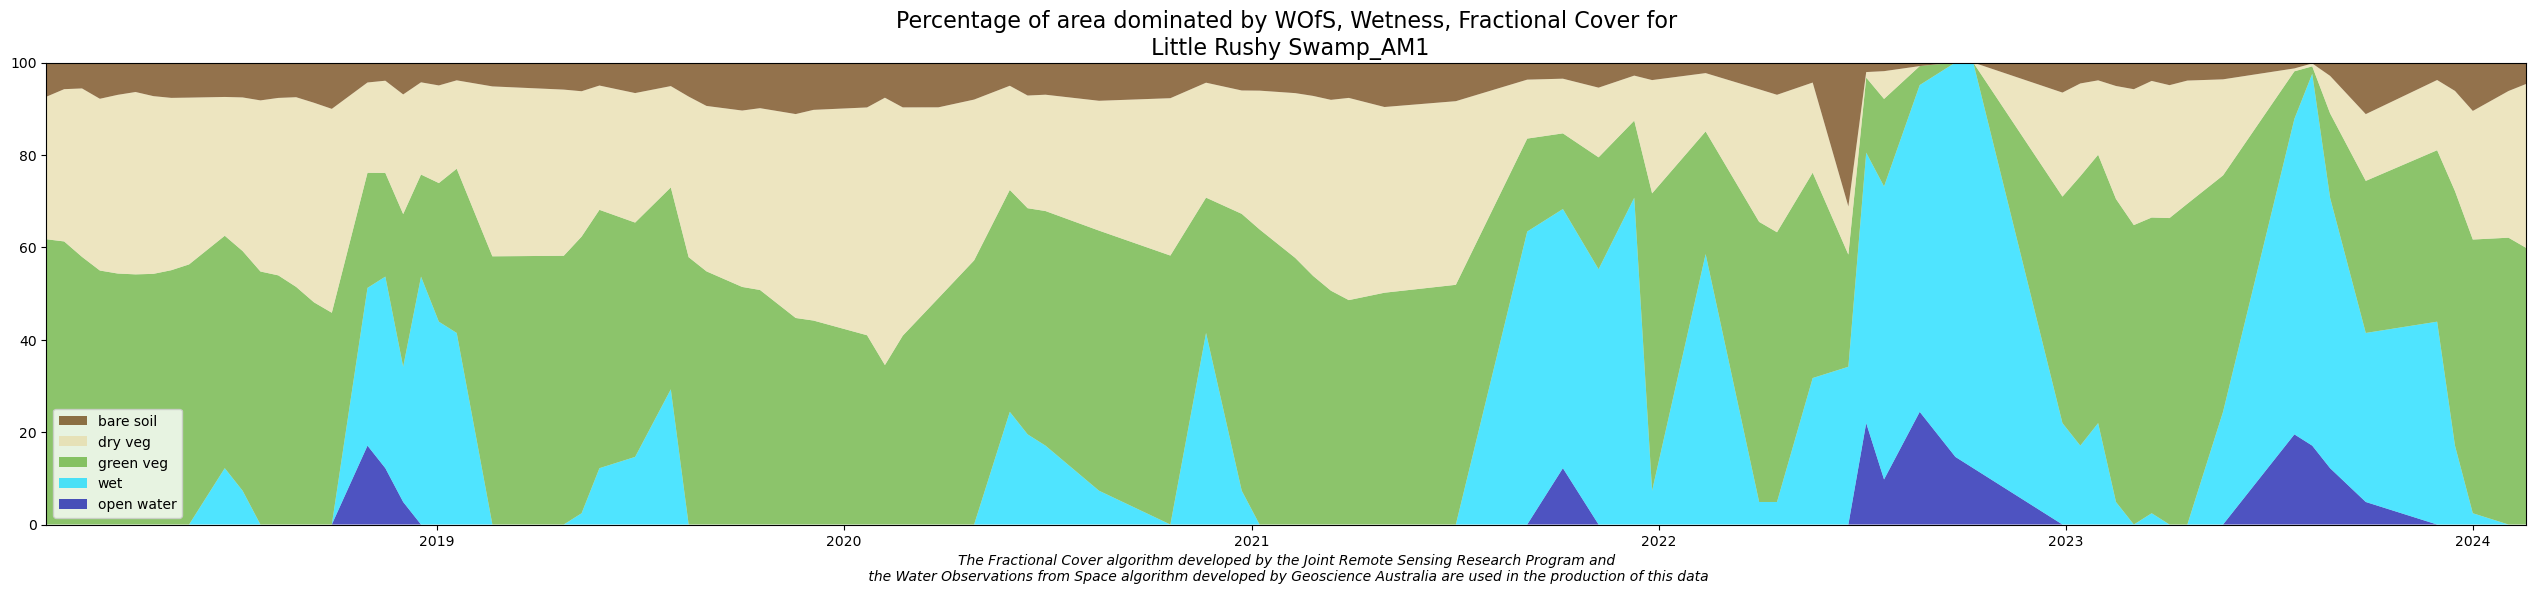

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:01:01,303 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2024-05-15 02:01:17,855 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:01:40,693 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:01:43,919 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:01:47,885 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:02:04,357 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


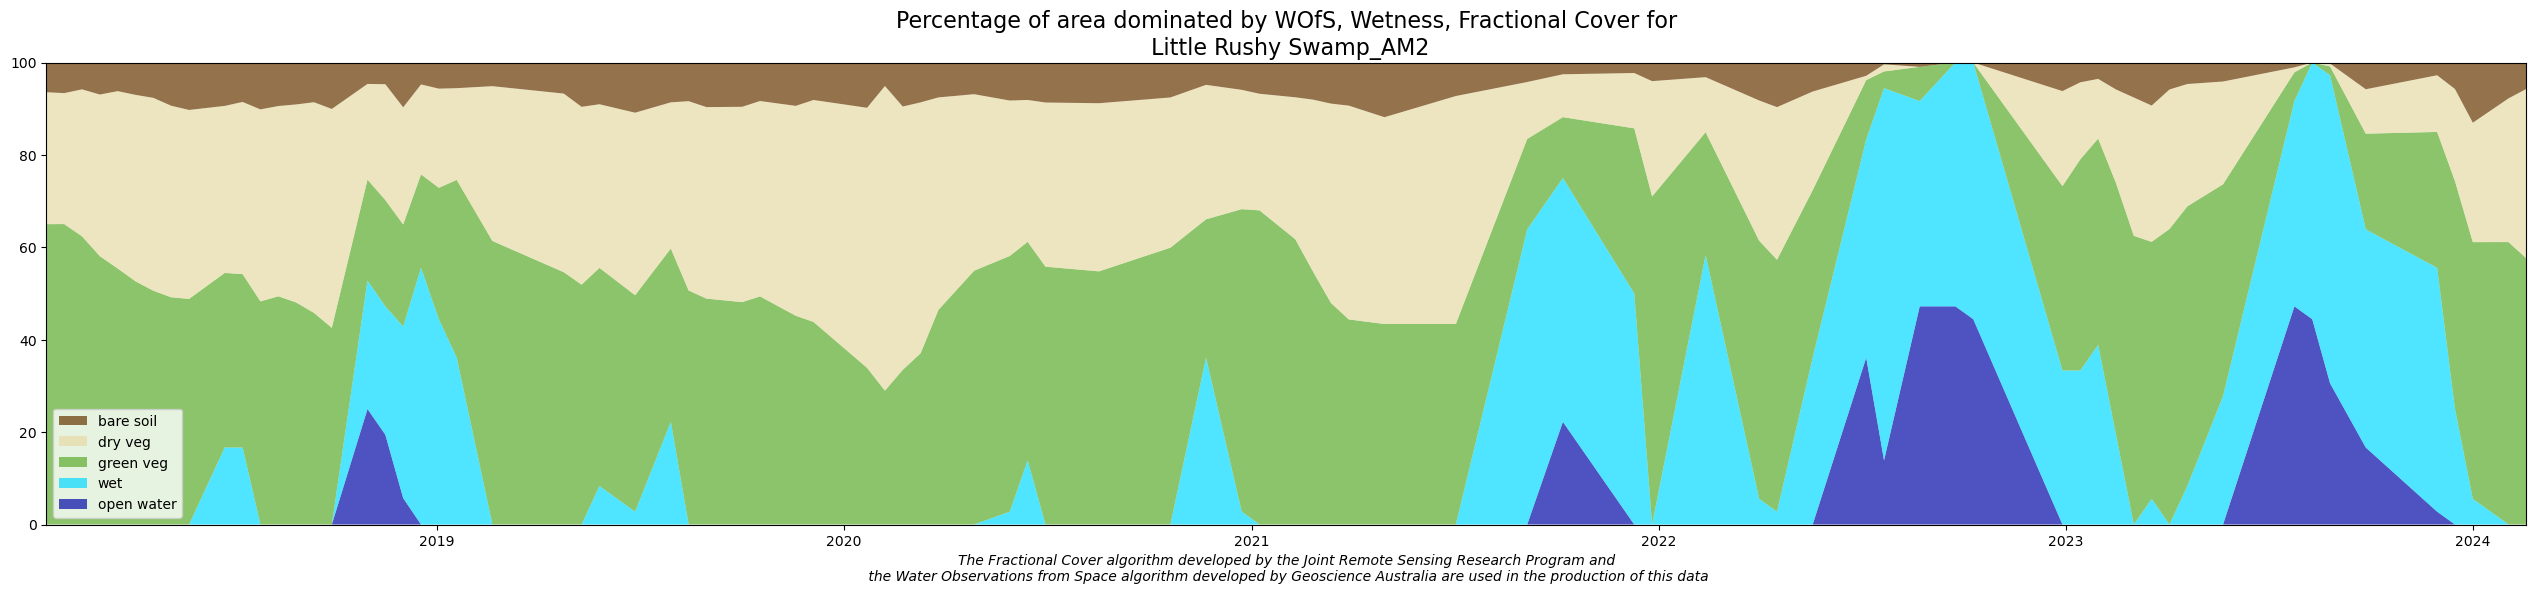

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:02:27,571 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2024-05-15 02:03:07,925 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:03:48,806 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:03:52,246 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:03:59,900 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2024-05-15 02:04:15,555 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


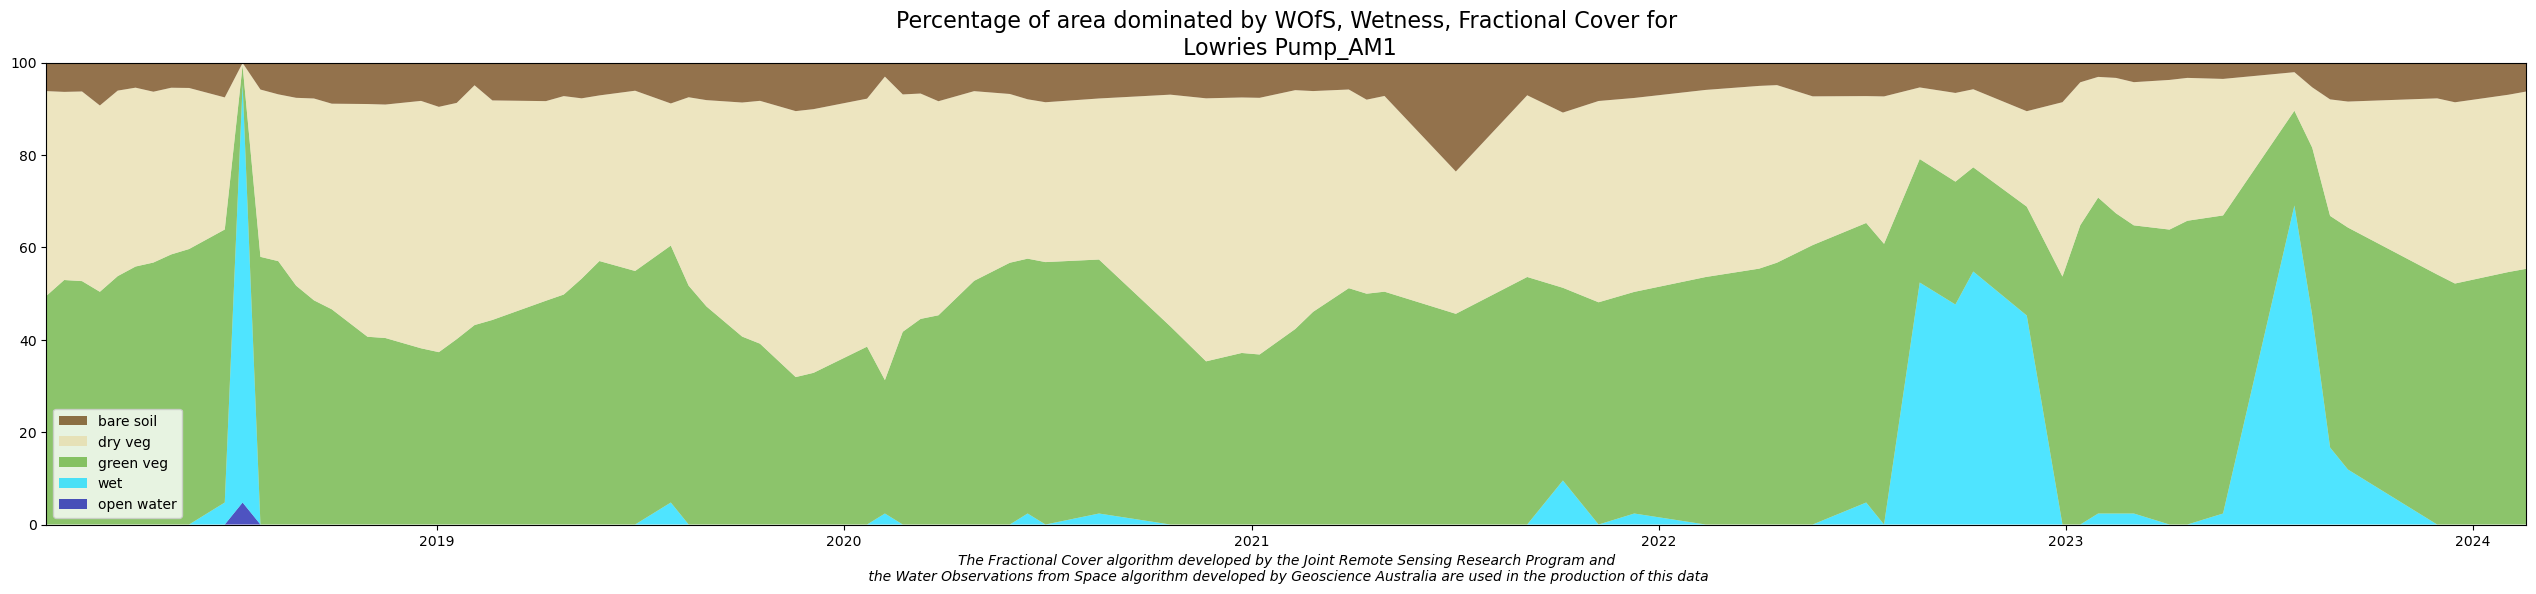

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:04:38,399 - distributed.utils_perf - WARNING - full garbage collections took 26% CPU time recently (threshold: 10%)
2024-05-15 02:05:12,488 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:05:54,456 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:06:04,464 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:06:10,754 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:06:26,012 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:06:44,064 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


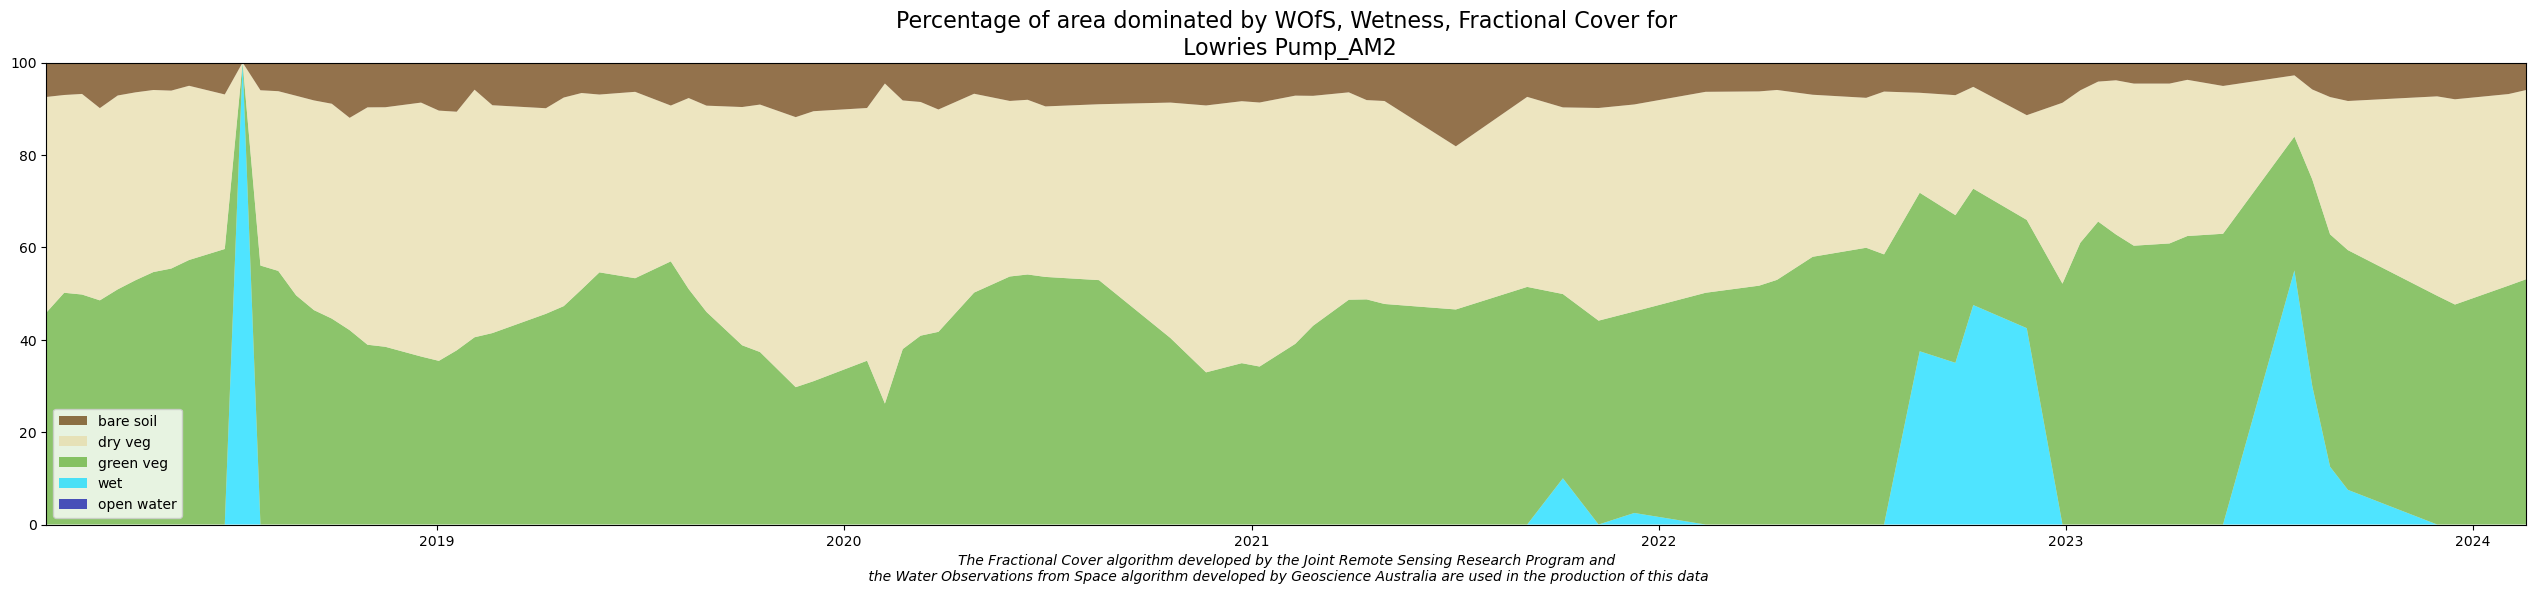

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:07:26,210 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:07:52,906 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:07:57,532 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:08:05,605 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:08:25,355 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:08:46,478 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


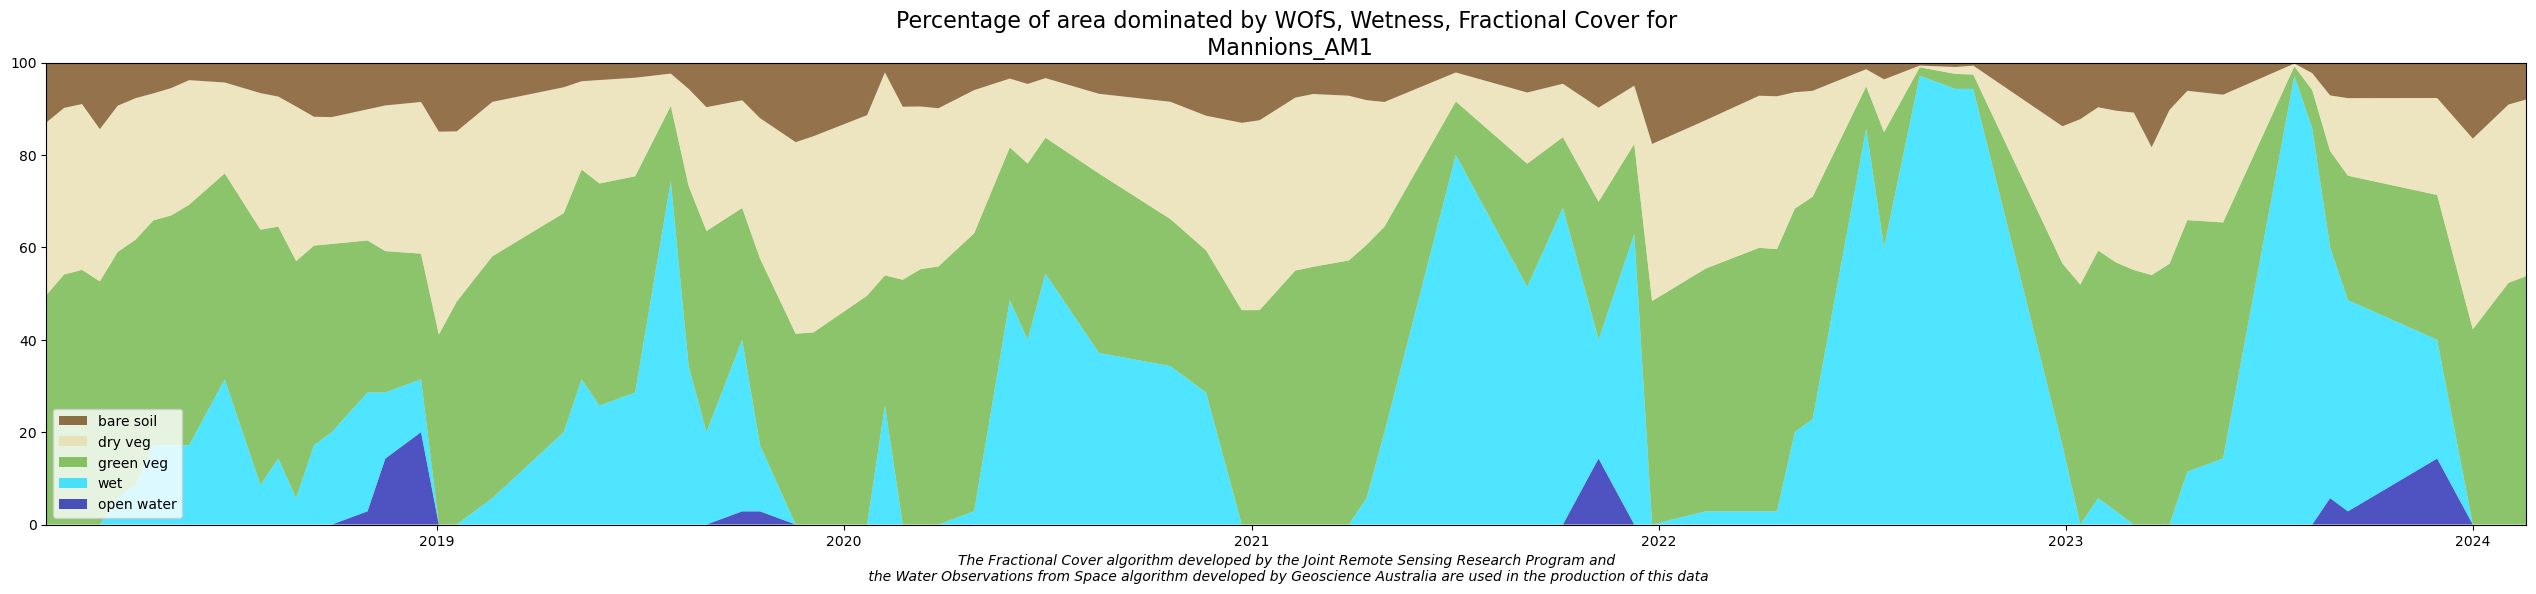

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:09:26,982 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:10:00,453 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:10:09,193 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:10:13,691 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:10:44,302 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


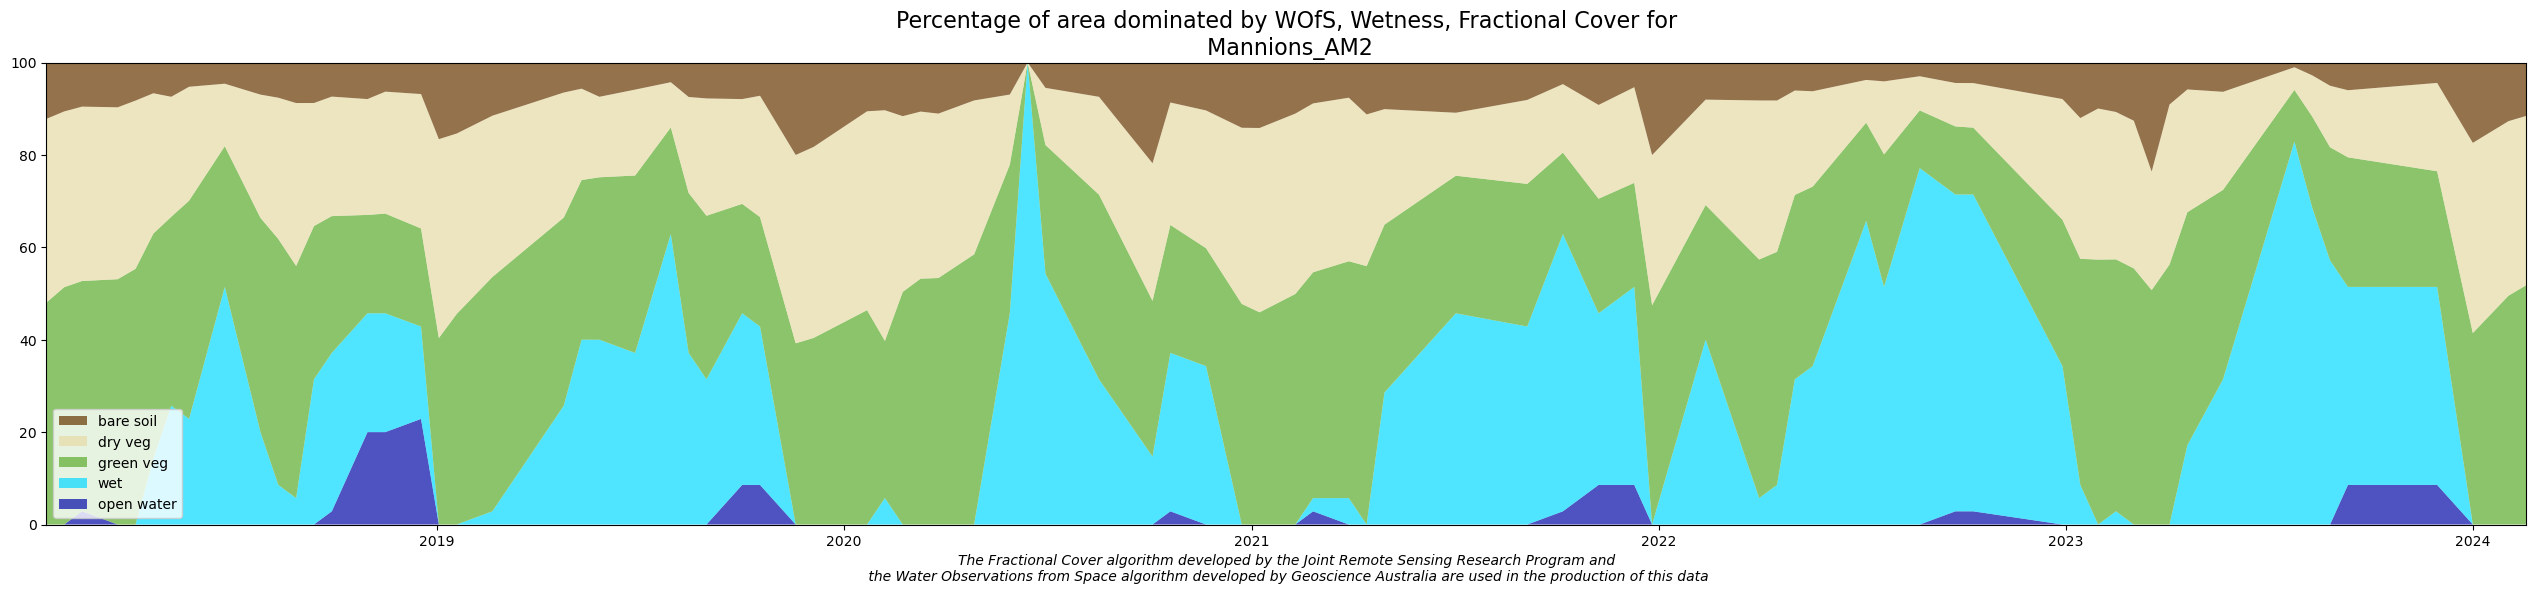

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:11:07,147 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:11:43,837 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:12:23,852 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-05-15 02:12:34,621 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:12:41,204 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:12:56,645 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:13:15,402 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


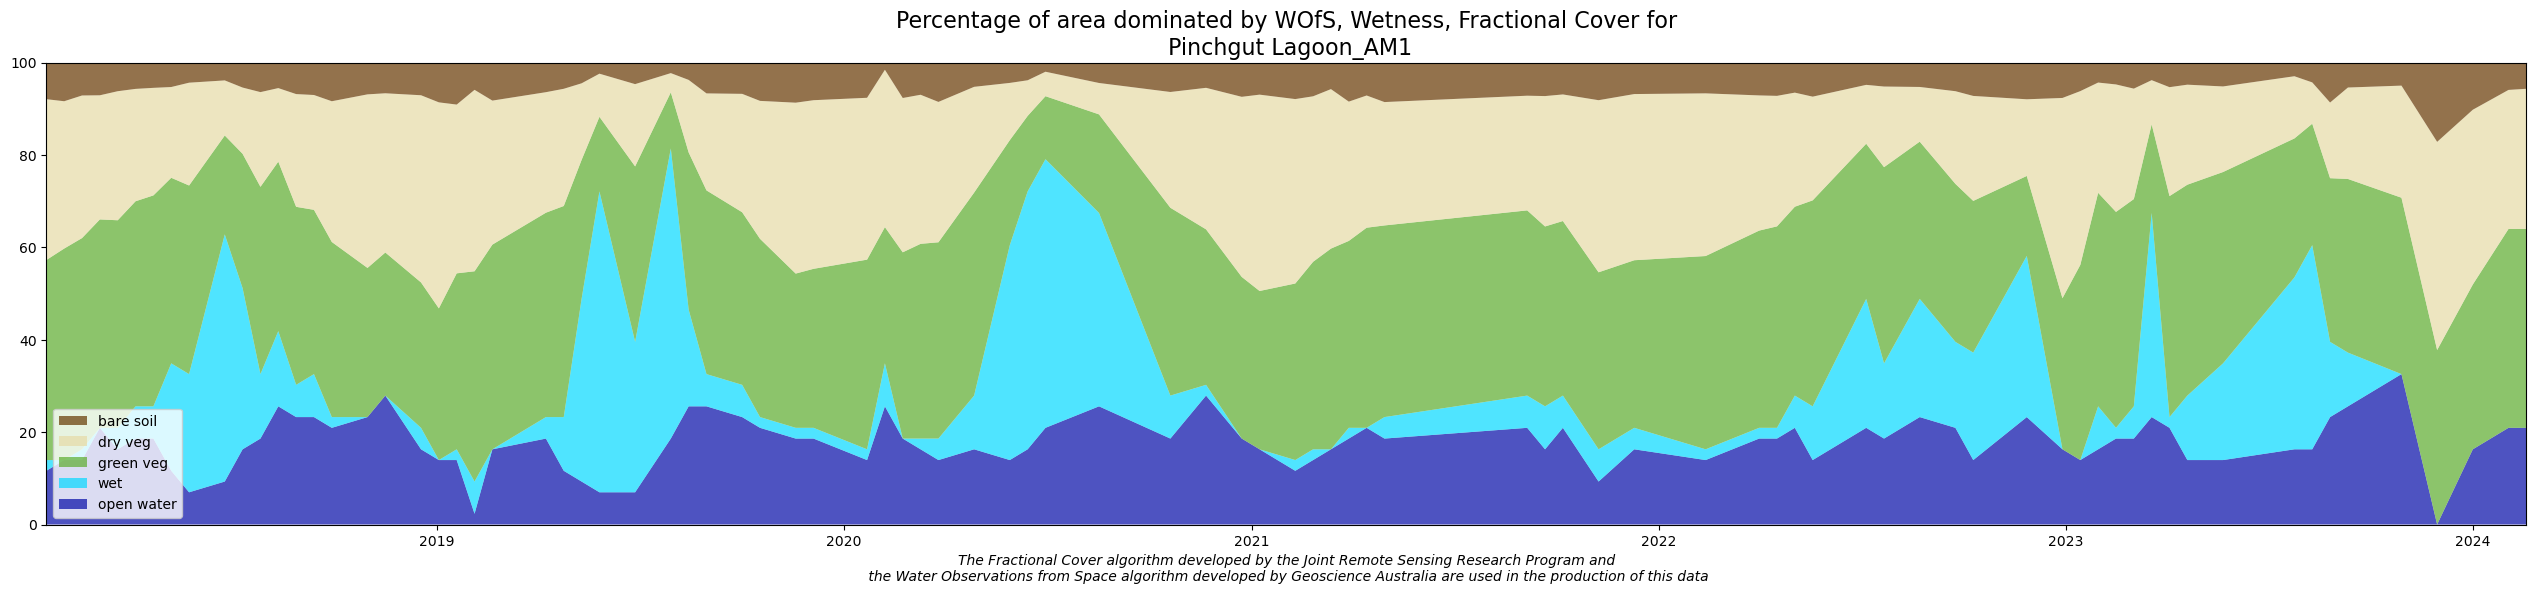

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:14:04,311 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-05-15 02:14:35,882 - distributed.utils_perf - WARNING - full garbage collections took 22% CPU time recently (threshold: 10%)
2024-05-15 02:14:39,404 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:14:48,406 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:15:03,323 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


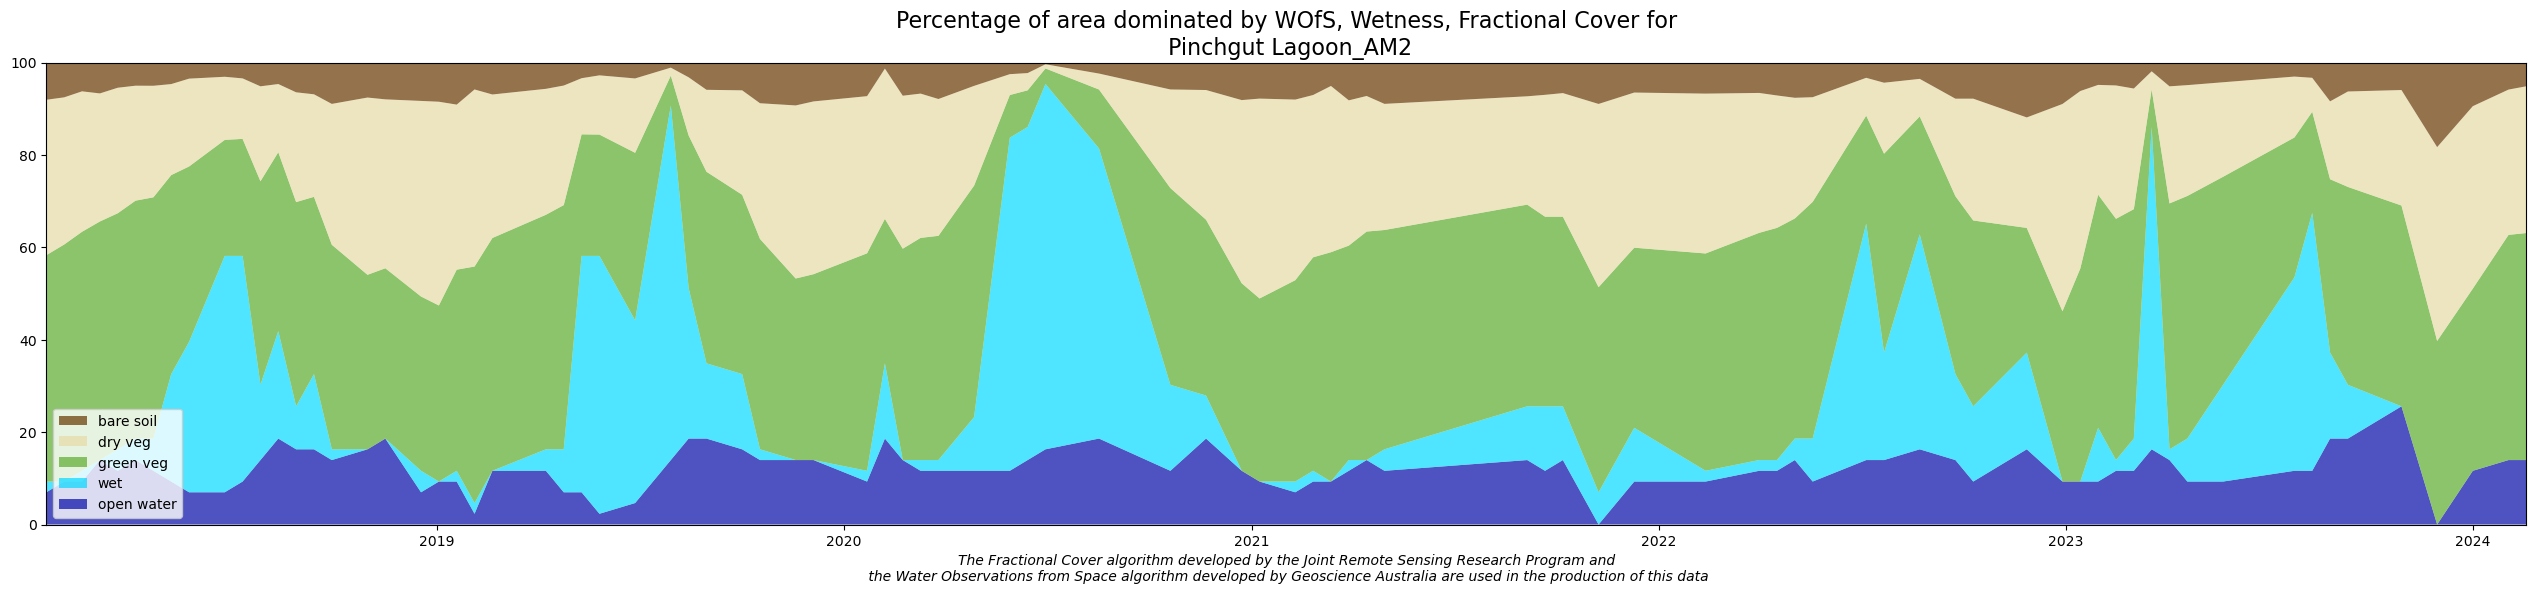

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:15:25,866 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:15:51,719 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:16:22,000 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:16:25,262 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:16:30,961 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:16:49,069 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:17:09,971 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


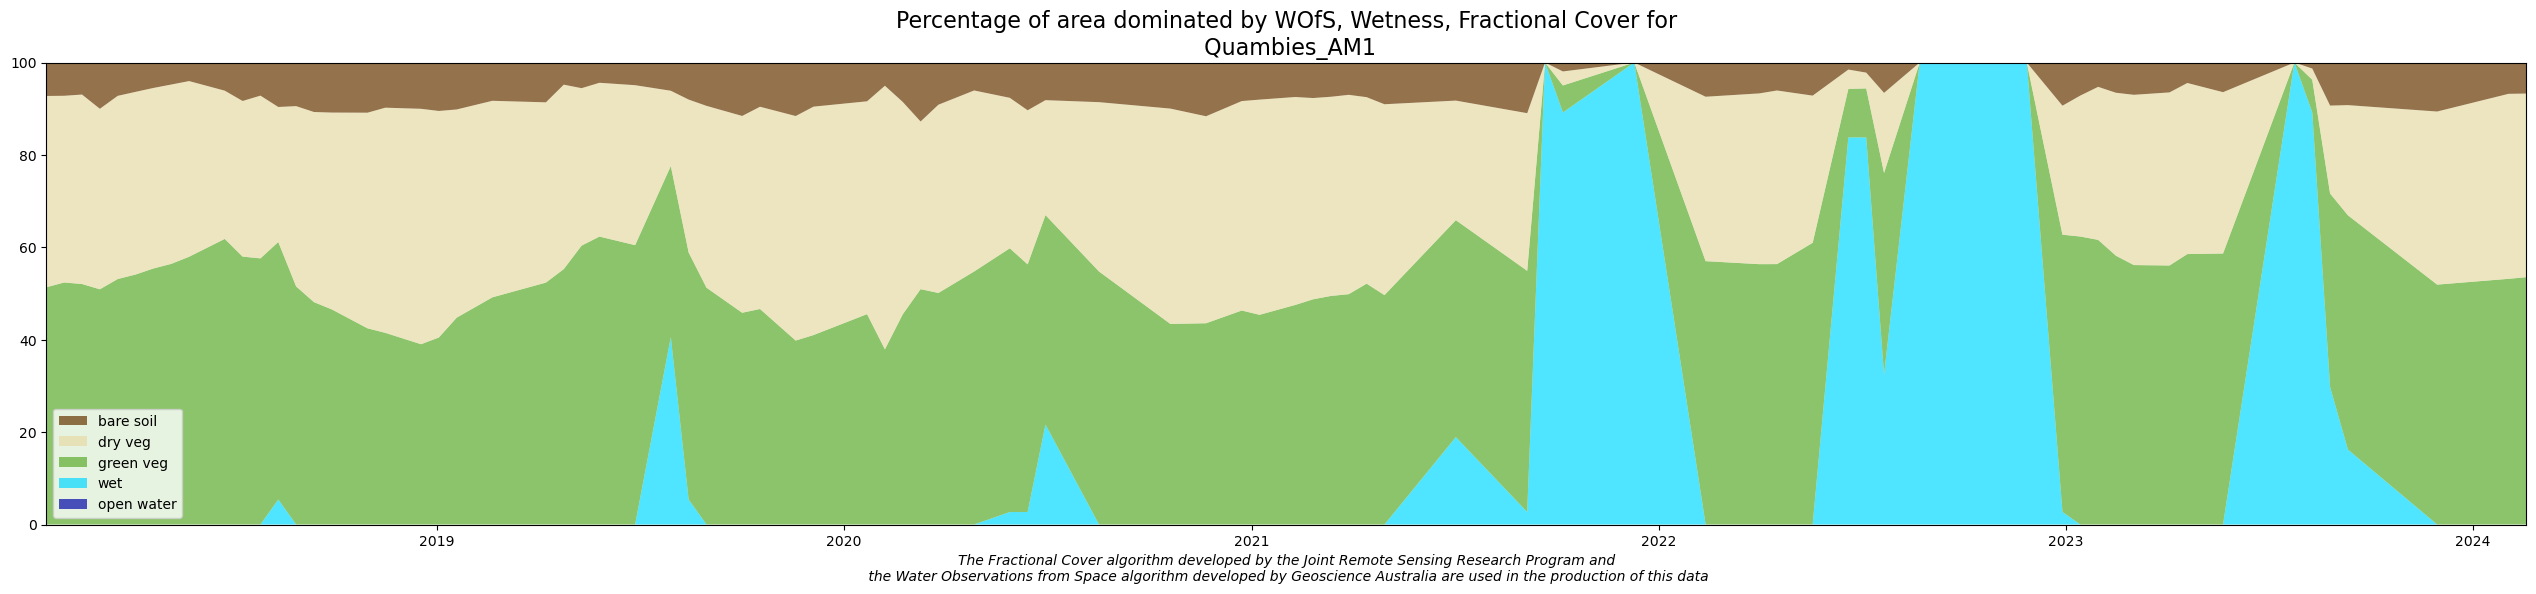

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:17:43,102 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:18:10,310 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:18:13,562 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:18:17,849 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:18:33,196 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)
2024-05-15 02:18:50,919 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


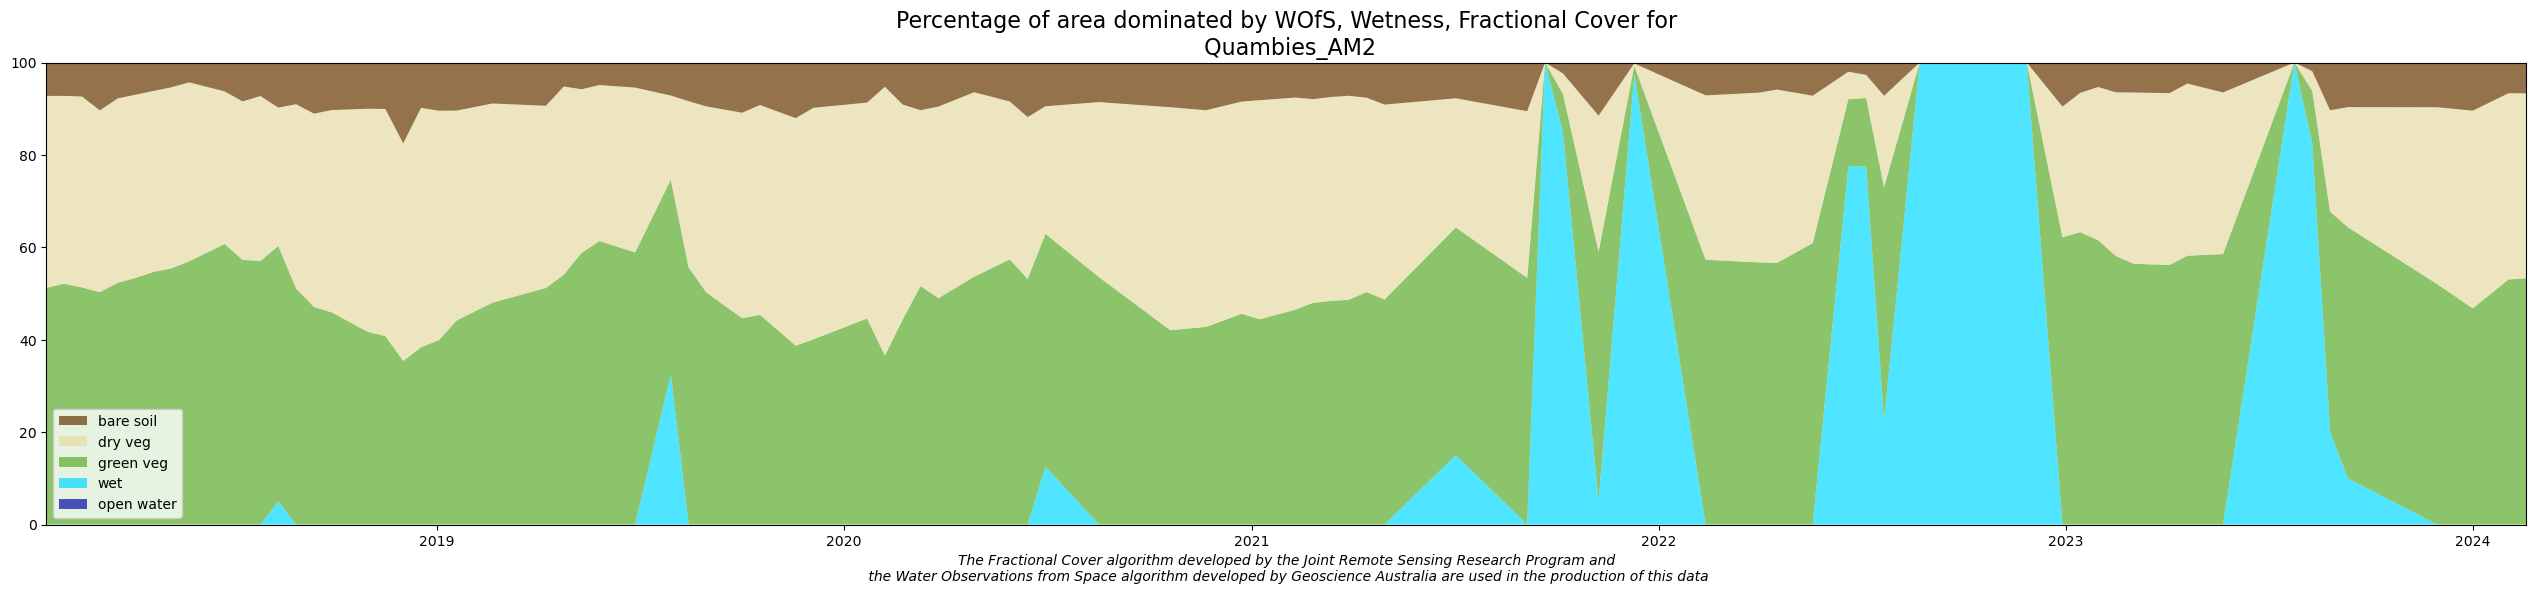

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:19:19,289 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:19:41,815 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:19:48,657 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:19:54,849 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:20:08,960 - distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
2024-05-15 02:20:24,768 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


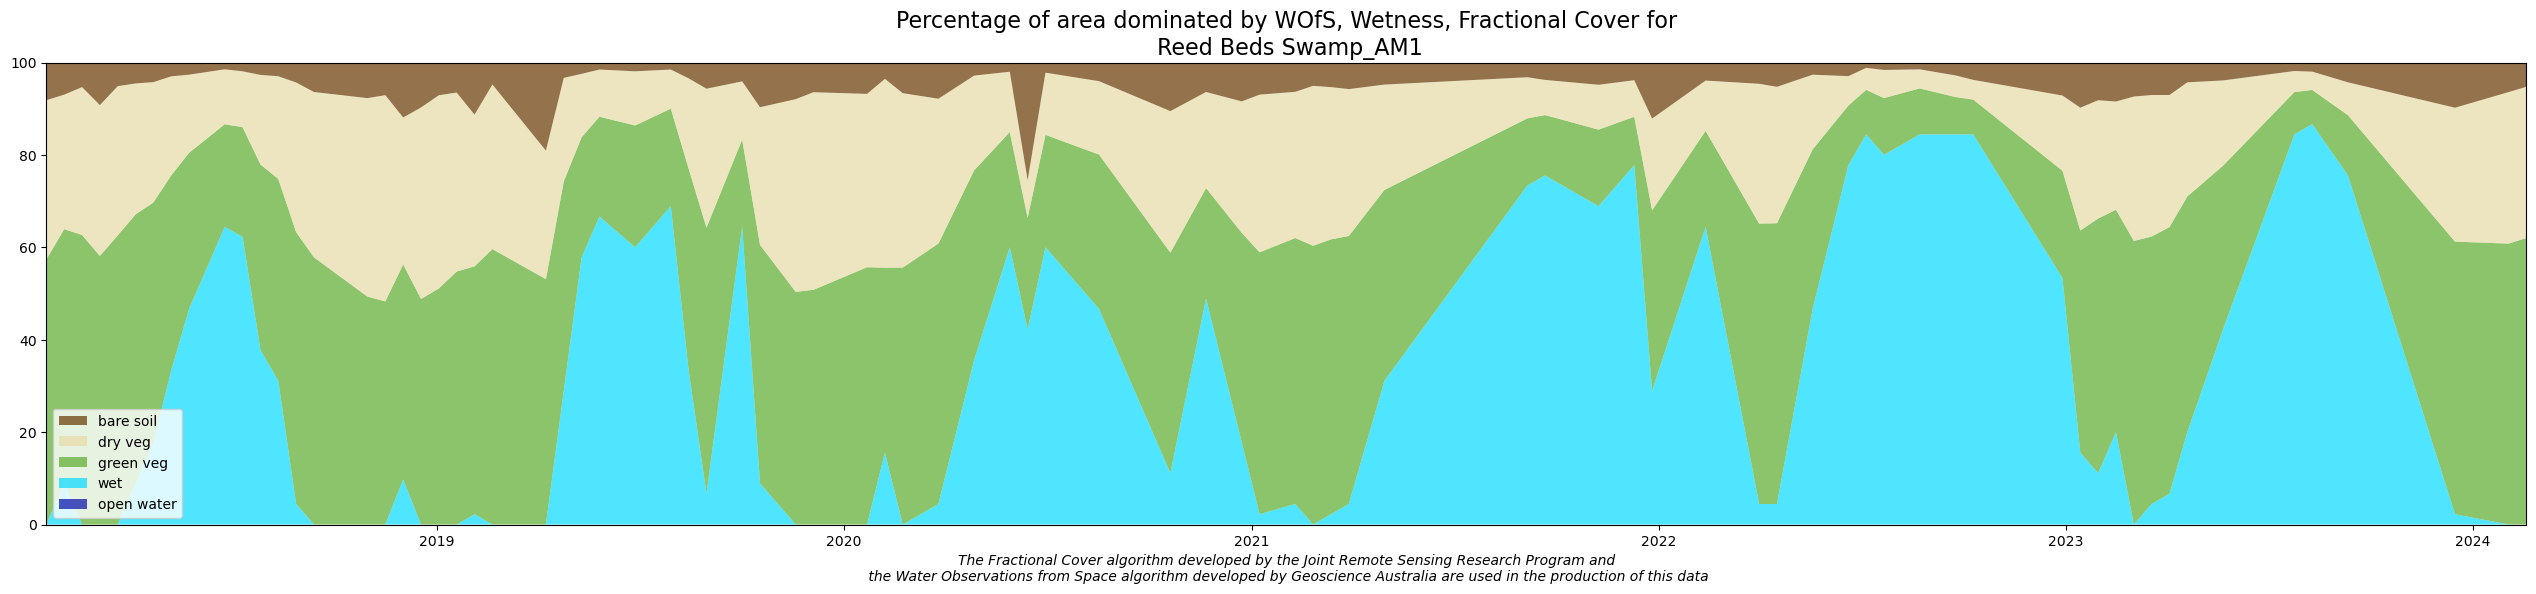

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 138 time steps as a dask array


2024-05-15 02:20:53,772 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:21:12,462 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:21:15,931 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:21:23,137 - distributed.utils_perf - WARNING - full garbage collections took 23% CPU time recently (threshold: 10%)
2024-05-15 02:21:34,716 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


Dropping bands ['nbart_blue', 'nbart_green', 'nbart_red', 'nbart_nir', 'nbart_swir_1', 'nbart_swir_2']


/home/jovyan/Sandbox/../Tools/dea_tools/wetlands.py:157: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  polygon_base_df.loc[:, "date"] = pd.to_datetime(


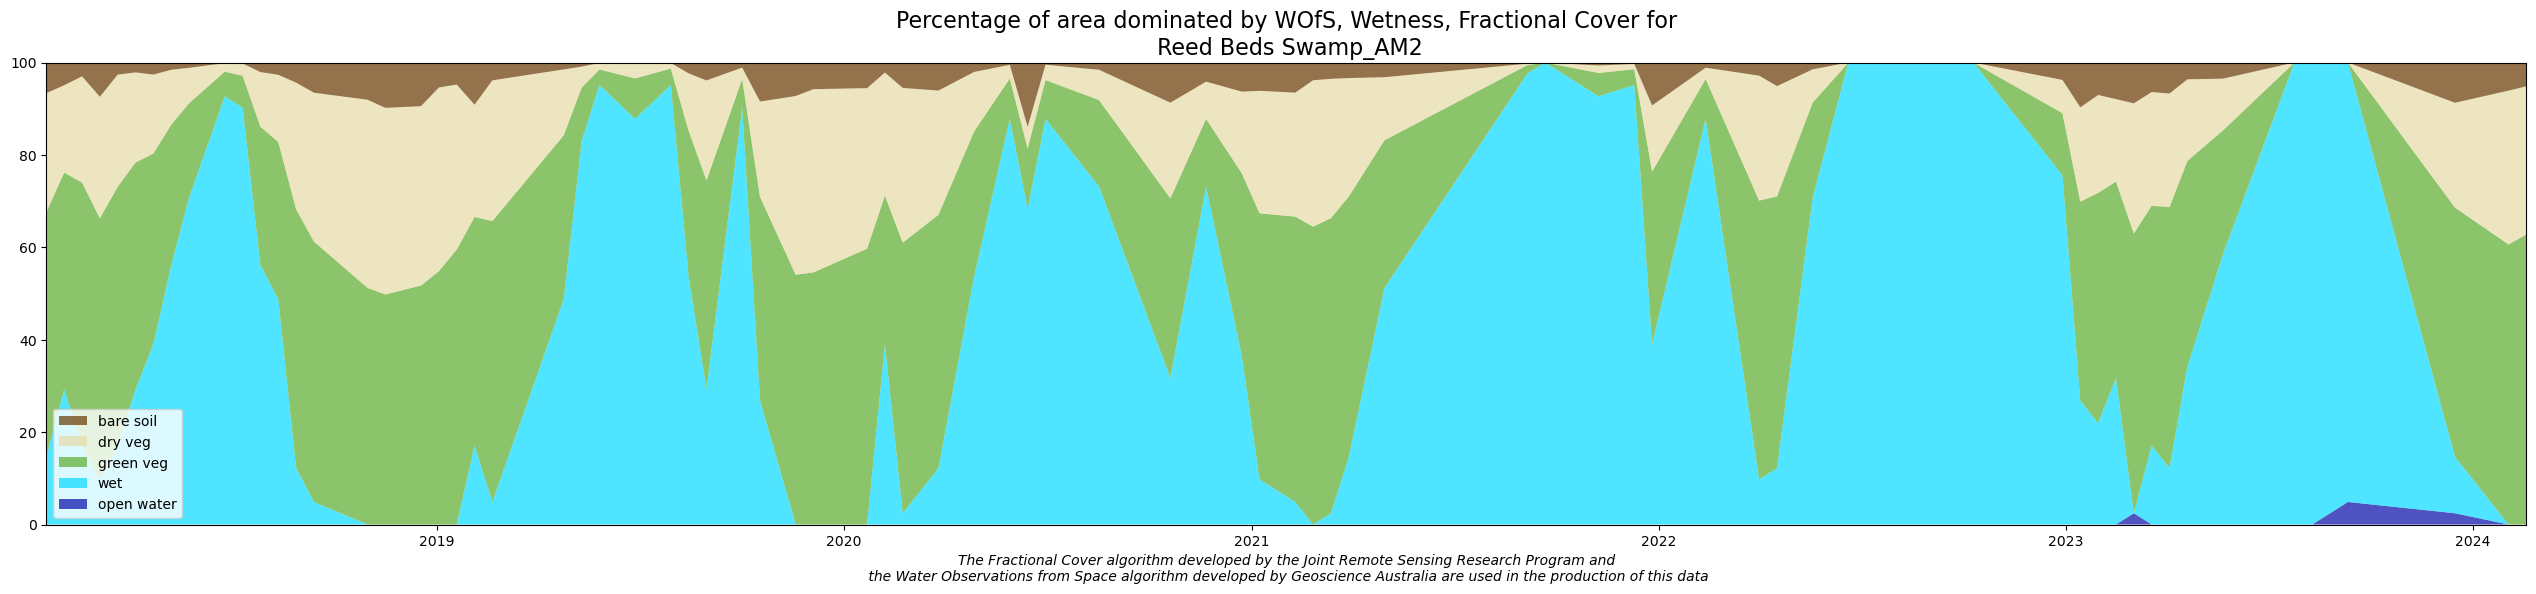

Finding datasets
    ga_ls8c_ard_3
    ga_ls7e_ard_3 (ignoring SLC-off observations)
    ga_ls5t_ard_3
Applying fmask pixel quality/cloud mask
Returning 177 time steps as a dask array


2024-05-15 02:21:54,675 - distributed.utils_perf - WARNING - full garbage collections took 24% CPU time recently (threshold: 10%)


In [ ]:
# This cell loads and plots the wetlands polygon. If no output, check your polygon
poly = gpd.read_file("site_metadata_sf/site_metadata_sf.shp")
for index, wetland in poly.iterrows():
    # get wetland point geodata
    # Specifying coordinate reference system of the polygon.
    gpgon = datacube.utils.geometry.Geometry(wetland.geometry, crs=poly.crs)
    
    # Load Landsat 5, 7 and 8 data. Not including Landsat 7 SLC off period (31-05-2003 to 06-04-2022).
    ds = dea_tools.datahandling.load_ard(
        dc,
        products=["ga_ls8c_ard_3", "ga_ls7e_ard_3", "ga_ls5t_ard_3"],
        ls7_slc_off=False,
        measurements=bands,
        geopolygon=gpgon,
        output_crs="EPSG:3577",
        resolution=(-30, 30),
        resampling={"fmask": "nearest", "*": "bilinear"},
        time=time,
        #group_by="solar_day",
        dask_chunks={},
    )

    # Load into memory using Dask
    ds.load()    

    ds_wo = dc.load(
        "ga_ls_wo_3", resampling="nearest", group_by="solar_day", like=ds, dask_chunks={}
    )
    ds_fc = dc.load(
        "ga_ls_fc_3", resampling="nearest", group_by="solar_day", like=ds, dask_chunks={}
    )
    
    # Load data into memory
    ds_wo.load()
    ds_fc.load()
    
    #locate and remove any observations which arent in all three datsets 
    missing = set()
    for t1, t2 in itertools.product(
        [ds_fc.time.values, ds_wo.time.values, ds.time.values], repeat=2
    ):
        missing_ = set(t1) - set(t2)
        missing |= missing_

    ds_fc = ds_fc.sel(time=[t for t in ds_fc.time.values if t not in missing])
    ds = ds.sel(time=[t for t in ds.time.values if t not in missing])
    ds_wo = ds_wo.sel(time=[t for t in ds_wo.time.values if t not in missing])
    
    #calculate tasseled cap wetness from landsat data 
    tcw = dea_tools.bandindices.calculate_indices(
        ds, index="TCW", collection="ga_ls_3", normalise=False, drop=True, inplace=False
    )

    #divide fracitonal cover by 100 to keep them in (0,1). keeps data types the same in he output raster
    bs = ds_fc.bs / 100
    pv = ds_fc.pv / 100
    npv = ds_fc.npv / 100

    #generate the WIT raster bands, create an emty datset called ouput_rast and population with values from input datsets 
    rast_names = ["pv", "npv", "bs", "wet", "water"]
    output_rast = {n: xr.zeros_like(bs) for n in rast_names}

    output_rast["bs"].values[:] = bs
    output_rast["pv"].values[:] = pv
    output_rast["npv"].values[:] = npv
    
    #Threshold TCW at -350, with values above this threshold used to characterise 'wet' pixels 
    # Rasterise the shapefile where poly is the vector data and pv is the xarray template
    poly_raster = xr_rasterize(poly, pv) > 0
    
    # Mask includes No data, Non contiguous data, Cloud shadow, Cloud, and water.
    # See https://docs.dea.ga.gov.au/notebooks/DEA_products/DEA_Water_Observations.html#Understanding-WOs-bit-flags for more detail.
    mask = (ds_wo.water & 0b01100011) == 0
    mask &= poly_raster
    
    # Set open water to water present and classified as water as per Water Observations and bit flags
    open_water = ds_wo.water & (1 << 7) > 0
    
    # Set wet pixels where not masked and above threshold of -350
    wet = tcw.where(mask).TCW > -350

    # Adding wet and water values to output raster
    
    # TCW
    output_rast["wet"].values[:] = wet.values.astype(float)
    for name in rast_names[:3]:
        output_rast[name].values[wet.values] = 0

    # WO
    output_rast["water"].values[:] = open_water.values.astype(float)
    for name in rast_names[:4]:
        output_rast[name].values[open_water.values] = 0
        
    # Masking again
    ds_wit = xr.Dataset(output_rast).where(mask)
    
    # Calculate percentage missing
    pc_missing = (~mask).where(poly_raster).mean(dim=["x", "y"])
    
    ds_wit = ds_wit.where(pc_missing < 0.1)
    
    
    #normalise fractional cover values in WIT result 
    # Convert ds_wit: XArray.Dataset to polygon_base_df: pandas.DataFrame
    
    polygon_base_df = pd.DataFrame()
    polygon_base_df["date"] = ds_wit.time.values
    
    for band in rast_names:
        polygon_base_df[band] = ds_wit[band].mean(dim=["x", "y"])
    
    polygon_base_df = dea_tools.wetlands.normalise_wit(polygon_base_df)
    
    polygon_name = wetland.Site
    png_name = 'plots/' + polygon_name  # file will be png_name.png
    
    dea_tools.wetlands.display_wit_stack_with_df(polygon_base_df, polygon_name, png_name)
    
    polygon_base_df.to_csv('output/' + polygon_name + '.csv')#wetland.plot_id + '.csv'

In [ ]:
#create WIT Plot 
polygon_name = wetland.Site
png_name = 'output/' + polygon_name  # file will be png_name.png

In [ ]:
dea_tools.wetlands.display_wit_stack_with_df(polygon_base_df, polygon_name, png_name)

In [ ]:
polygon_base_df.to_csv('output/' + wetland.Site + '.csv')#wetland.plot_id + '.csv'

In [ ]:
polygon_base_df

In [ ]:
def dict2hdf5(filename, dic):
    with h5py.File(filename, 'w') as h5file:
        recursive_dict2hdf5(h5file, '/', dic)


def recursive_dict2hdf5(h5file, path, dic):
    for key, item in dic.items():
        if not isinstance(key, str):
            key = str(key)
        if isinstance(item, (np.ndarray, np.int64, np.float64, str, bytes)):
            h5file[path + key] = item
        elif isinstance(item, list):
            h5file[path + key] = np.array(item)
        elif isinstance(item, dict):
            recursive_dict2hdf5(h5file, path + key + '/',
                                item)
        else:
            raise ValueError('Cannot save %s type' % type(item))